# Исследование объявлений о продаже квартир

Есть данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Цель исследования:  построить модель для определения рыночной стоимости объектов недвижимости в г. Санкт-Петербург в 2018г.

Сначала изучим данные и проведем обработку - удалим дубликаты, заполним пропуски. Далее добавим новые переменные и проведем анализ. Построим модель для определения рыночной стоимости недвижимости в г. Санкт-Петербург.

### Откройте файл с данными и изучите общую информацию.

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

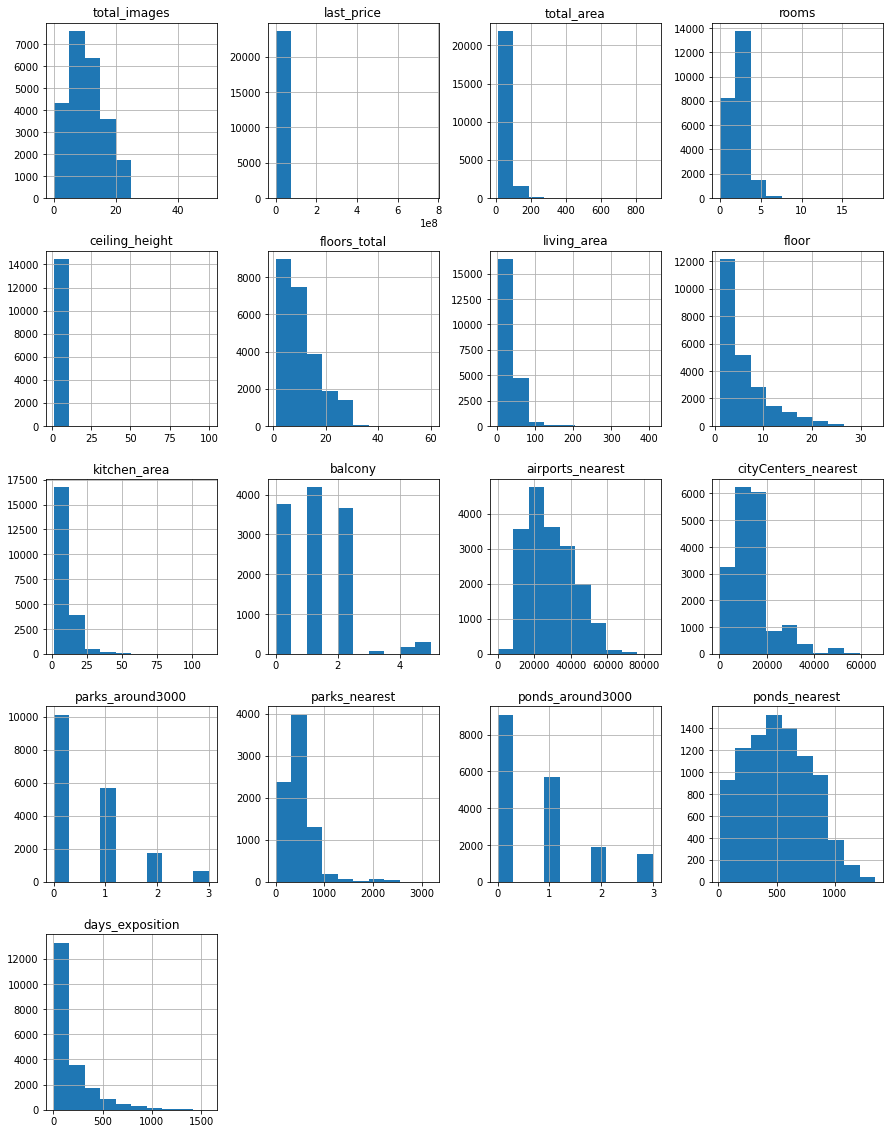

In [ ]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())
print(data.info())
data.hist(figsize=(15, 20))
import warnings
warnings.filterwarnings('ignore')

Всего в базе данных 23 переменных разного типа. Всего наблюдений - 23699. В каких-то переменных есть пропуски, в каких-то нет. Сначала рассмотрим каждую переменную подробней, постараемся заполнить пропущенные значения, где нужно - изменить тип переменных, проанализируем данные на предмет аномальных и выбивающихся значений.

### Предобработка данных

Сейчас в базе данных есть пропуски в 14-ти переменных. Для заполнения пропусков понадобятся названия населенных пунктов. Сначала проверим их на дубликаты и приведем к единому названию, если потребуется.

#### Неявные дубликаты в названиях населенных пунктов

In [ ]:
#Проверим на дубликаты названия населенных пунктов:
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

#заметно, что многие населенные пункты дублируются - где-то "поселок" написано через букву "е",
#где-то через букву "ё". Заменим "ё" на "е" и проверим, правильно ли все сработало (исправленные названия запишем в новую переменную
#locality_name_new):
data['locality_name_new'] = data['locality_name'].str.replace('ё', 'е')
print(data['locality_name_new'].unique())
print(len(data['locality_name_new'].unique()))


#количество уникальных названий уменьшилось на 34 (было 365, стало 331). Теперь просмотрим список вручную и уберем оставшиеся
#неявные дубликаты:

data['locality_name_new'] = data['locality_name_new'].replace('деревня Федоровское', 'городской поселок Федоровское')
data['locality_name_new'] = data['locality_name_new'].replace('Мурино', 'поселок Мурино')
data['locality_name_new'] = data['locality_name_new'].replace('Никольское', 'село Никольское')
data['locality_name_new'] = data['locality_name_new'].replace('Кудрово', 'деревня Кудрово')
data['locality_name_new'] = data['locality_name_new'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name_new'] = data['locality_name_new'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name_new'] = data['locality_name_new'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name_new'] = data['locality_name_new'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name_new'] = data['locality_name_new'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name_new'] = data['locality_name_new'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name_new'] = data['locality_name_new'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name_new'] = data['locality_name_new'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
data['locality_name_new'] = data['locality_name_new'].replace('городской поселок Советский', 'поселок городского типа Советский')
data['locality_name_new'] = data['locality_name_new'].replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name_new'] = data['locality_name_new'].replace('поселок городского типа Большая Ижора', 'городской поселок Большая Ижора')


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

#### Пропущенные значения в столбцах

Рассмотрим каждую переменную, где есть пропуски, отдельно. Ниже - промежуточные вычисления с комментариями, чтобы лучше понять природу пропусков.

Проверим природу пропусков в переменных про удаленность от аэропорта, водоемов и парков.
Удаленность от аэропорта:

In [ ]:
print(data.query('airports_nearest.isna() == True and locality_name == "Санкт-Петербург"')['locality_name'].count(), 'пропусков в переменной об аэропортах в Санкт-Петербурге')

85 пропусков в переменной об аэропортах в Санкт-Петербурге


В Санкт-Петербурге есть пропущенные значения в переменной об удаленности от аэропорта, заполнять эти пропуски не будем,
так как это крупный город с большими расстояниями, а информации о районе нет.

Удаленность квартиры от парков:

In [ ]:
print(data.query('parks_nearest.isna() == True').pivot_table(index='parks_around3000', values='parks_nearest', aggfunc='count'))

                  parks_nearest
parks_around3000               
0.0                           0


Все пропуски по этой переменной находятся среди тех квартир, где нет рядом никаких парков, либо в кол-ве парков тоже пропуск. Оставим пропуски как есть.

Удаленность от водоемов:

In [ ]:
print(data.query('ponds_nearest.isna() == True').pivot_table(index='ponds_around3000', values='ponds_nearest', aggfunc='count'))

                  ponds_nearest
ponds_around3000               
0.0                           0


Все пропуски по этой переменной находятся среди тех квартир, где нет рядом никаких водоемов, либо в кол-ве водоемов тоже пропуск. Оставим пропуски как есть.

##### ceiling_height - высота потолков (м)

Cкорее всего, в одном и том же населенном пункте высота потолков будет одинакова для всех квартир в домах одинаковой этажности. Заполним пропуски медианным значением высоты потолков того же населенного пункта домов такой же этажности.

In [ ]:
#заполним пропуски медианным значением высоты потолков ceiling_height того же населенного пункта домов такой же этажности:


for city in data['locality_name_new'].unique():
    for floors in data['floors_total'].unique():
        data.loc[(data['locality_name_new'] == city) & (data['floors_total'] == floors) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[(data['locality_name_new'] == city) & (data['floors_total'] == floors), 'ceiling_height'].median()

##### floors_total - всего этажей в доме

Пропусков в этой переменной довольно мало. В населенном пункте могут быть дома разной этажности, поэтому заполнять эти пропуски не будем

##### living_area - жилая площадь в квадратных метрах (м²)

Заполним пропуски медианным значением домов похожих характеристик - того же населенного пункта, той же этажности и количества комнат

In [ ]:
data['living_area'] = data['living_area'].fillna(data.groupby(['locality_name_new', 'floors_total', 'rooms'])['living_area'].transform('median'))

##### is_apartment - апартаменты (булев тип)

Cкорее всего, если стоит пропуск в этой переменной, квартира не относится к типу "апартаменты". Заполним все пропущенные значения False

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

##### kitchen_area - площадь кухни в квадратных метрах (м²)

Заполним пропуски медианным значением домов похожих характеристик - того же населенного пункта, той же этажности и количества комнат

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['locality_name_new', 'floors_total', 'rooms'])['kitchen_area'].transform('median'))

##### balcony - число балконов

Cкорее всего, если не указано кол-во балконов, их в квартире нет. Заполним пропуски нулями

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

##### locality_name - название населённого пункта

Пропусков очень мало. Переменная важна для анализа, а предположить, где находится квартира не представляется возможным. Оставим пропуски пропусками

##### airports_nearest - расстояние до ближайшего аэропорта в метрах (м)

Cкорее всего, если населенный город не Санкт-Петербург, то расстояние до аэропотра аналогично другим домам в населенном пункте (медиана по населенному пункту). Санкт-Петербург - большой город, поэтому, пропуски в нем оставим пропусками

In [ ]:
# заполним пропуск в переменной airports_nearest:
for city in data['locality_name_new'].unique():
    data.loc[(data['locality_name_new'] == city) & (city != 'Санкт-Петербург') & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name_new'] == city), 'airports_nearest'].median()


##### cityCenters_nearest - расстояние до центра города (м)

Заполним пропуски медианным значением по населенному пункту, в котором расположена квартира

In [ ]:
# заполним пропуск в переменной cityCenters_nearest:
for city in data['locality_name_new'].unique():
    data.loc[(data['locality_name_new'] == city) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name_new'] == city), 'cityCenters_nearest'].median()


##### parks_around3000 - число парков в радиусе 3 км

Если не указаны парки, то, скорее всего, их нет. Заполним пропуски 0

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

##### parks_nearest - расстояние до ближайшего парка (м)

Не трогаем пропуски, оставляем как есть. Потому что нельзя заполнить пропуск нулем, если парка нет рядом-это будет означать, что он прямо рядом с домом (на расстоянии 0м)

##### ponds_around3000 - число водоёмов в радиусе 3 км

Если не указаны водоемы, то, скорее всего, их нет. Заполним пропуски 0

In [ ]:
 data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

##### ponds_nearest - расстояние до ближайшего водоёма (м)

Не трогаем пропуски, оставляем как есть. Потому что нельзя заполнить пропуск нулем, если водоема нет рядом-это будет означать, что он прямо рядом с домом (на расстоянии 0м)

##### days_exposition - сколько дней было размещено объявление (от публикации до снятия)

Не будем заполнять пропуски в этой переменной, чтобы не исказить результаты анализа

ceiling_height        скорее всего, в одном и том же населенном пункте высота потолков будет одинакова для всех квартир в домах одинаковой этажности. Заполним пропуски медианным значением высоты потолков того же населенного пункта домов такой же этажности

floors_total          пропусков в этой переменной довольно мало. В населенном пункте могут быть дома разной этажности, поэтому заполнять эти пропуски не будем

living_area           заполним пропуски медианным значением домов похожих характеристик - того же населенного пункта, той же этажности и количества комнат

is_apartment          скорее всего, если стоит пропуск в этой переменной, квартира не относится к типу "апартаменты". Заполним все пропущенные значения False  

kitchen_area          заполним пропуски медианным значением домов похожих характеристик - того же населенного пункта, той же этажности и количества комнат

balcony               скорее всего, если не указано кол-во балконов, их в квартире нет. Заполним пропуски нулями

locality_name         пропусков очень мало. Переменная важна для анализа, а предположить, где находится квартира не представляется возможным. Оставим пропуски пропусками

airports_nearest      скорее всего, если населенный город не Санкт-Петербург, то расстояние до аэропотра аналогично другим домам в населенном пункте (медиана по населенному пункту). Санкт-Петербург - большой город, поэтому, пропуски в нем оставим пропусками

cityCenters_nearest   заполним пропуски медианным значением по населенному пункту, в котором расположена квартира

parks_around3000      если не указаны парки, то, скорее всего, их нет. Заполним пропуски 0

parks_nearest         не трогаем пропуски, оставляем как есть. Потому что нельзя заполнить пропуск нулем, если парка нет рядом-это будет означать, что он прямо рядом с домом (на расстоянии 0м).

ponds_around3000      если не указаны водоемы, то, скорее всего, их нет. Заполним пропуски 0

ponds_nearest         не трогаем пропуски, оставляем как есть. Потому что нельзя заполнить пропуск нулем, если водоема нет рядом-это будет означать, что он прямо рядом с домом (на расстоянии 0м).

days_exposition       не будем заполнять пропуски в этой переменной, чтобы не исказить результаты анализа


##### Проверка
Проверим, заполнились ли пропуски в переменных, с которыми работали:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23265 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23524 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23324 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

При сравнении таблицы выше и таблицы, которую выводили в первом пункте исследования, видно, что количество пропусков не изменилось в переменных, которые решено было не трогать (**floors_total, locality_name, parks_nearest, ponds_nearest, days_exposition**).

Пропуски в некоторых переменных (**ceiling_height, living_area, kitchen_area, airports_nearest, cityCenters_nearest**) заполнились не полностью. Это может быть связано с методом заполнения пропусков - нужной информации в других переменных не оказалось, и пропущенное значение нечем было заполнить.

В следующих переменных - **is_apartment, balcony, parks_around3000, ponds_around3000** - удалось избавиться от пропущенных значений полностью.

##### Причины пропусков

Причины пропусков в разных переменных могут быть различными. Можно выделить группу переменных, таких как - является ли квартира апартаментами, количество балконов в квартире, парков и водоемов рядом с домом (**is_apartment, balcony, parks_around3000, ponds_around3000**). В этой группе пропуски, скорее всего, связаны с тем, что этих обьектов в квартире или рядом с домом просто нет, ячейка осталась не заполненной.

Другая группа переменных, скорее всего, связана с первой. Это расстояние до ближайшего аэропорта, парка или водоема (**airports_nearest, parks_nearest, ponds_nearest**). Если их рядом нет, то эти переменные тоже останутся незаполненными.

Есть переменные, заполнить которые может быть для человека трудно. Он не знает точные цифры и ячейка остается пустой. Например, это высота потолков, жилая площадь и площадь кухни (**ceiling_height, living_area, kitchen_area**).

Количество этажей в доме и название населенного пункта, расстояние до центра города (**floors_total, locality_name, cityCenters_nearest**), вероятнее всего, остаются незаполненными по невнимательности. Очень маловероятно, что эти данные неизвестны хозяину квартиры.

Есть переменная, пропсуки в которой, скорее всего, связаны с техническими ошибками, потому что, она, наверное, заполняется автоматически. Это **days_exposition** - сколько дней было размещено объявление (от публикации до снятия).

#### Изменение типа данных ячеек

Пропуски в данных по возможности заполнены. Теперь посмотрим на тип переменных и поменяем его, если это необходимо. Согласно общей таблице info (в выводе выше), неподходящий тип данных есть у 6 переменных. Рассмотрим их подробно.

**first_day_exposition - дата публикации**. Поменяем тип переменной object на тип data, так как в ней хранится информация в виде даты и времени.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

**floors_total - всего этажей в доме.** Сейчас эта переменная записана в виде числа с плавающей точкой. Количество этажей может быть только целочисленным, поэтому, этой переменной больше подходит тип integer. Тем не менее, не все пропуски в переменной заполнены, это мешает изменению типа данных. Оставим переменную как есть, так как важнее качество данных - не будем заполнять пропуски, если нет уверенности в значениях, которые там тогда будут.

**balcony - число балконов.** Сейчас эта переменная записана в виде числа с плавающей точкой. Количество балконов может быть только целочисленным, поэтому, этой переменной больше подходит тип integer:

In [ ]:
data['balcony'] = data['balcony'].astype('int')

**parks_around3000 - число парков в радиусе 3 км.** Сейчас эта переменная записана в виде числа с плавающей точкой. Количество парков может быть только целочисленным, поэтому, этой переменной больше подходит тип integer:

In [ ]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

**ponds_around3000 - число водоёмов в радиусе 3 км**. Аналогично с количеством парков - поменяем на тип integer:

In [ ]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

**days_exposition - сколько дней было размещено объявление (от публикации до снятия).** Судя по всему, в данных нет ниформации о времени публикации обьявления, только дата, поэтому эта переменная по смыслу тоже целочисленная. Но в переменной есть пропуски, которые было решено не заполнять. Оставим тип переменной как сейчас - числом с плавающей точкой.

Проверим, во всех ли 4 переменных поменялся тип данных на тот, который нужен:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23265 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23524 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23324 non-null  float64       
 13  balcony         

Все верно, продолжим обработку дальше.

#### Работа с редкими и выбивающимися значениями

Проверим распределение каждой переменной отдельно и решим, что делать с редкими и выбивающимися значениями.

##### total_images-число фотографий квартиры в объявлении

На гистограмме ниже видно, что выделяются обьявления с количеством изображений, большим 30. Также много обьявлений вообще без фото. И те, и другие значения вполне допустимы, никаких ограничений на кол-во фото в обьявлении нет, поэтому удалять никакие значения в переменной не будем. Возможно, наличие 30 или 50 фото будет являтся плюсом при продаже.

7938     32
7393     32
10523    35
308      35
21199    37
1058     39
15157    42
12667    50
17396    50
9778     50
Name: total_images, dtype: int64
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


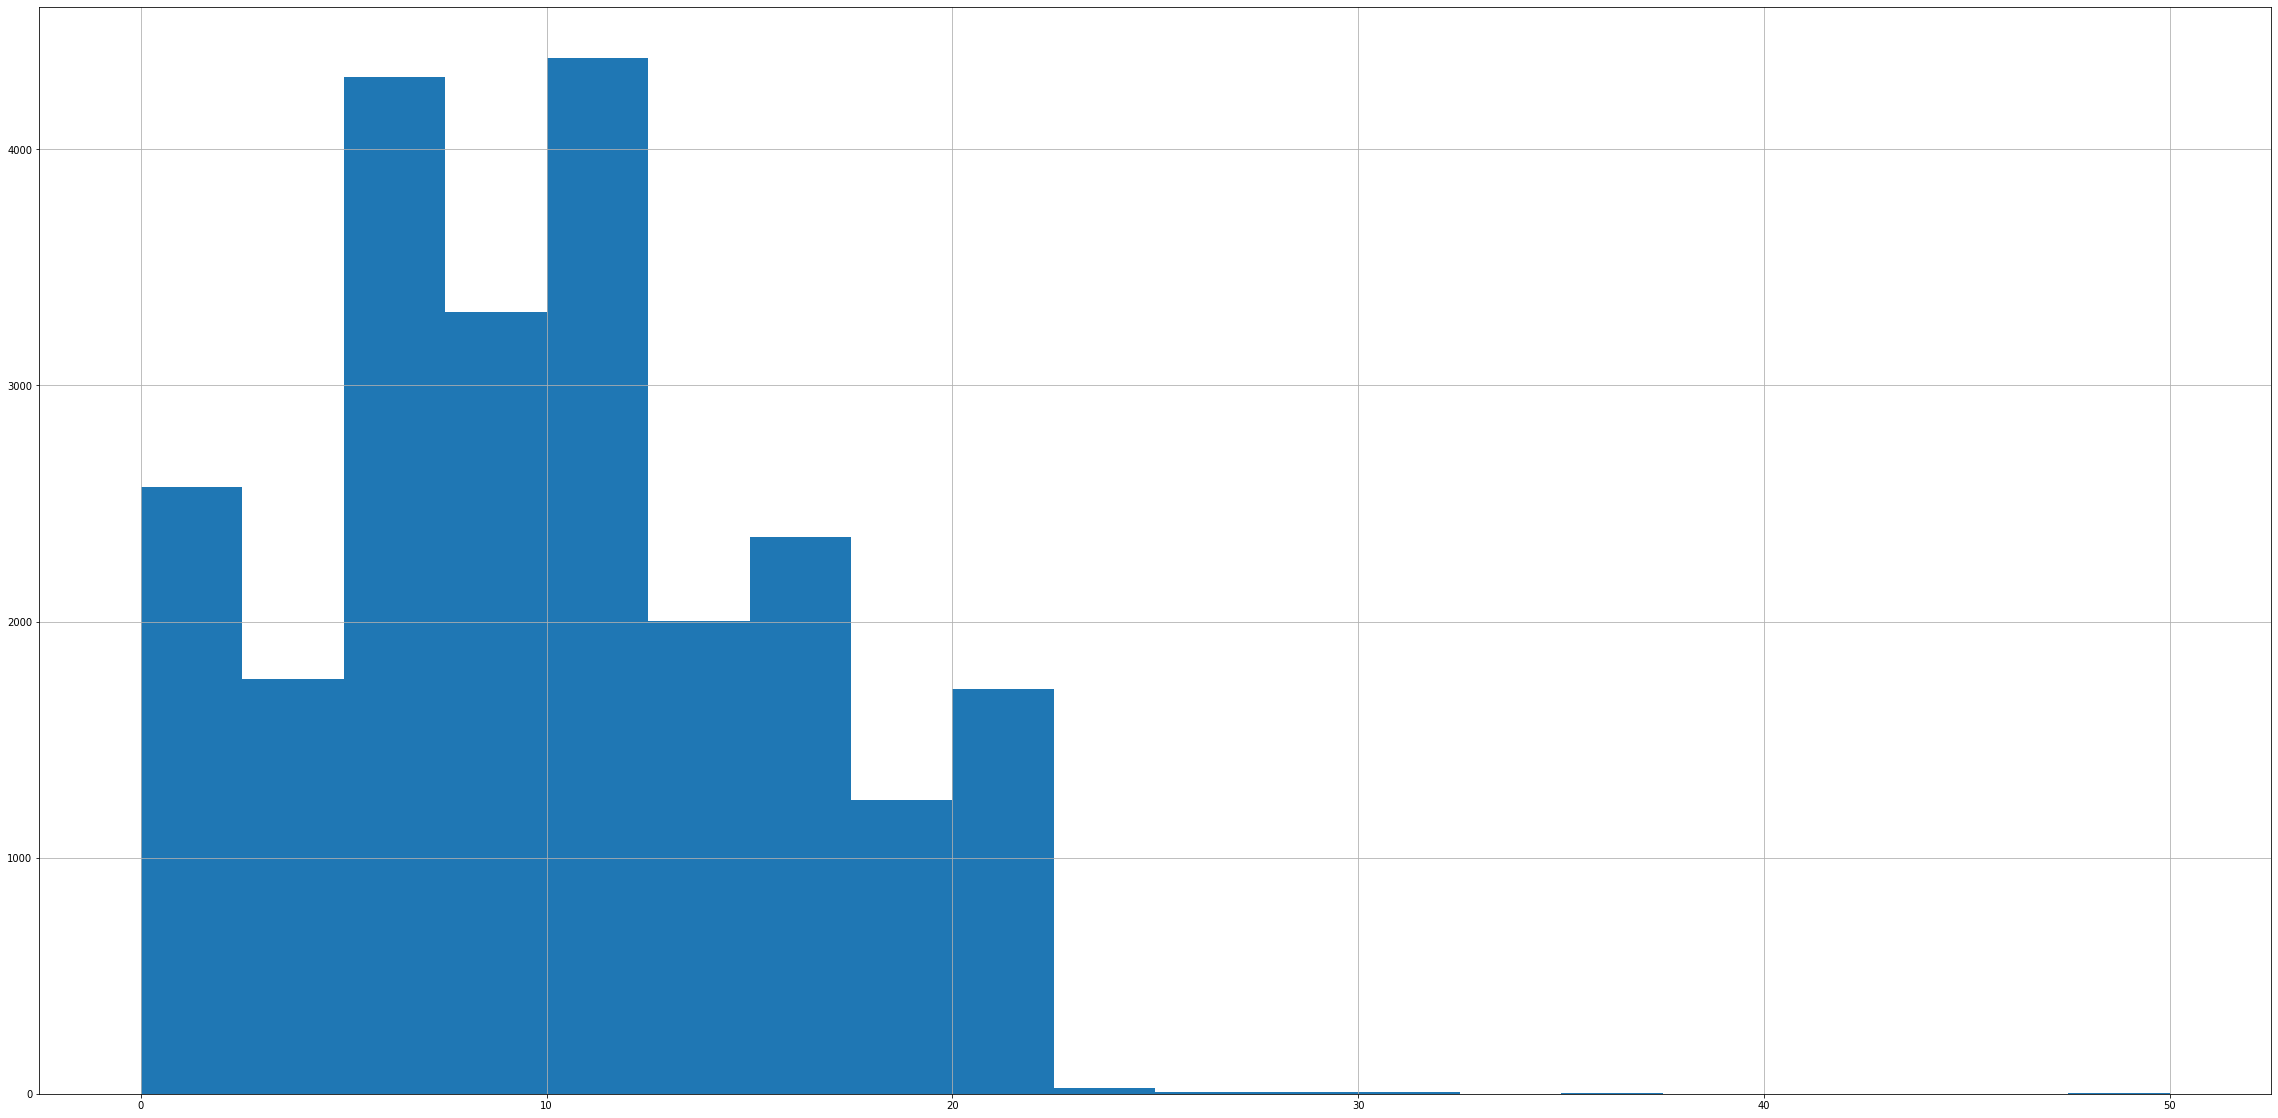

In [ ]:
data['total_images'].hist(bins=20, figsize=(40, 20))
print(data['total_images'].sort_values().tail(10))
print(data['total_images'].describe())

##### last_price - цена на момент снятия с публикации

Удалим строку с самой низкой ценой продажи - 12190 руб. (даже для не СПб это очень низкая цена для недвижимости). Далее идут цены от 430 000 руб. в Ленинградской области, вполне возможная цена для поселка/деревни.
С самыми высокими ценами продажи ситуация иная - они все находятся в Санкт-Петербурге, где цены на недвижимость высокие. Скорее всего, это квартиры близкие к центру города. Удалим 3 строчки с самой высокой ценой. 4 "с конца" оставим, расстояние до центра города у нее около 1км, возможно, цена вызвана этим. Удалим также квартиру за 300000000 руб, у нее слишком большая площадь и она довольно удалена от центра (больше 5 км), что подозрительно для такой высокой цены.

12859    140000000.0
3117     140000000.0
22229    148000000.0
15016    150000000.0
7857     150000000.0
1026     155000000.0
16495    159000000.0
2536     159984000.0
19155    160000000.0
19865    180000000.0
8900     190870000.0
5893     230000000.0
13749    240000000.0
16461    245000000.0
22831    289238400.0
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, dtype: float64
8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
16219    450000.0
9581     450000.0
5698     450000.0
21912    470000.0
18867    470000.0
Name: last_price, dtype: float64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


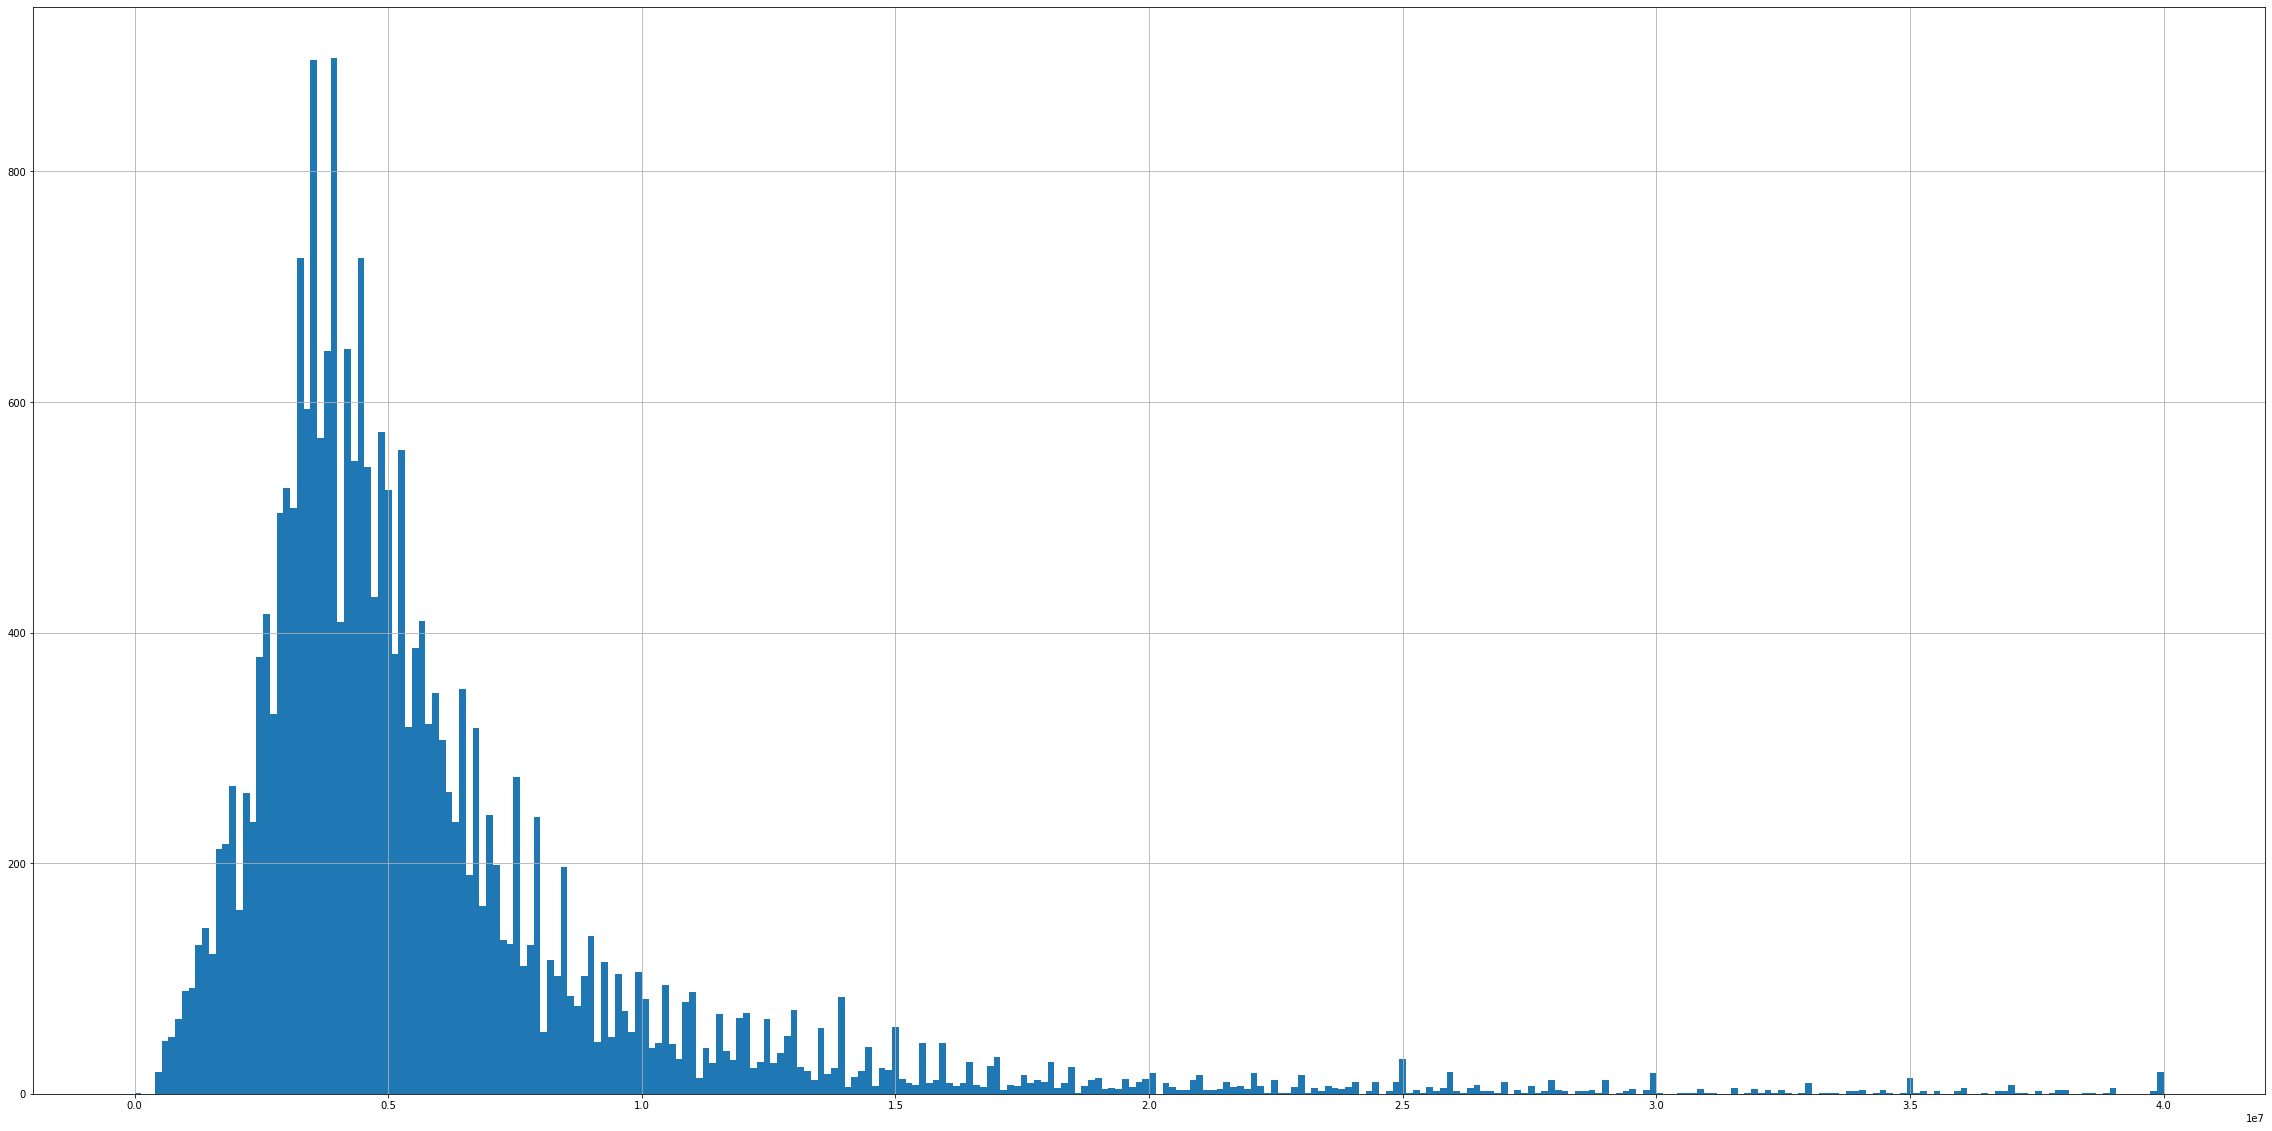

In [ ]:
data['last_price'].hist(bins=300, range=(0, 40000000), figsize=(40, 20)) #отобразим только часть графика жилья стоимостью
#до 40млн.руб. , в остальной части сравнительно мало наблюдений и трудно рассмотреть на графике
print(data['last_price'].sort_values().tail(20))
print(data['last_price'].sort_values().head(10))
print(data['last_price'].describe())
data.query('last_price == 12190.0 or last_price == 430000.0 or last_price > 140000000.0').sort_values(by='last_price')

#удалим строки с ценой продажи 12190 руб. ,  763000000 руб., 420000000 руб., 401300000 руб., 300000000 руб.
data = data.query('(last_price != 12190.0) and (last_price != 763000000.0) and (last_price != 420000000.0) and (last_price != 401300000.0) and (last_price != 300000000.0)')


##### total_area - общая площадь квартиры в квадратных метрах (м²)

Выделяется "хвост" из квартир, по площади больше 450м2. Всего их 15. Такие большие площади могут быть у квартир, например, после обьединения. Из таблицы ниже видно, что все они расположены в Санкт-Петербурге. Можно предположить, что это элитное жилье, которое обычно распологается в центре города, с высокими ценами на него и покупателями, готовыми отдать большую сумму. Тем не менее, площадь больше 450м2 выглядит очень подозрительно. Удалим такие значения из базы, кроме одного - квартиры площадью 483.9м2, которая располагается в 945м от центра города (в квартирах большего метража есть те, кто располагается в 15км от центра, с высокими ценами на квартиры, что вызывает вопросы).


AxesSubplot(0.125,0.125;0.775x0.755)
22494    491.0
9826     494.1
12401    495.0
15016    500.0
5893     500.0
8018     507.0
4237     517.0
5358     590.0
3117     631.0
12859    631.2
Name: total_area, dtype: float64
count    23694.000000
mean        60.258913
std         34.910251
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        631.200000
Name: total_area, dtype: float64
       total_images   last_price  total_area first_day_exposition  rooms  \
20273            12   20000000.0       460.8           2019-03-20      6   
6221              8   34000000.0       470.3           2018-01-14      4   
660               3   49950000.0       483.9           2017-10-04      7   
6621             20   99000000.0       488.0           2017-04-09      5   
22494             7   91075000.0       491.0           2017-05-27      5   
9826              1   43185328.0       494.1           2017-05-12      1   
12401            20   91500000.0       

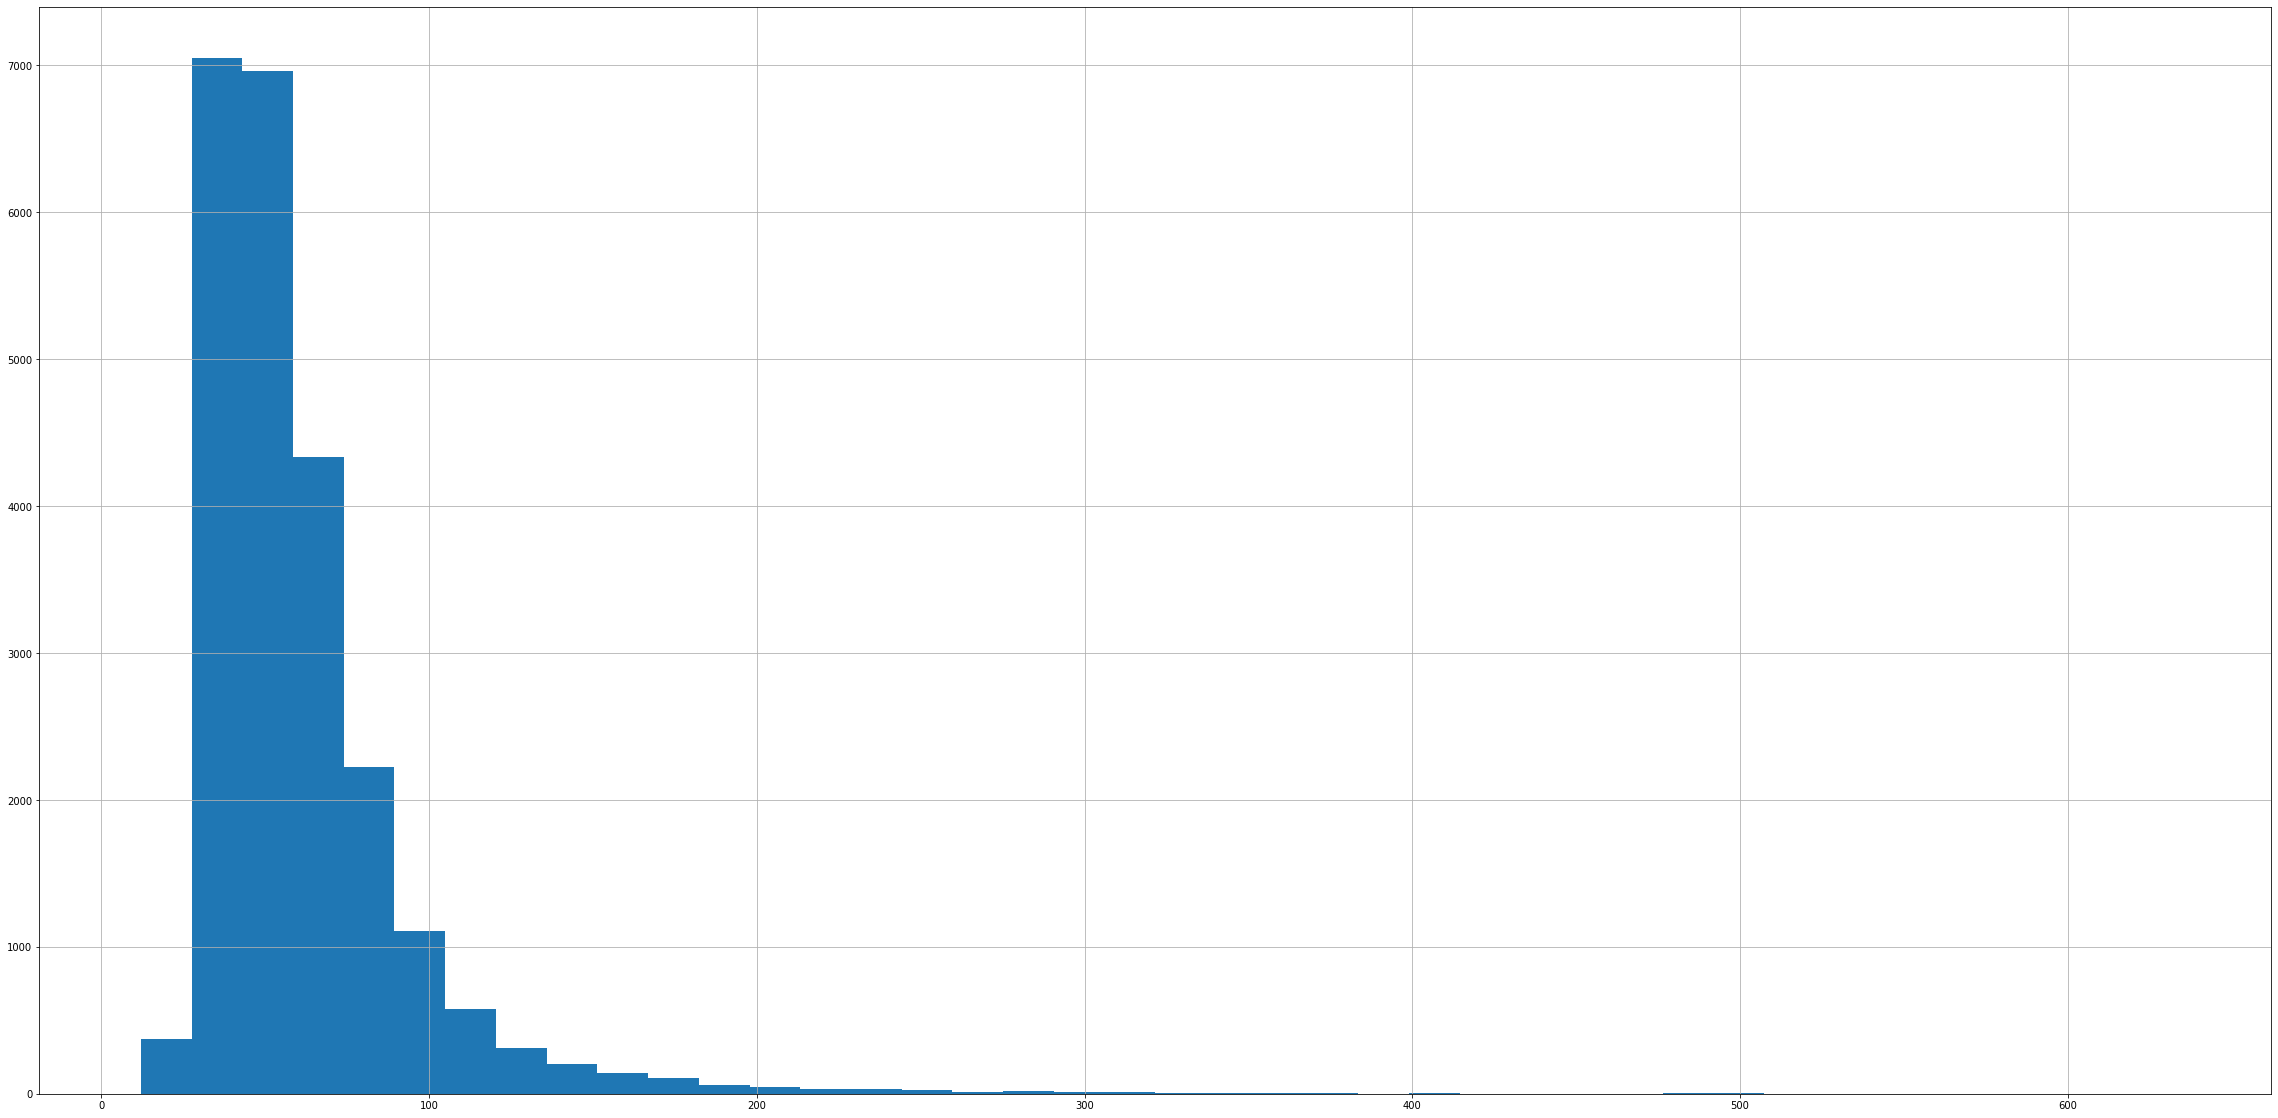

In [ ]:
print(data['total_area'].hist(bins=40, figsize=(40, 20)))
print(data['total_area'].sort_values().tail(10))
print(data['total_area'].describe())
print(data.query('total_area > 450').sort_values(by='total_area'))
#удалим очень большие квартиры по метражу из базы:
data = data.query('(total_area <= 450.0) or (total_area == 483.9)')

##### first_day_exposition - дата публикации

Даты публикации объявлений находятся в диапазоне от конца 2014 до середины 2019 года, что соответсвует описанию проекта.

12208   2019-05-03
13993   2019-05-03
15881   2019-05-03
2178    2019-05-03
15072   2019-05-03
21887   2019-05-03
4450    2019-05-03
13746   2019-05-03
9217    2019-05-03
12003   2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]
count                   23681
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


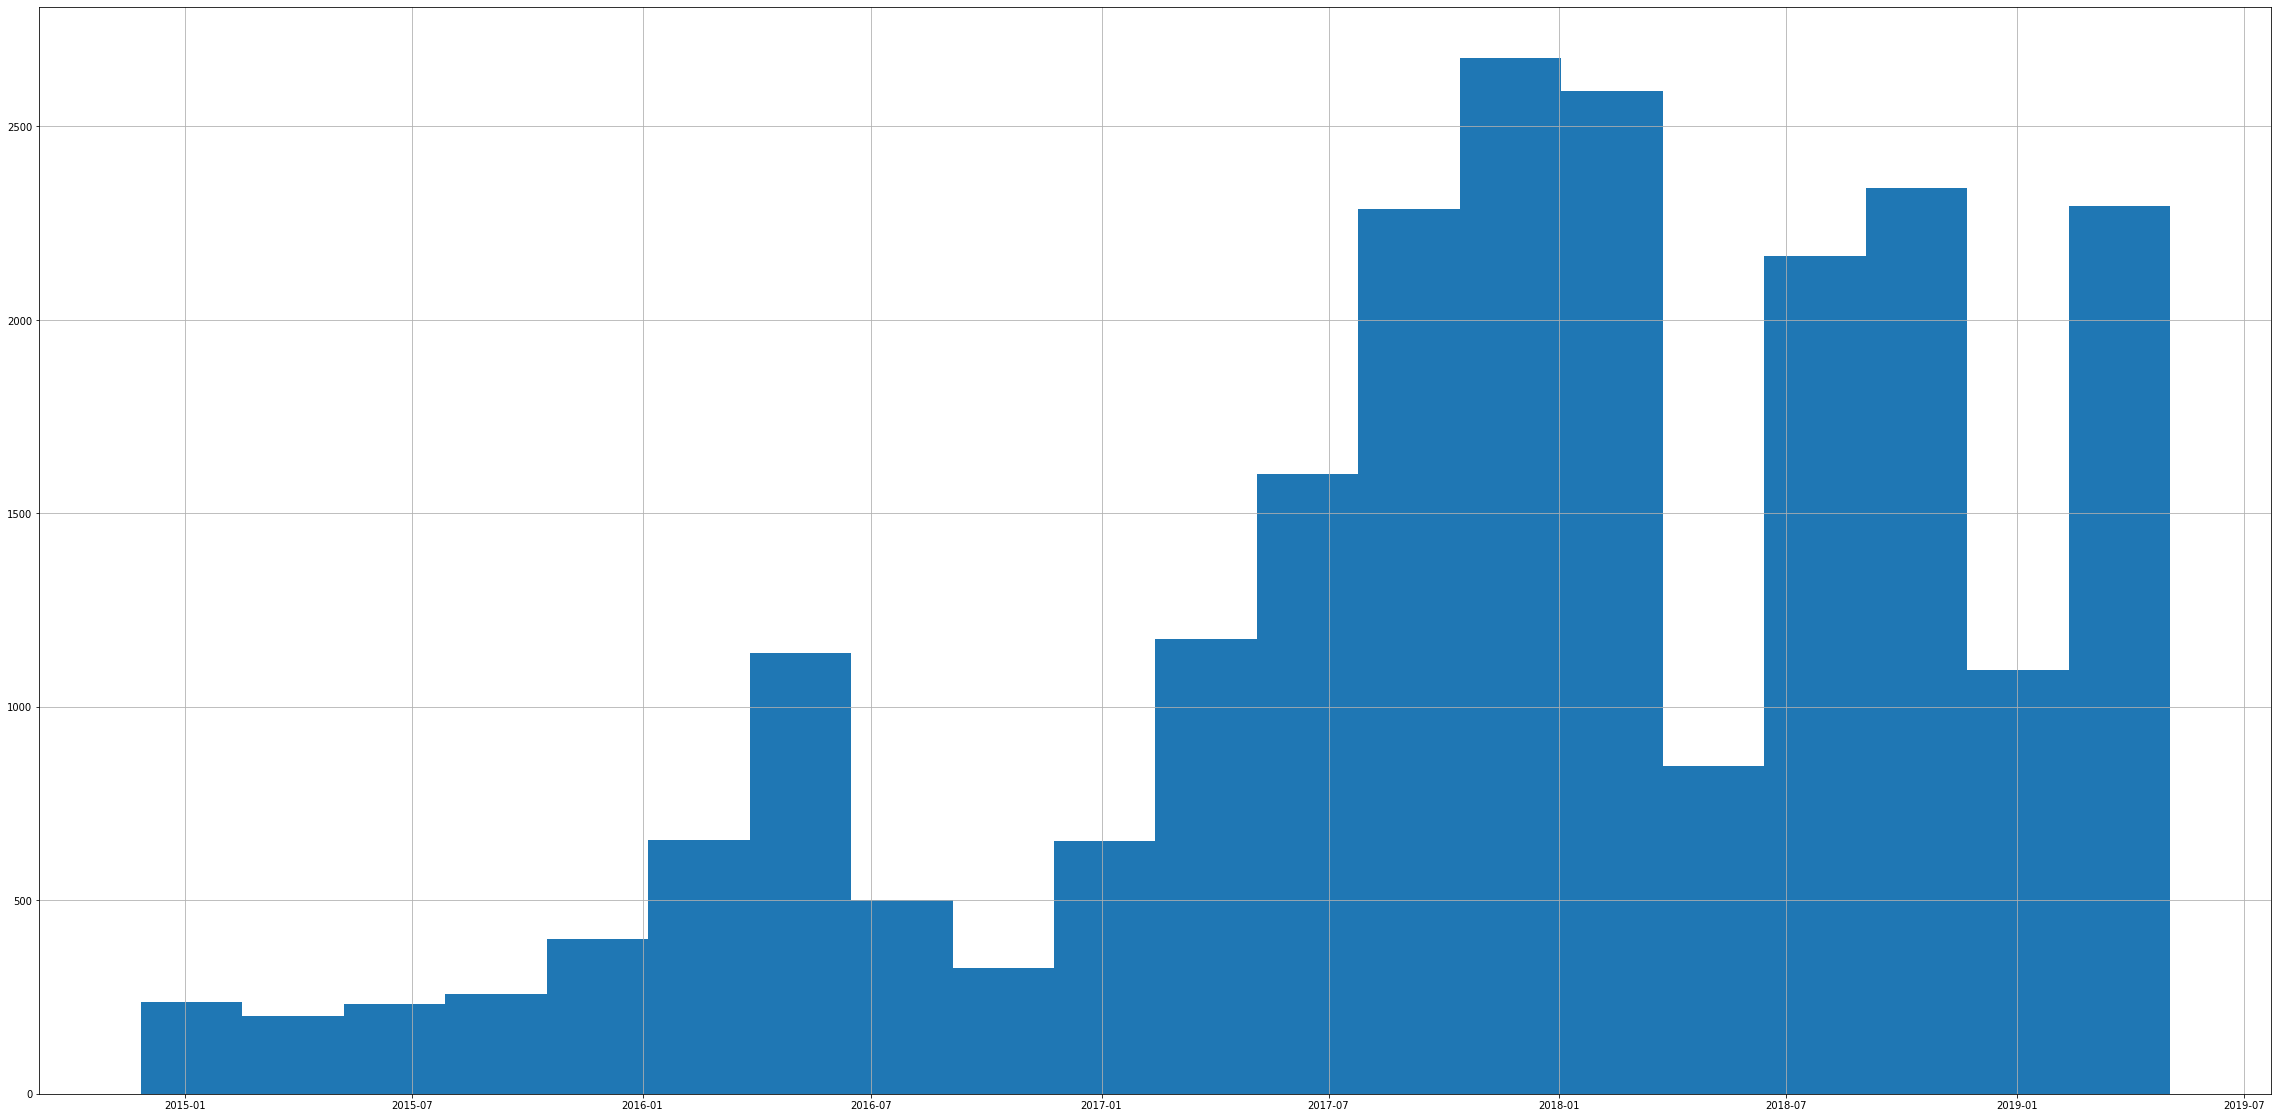

In [ ]:
data['first_day_exposition'].hist(bins=20, figsize=(40, 20))
print(data['first_day_exposition'].sort_values().tail(10))
print(data['first_day_exposition'].describe())

##### rooms - число комнат

Посмотрим квартиры, в которых больше 8 комнат. Все они большие - больше 150м2, что выглядит вполне реалистичным. В Санкт-Петербурге, в центре, есть квартиры в старом фонде с большим количеством комнат. Удалим квартиры, в которых количество комнат выглядит совсем нереалистичным - 14 и больше.

9550      9
4149     10
18891    10
18119    10
648      11
9688     11
20829    14
866      14
18848    16
14498    19
Name: rooms, dtype: int64
count    23681.000000
mean         2.067480
std          1.069268
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
       total_images   last_price  total_area first_day_exposition  rooms  \
21990            20   68000000.0       373.1           2018-09-08      8   
813               7   16500000.0       229.0           2016-02-25      8   
20788             7   18000000.0       245.0           2017-04-06      8   
4435             13   22190000.0       191.2           2017-12-05      8   
7857             11  150000000.0       230.0           2017-10-25      8   
8758              5   16100000.0       150.0           2018-07-10      8   
19865            20  180000000.0       347.0           2015-01-21      8   
18945             4   15800000.0       236

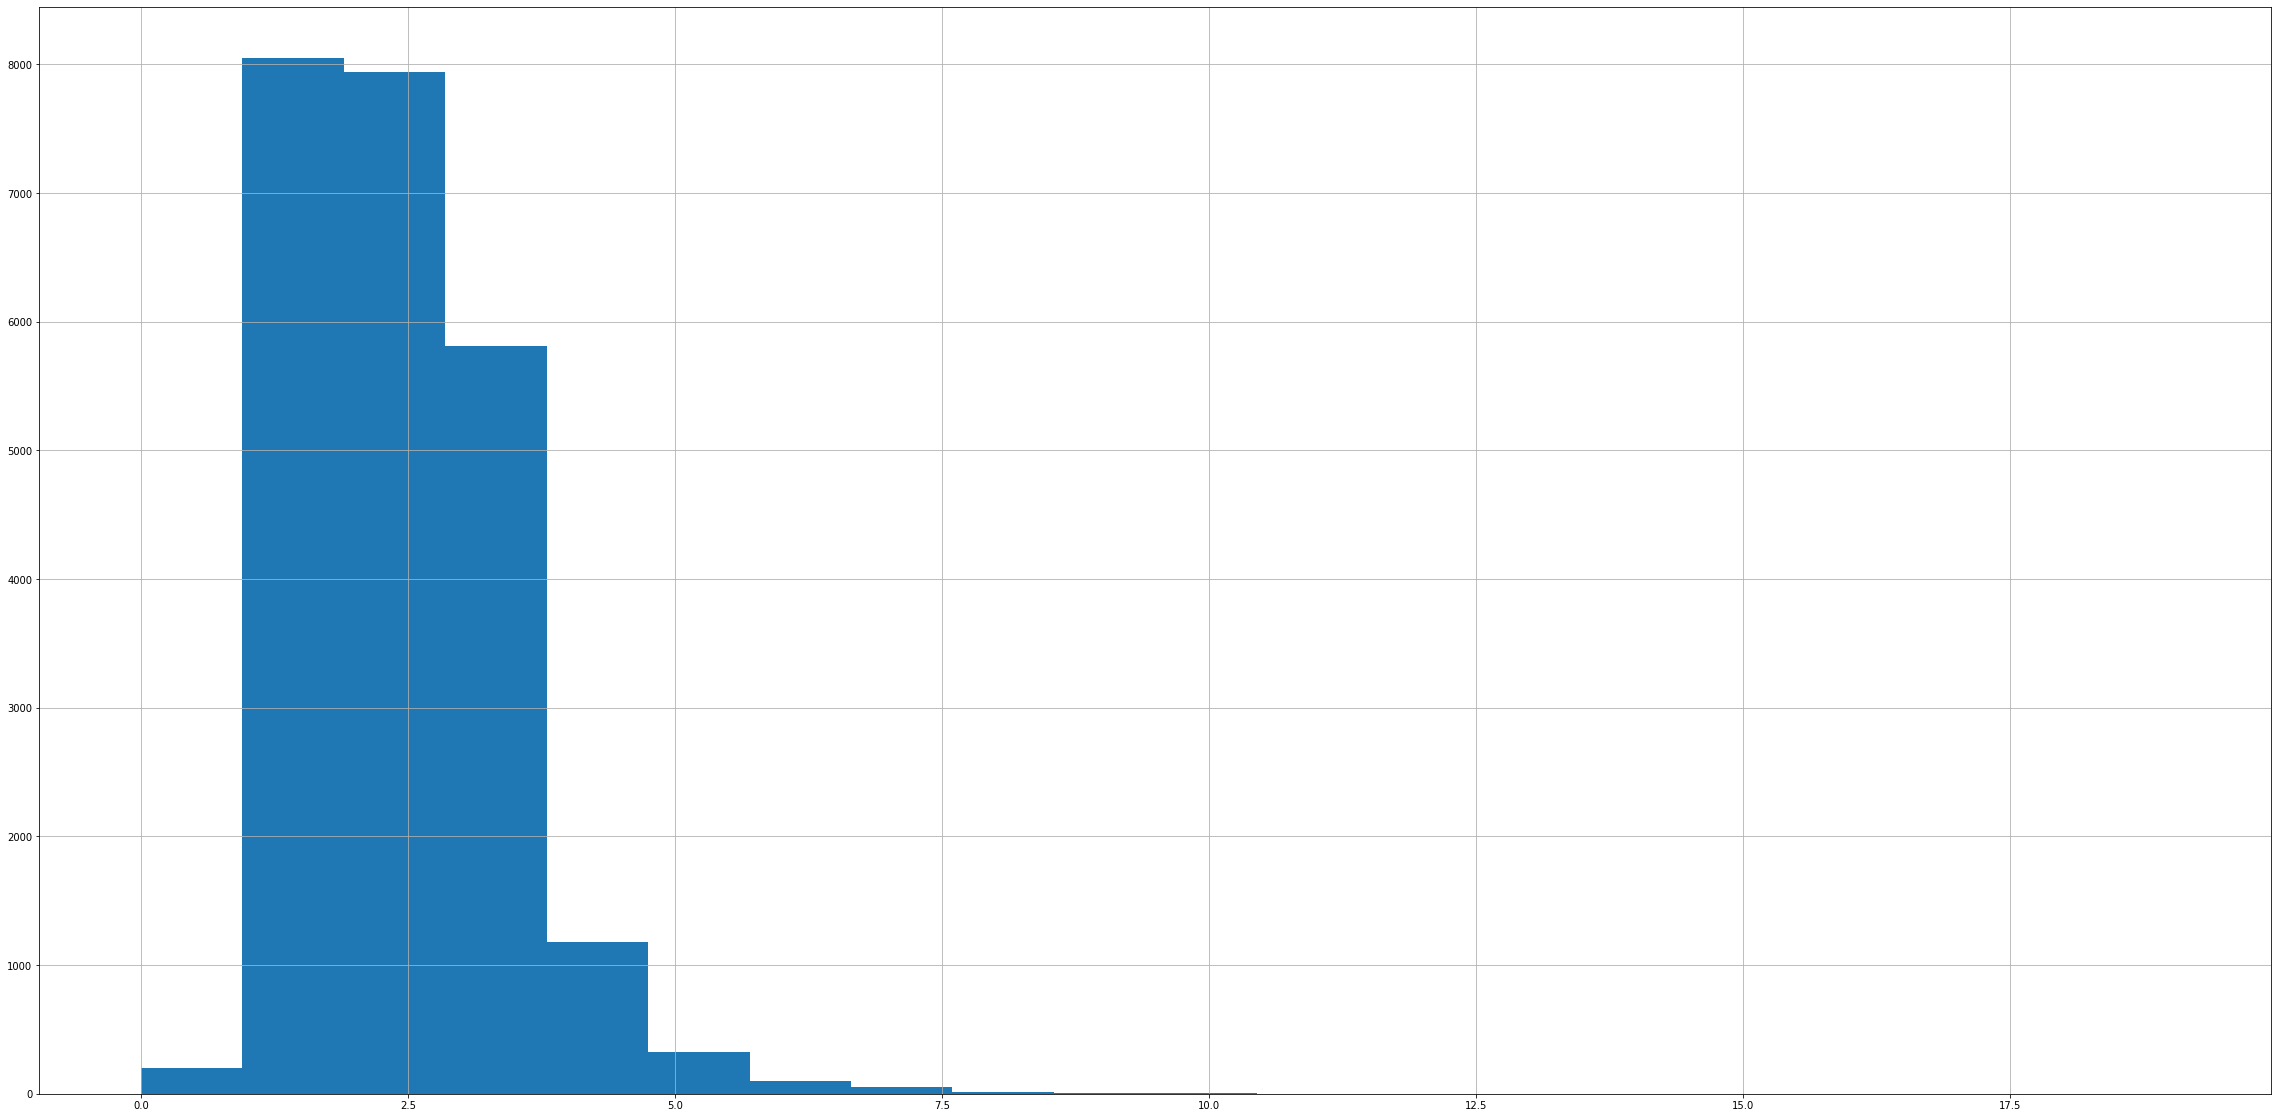

In [ ]:
data['rooms'].hist(bins=20, figsize=(40, 20))
print(data['rooms'].sort_values().tail(10))
print(data['rooms'].describe())
print(data.query('rooms >= 8').sort_values(by='rooms'))
#удалим квартиры с кол-вом комнат равным или большим 14:
data = data.query('rooms < 14')

#проверим квартиры, где кол-во комнат равно нулю. Составим сводную таблицу по кол-ву комнат и типу квартиры студия/не студия,
#кол-во балконов - переменная без пропусков, используем ее для подсчета пересечений
print(data.pivot_table(index=['rooms', 'studio'], values='balcony', aggfunc='count'))

#удалим квартиры, в которых кол-во комнат равно нулю, но квартира не является студией. И перепишем значения комнат с 1 на 0
#в тех квартирах, которые являются студией.

data = data.query('rooms >0 or (rooms == 0 and studio == True)')
data.loc[(data['rooms'] == 1) & (data['studio'] == True), 'rooms'] = 0


##### ceiling_height - высота потолков (м)

В старых домах Санкт-Петербурга есть квартиры с высокими потолками, выше 3-х метров. Будем считать, что допустимая высота потолков будет в промежутке выше 2-х метров (не включая это значение) и ниже 4-х метров (включая).
Можно заметить очень высокие значения в этой переменной - 24 метра и выше. Возможно, в этом случае при заполнении забыли указать запятую на нужном месте, и высота полотков равна 2-м метрам с небольшим. Поделим такие значения на 10, чтобы высота потолков выглядела правдоподобно.

count    23185.000000
mean         2.736563
std          0.996617
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
5076              0   3850000.0        30.5           2018-10-03      1   
355              17   3600000.0        55.2           2018-07-12      2   
4643              0   4300000.0        45.0           2018-02-01      2   
18545             6   3750000.0        43.0           2019-03-18      2   
6246              6   3300000.0        44.4           2019-03-25      2   
9379              5   3950000.0        42.0           2017-03-26      3   
11285             0   1950000.0        37.0           2019-03-20      1   
14382             9   1700000.0        35.0           2015-12-04      1   
5669              4   4400000.0        50.0           2017-08-08      2   
21824            20   2450000.0      

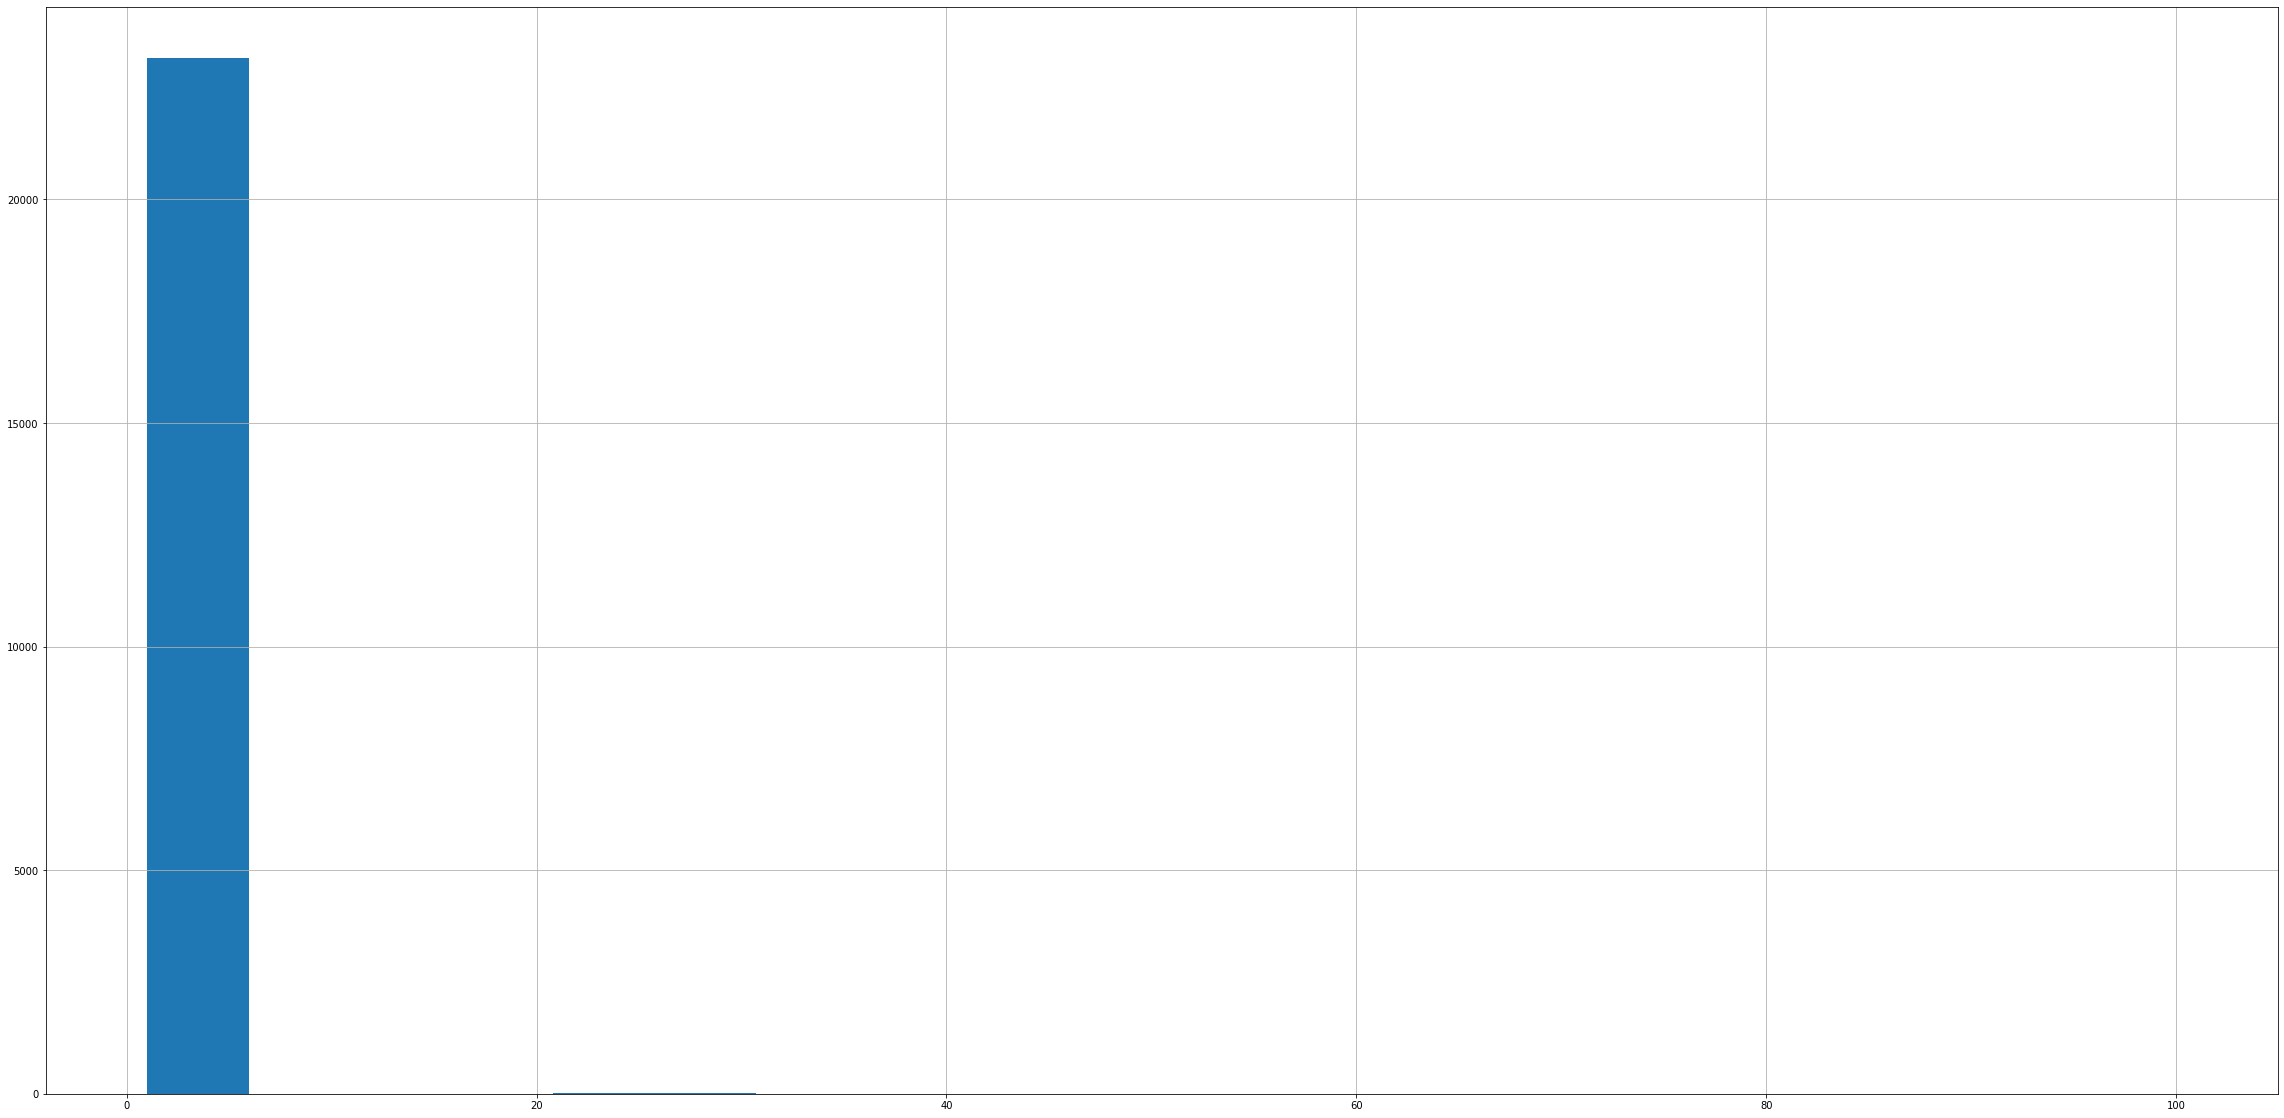

In [ ]:
data['ceiling_height'].hist(bins=20, figsize=(40, 20))
print(data['ceiling_height'].describe())
print(data.query('ceiling_height >= 24').sort_values(by='ceiling_height'))
#поделим значения в 24-32м на 10:
data.loc[(data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data.loc[(data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 32), 'ceiling_height'] / 10
#оставим только строки, где высота потолков выше 2м и ниже или равно 4м:
data = data.loc[(data['ceiling_height'] > 2.0) & (data['ceiling_height'] <= 4.0) | (data['ceiling_height'].isna()) == True]


##### floors_total - всего этажей в доме

Минимальный этаж у представленных домов - 1, что вполне правдоподобно. Есть редкие значения количества этажей в доме, большие 30. По данным ниже видно, что это дома в Санкт-Петербурге, что тоже вполне правдоподобно. Кроме одного дома в 60 этажей в Кронштадте, там таких высоких домов нет. Возможно, это ошибка и всего в доме 6 этажей, но все равно удалим это значение, потому что видны неправдоподобные значения расстояния до центра города и аэропорта (они очень большие).

count    23459.000000
mean        10.668699
std          6.584411
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
871              14   7777777.0        75.0           2017-11-16      2   
1060             10   5200000.0        50.0           2015-11-06      2   
1697             11   3550000.0        28.0           2018-02-08      1   
1917             13  10150000.0        74.0           2017-11-17      2   
2253             12   3800000.0        45.5           2018-06-28      2   
2966              9   4300000.0        37.0           2017-08-08      1   
4855             12   5500000.0        50.0           2017-06-22      1   
5807             17   8150000.0        80.0           2019-01-09      2   
5808             12   4590000.0        43.0           2018-10-19      1   
7236             10   4599000.0        

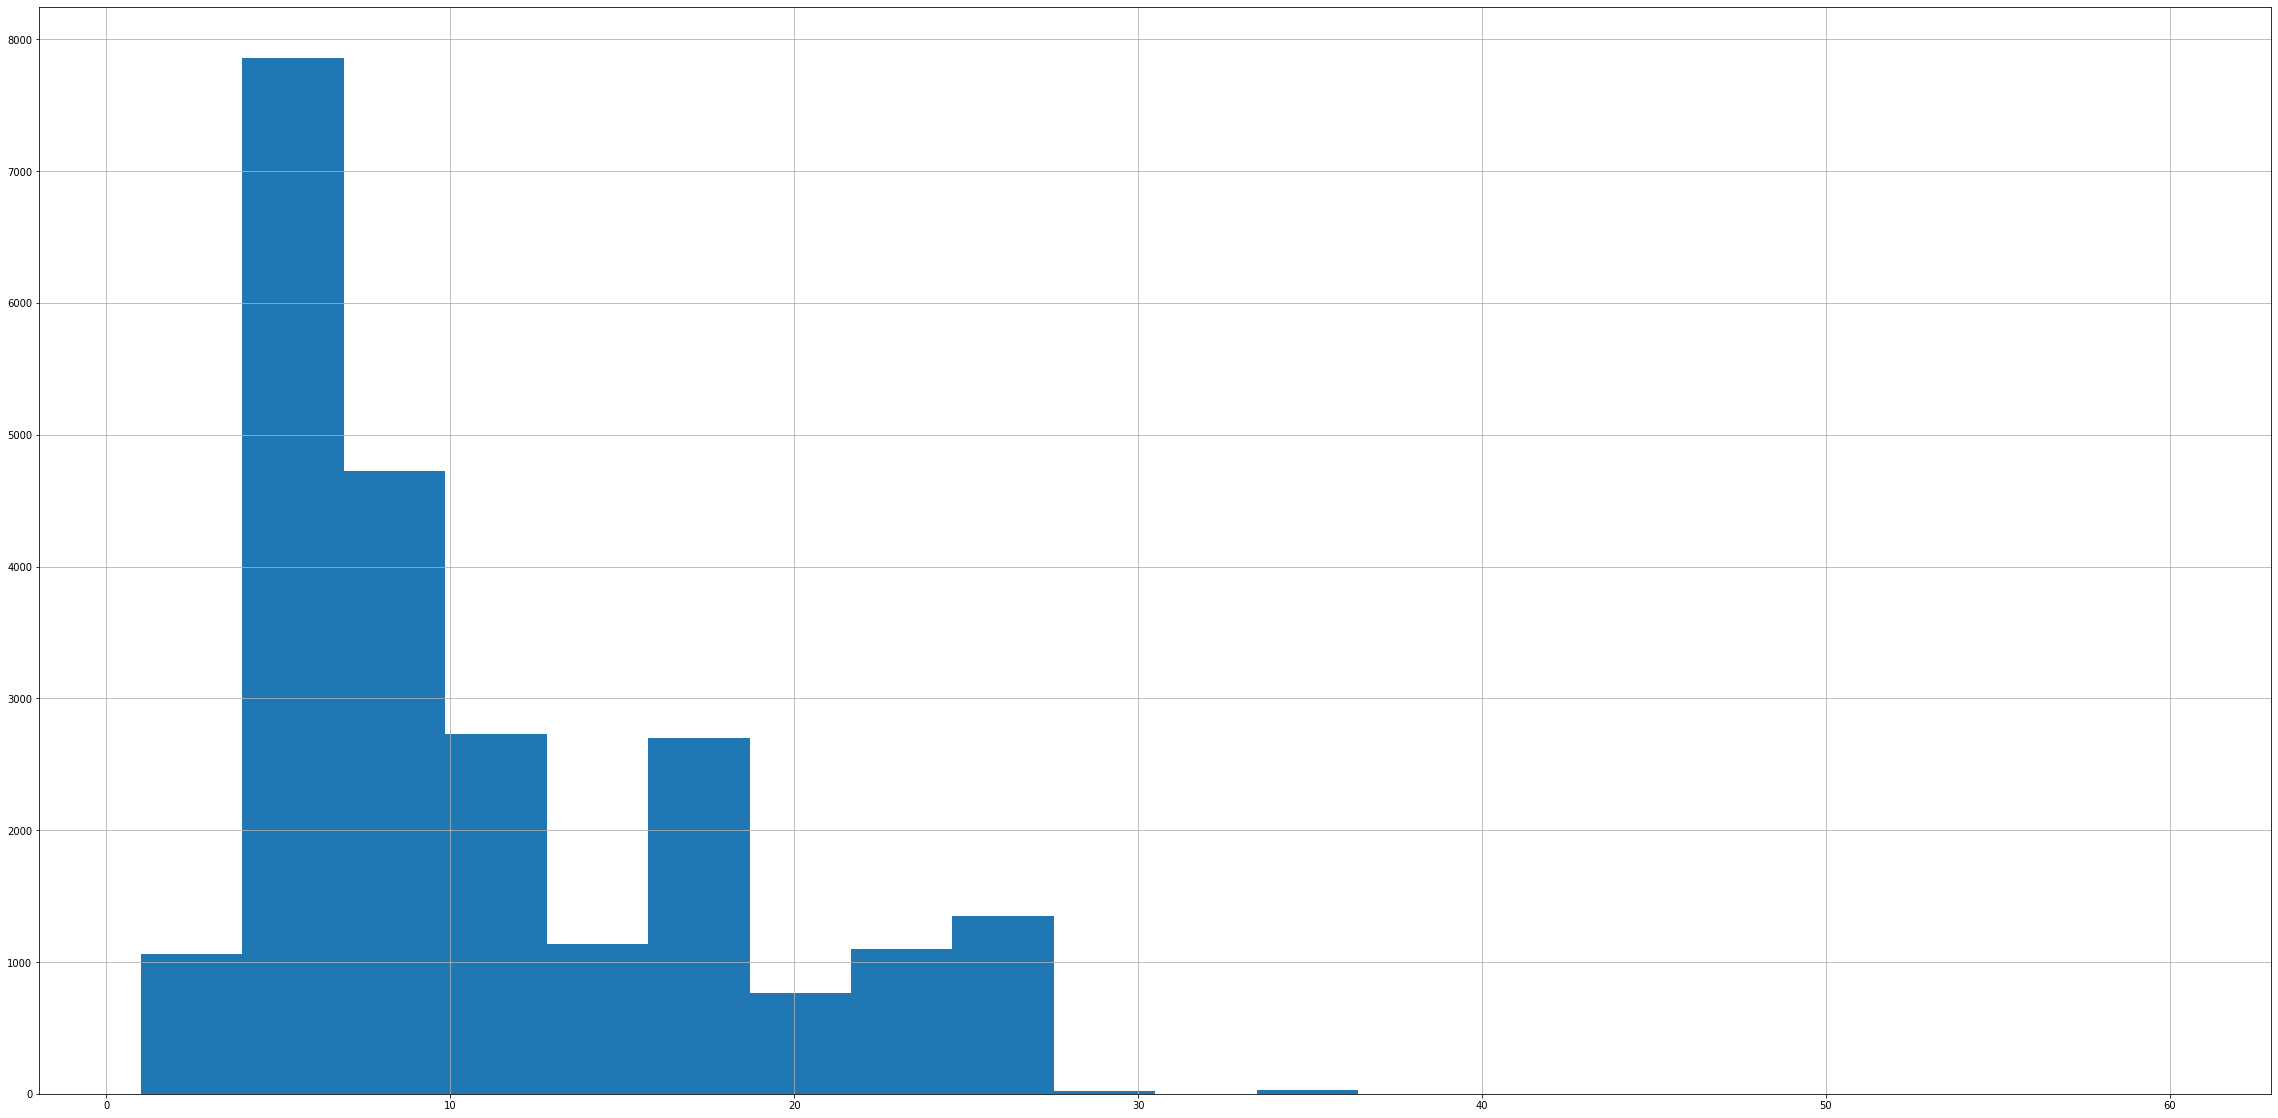

In [ ]:
data['floors_total'].hist(bins=20, figsize=(40, 20))
print(data['floors_total'].describe())
print(data.query('floors_total > 30'))

#удалим квартиру в Кронштадте с 60-ти этажным домом
data = data.query('(floors_total < 60.0) or (floors_total.isna() == True)')


##### living_area - жилая площадь в квадратных метрах (м²)

count    23369.000000
mean        34.153265
std         20.509245
min          2.000000
25%         18.500000
50%         30.000000
75%         42.300000
max        312.500000
Name: living_area, dtype: float64
total_images            322
last_price              322
total_area              322
first_day_exposition    322
rooms                   322
ceiling_height          307
floors_total            315
living_area             322
floor                   322
is_apartment            322
studio                  322
open_plan               322
kitchen_area            306
balcony                 322
locality_name           321
airports_nearest        258
cityCenters_nearest     260
parks_around3000        322
parks_nearest            99
ponds_around3000        322
ponds_nearest           140
days_exposition         291
locality_name_new       321
dtype: int64


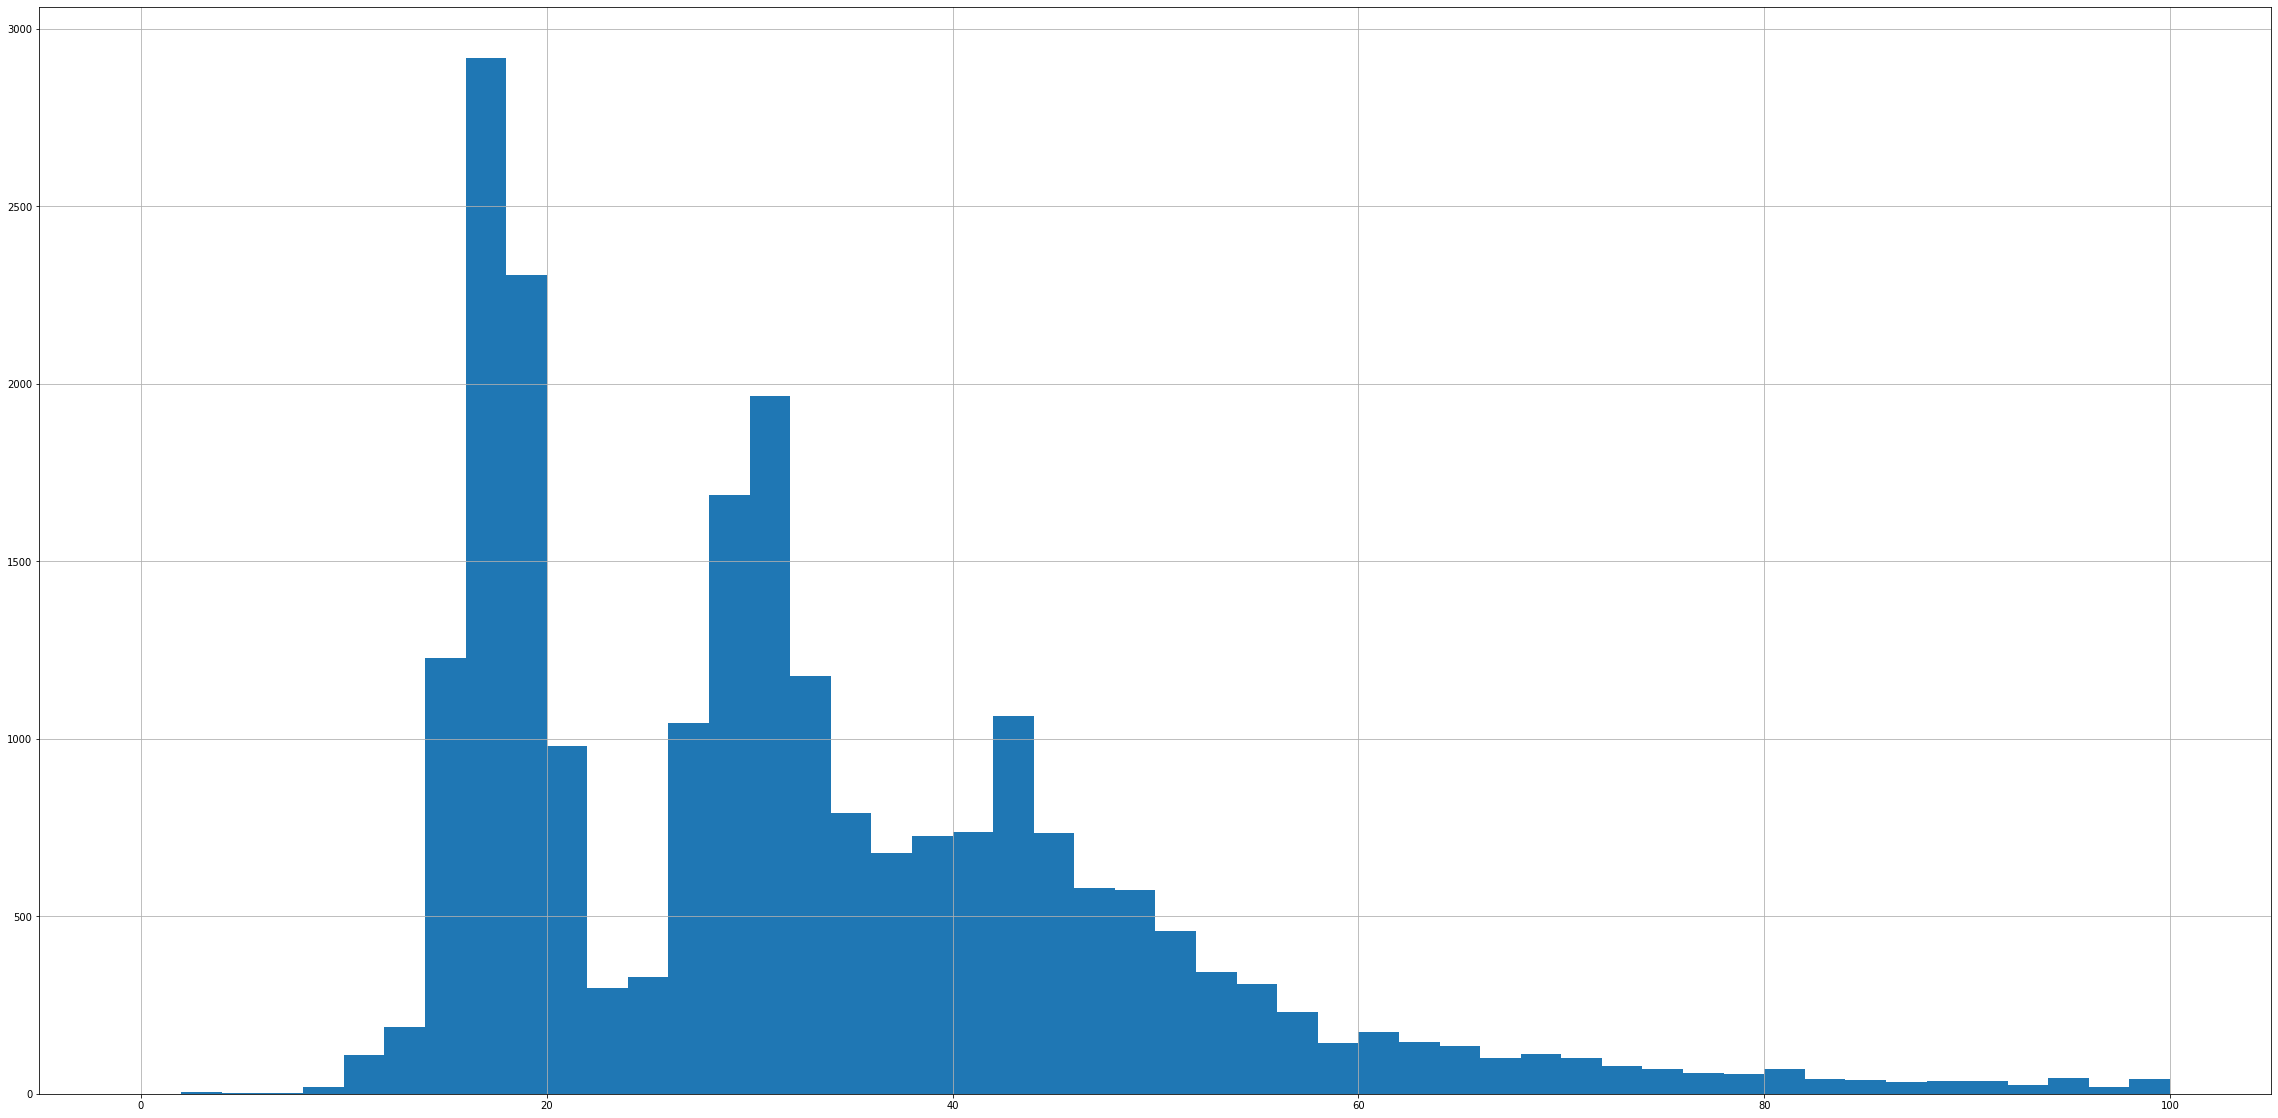

In [ ]:
data['living_area'].hist(bins=50, range=(0, 100), figsize=(40, 20)) #посмотрим гистограмму до 100м2, большие значения у
#больших по площади квартир, эту переменную мы уже посмотрели
print(data['living_area'].describe())
print(data.query('living_area < 14.0').count()) #по нормам минимальная жилая площадь для однокомнатной
#квартиры должна быть 14м2. Квартир с меньшей площадью 315, удалим их из базы:
data = data.query('(living_area >= 14.0) or (living_area.isna() == True)')


##### floor - этаж

Выделяются квартиры, этаж которых больше 25. Из выгрузки видно, что все они расположены в Санкт-Петербурге (или близлежайших населенных пунктах с высотной застройкой). Этаж квартиры не превышает этаж дома, поэтому, оставим все наблюдения на местах.

count    23222.000000
mean         5.869305
std          4.856337
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
8                20   2900000.0       33.16           2018-05-23      1   
113               8   5750000.0       78.00           2016-05-19      3   
1917             13  10150000.0       74.00           2017-11-17      2   
2026              9   2310000.0       33.69           2016-04-15      1   
2629             20   3150021.0       36.61           2018-02-20      1   
4247              4   2450000.0       36.00           2017-05-16      1   
4590              6   2890000.0       32.70           2018-11-02      1   
4724              1   4800000.0       70.00           2017-05-07      3   
6157              9   2990000.0       33.30           2017-07-19      1   
6238              9   4400000.0       40.30   

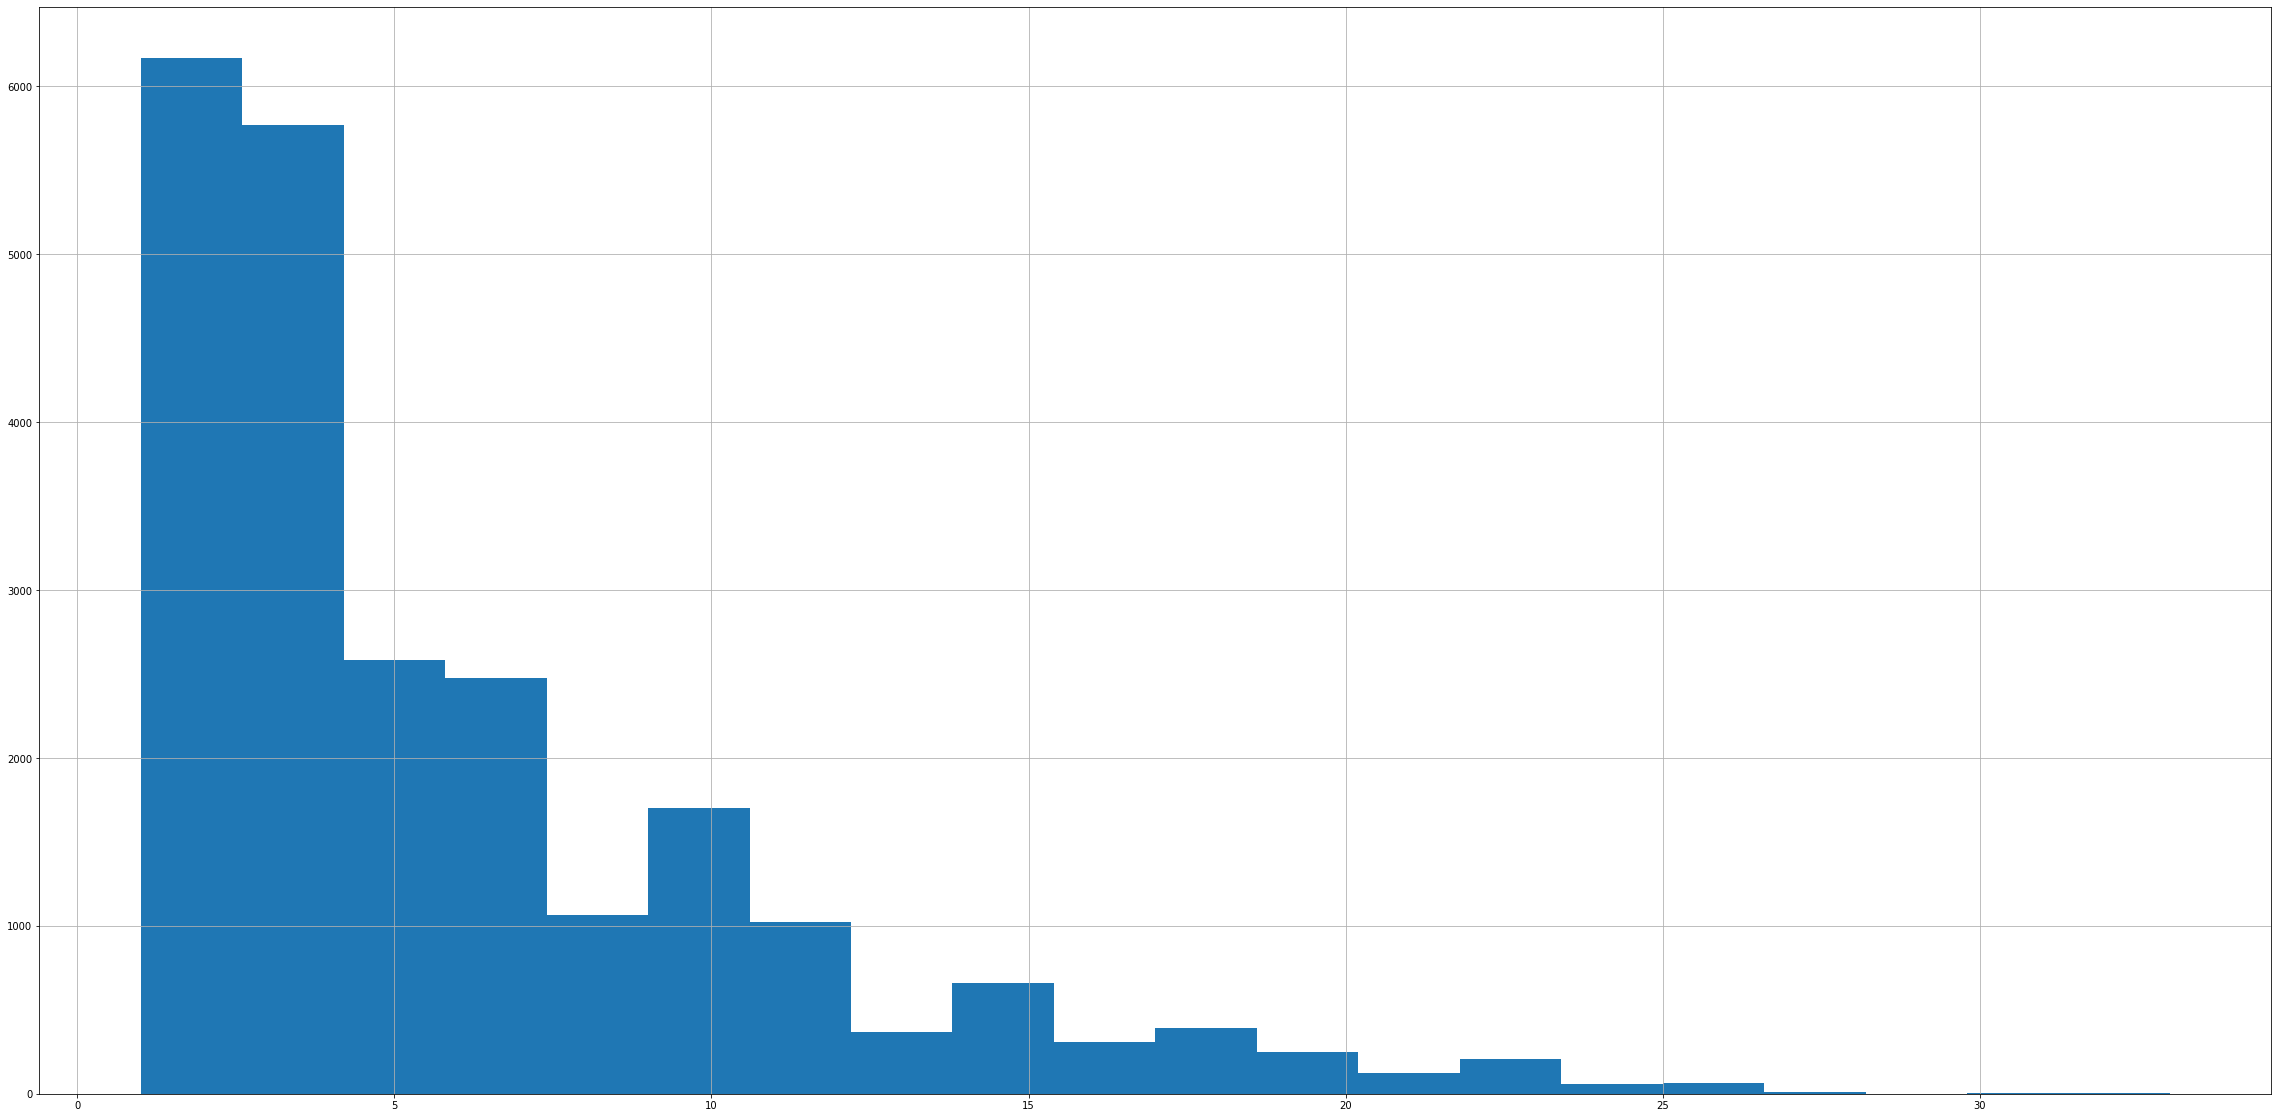

In [ ]:
data['floor'].hist(bins=20, figsize=(40, 20))
print(data['floor'].describe())
print(data.query('floor > 25.0'))

##### kitchen_area - площадь кухни в квадратных метрах (м²)

Есть минимально допустимые размеры кухни. Это 5м2 для кухни-ниши. Удалим значения меньше 5м2.

count    22924.000000
mean        10.420992
std          5.555327
min          1.300000
25%          7.000000
50%          9.100000
75%         11.780000
max        107.000000
Name: kitchen_area, dtype: float64


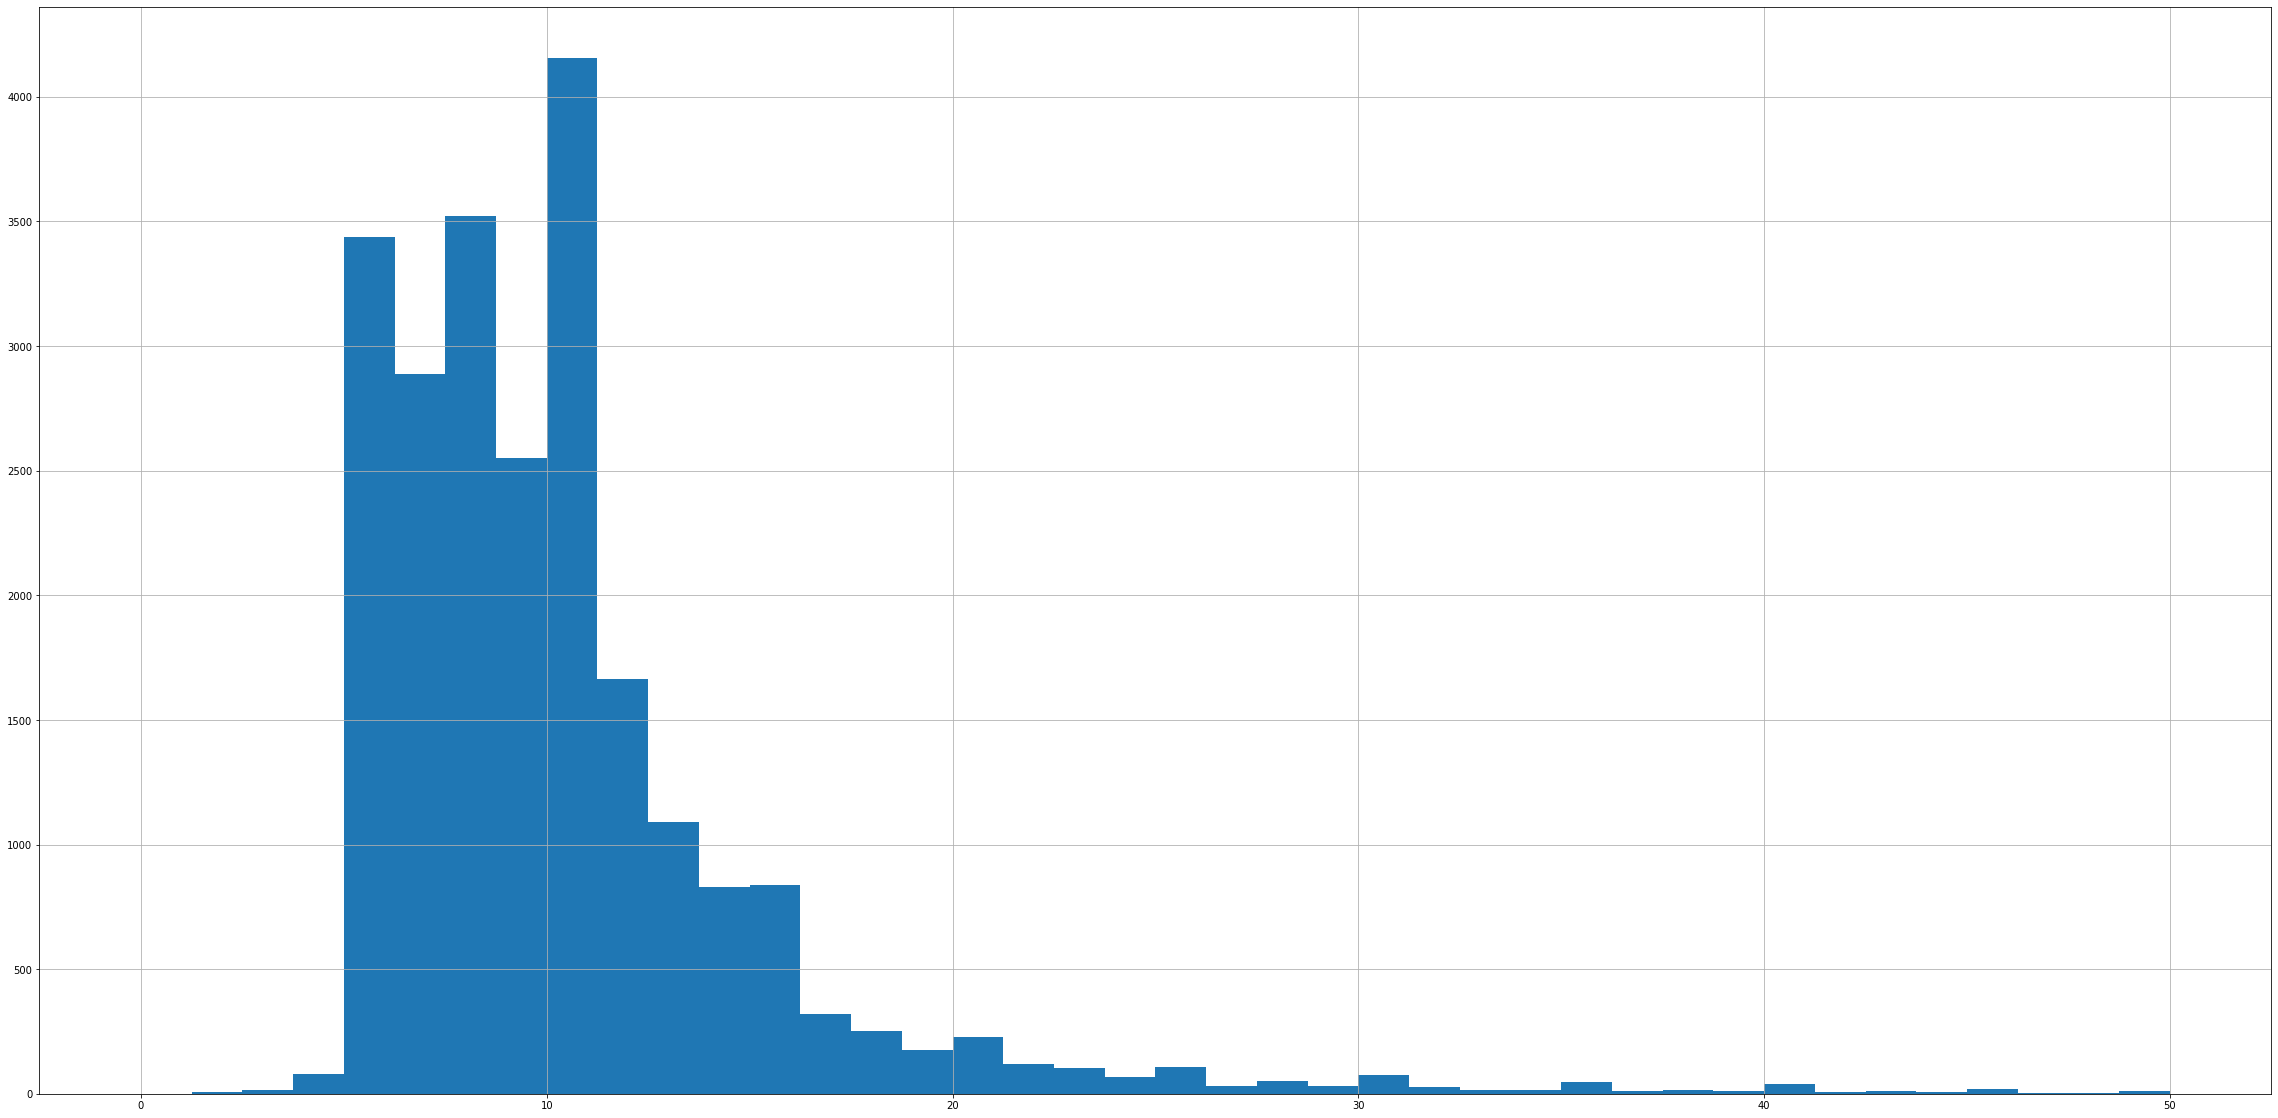

In [ ]:
data['kitchen_area'].hist(bins=40, range=(0, 50), figsize=(40, 20)) #оставим диапазон от 0 до 50м2, чтобы лучше представить данные
print(data['kitchen_area'].describe())

#Оставим значения большие или равные 5м2
data = data.query('(kitchen_area >= 5.0) or (kitchen_area.isna() == True)')

##### balcony - число балконов

Балконов в базе недвижимости от 0 до 5, это вполне реальные цифры - большое кол-во балконов может быть в квартирах с большим кол-вом комнат. Ничего удалять не будем.

count    23121.000000
mean         0.591670
std          0.961588
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


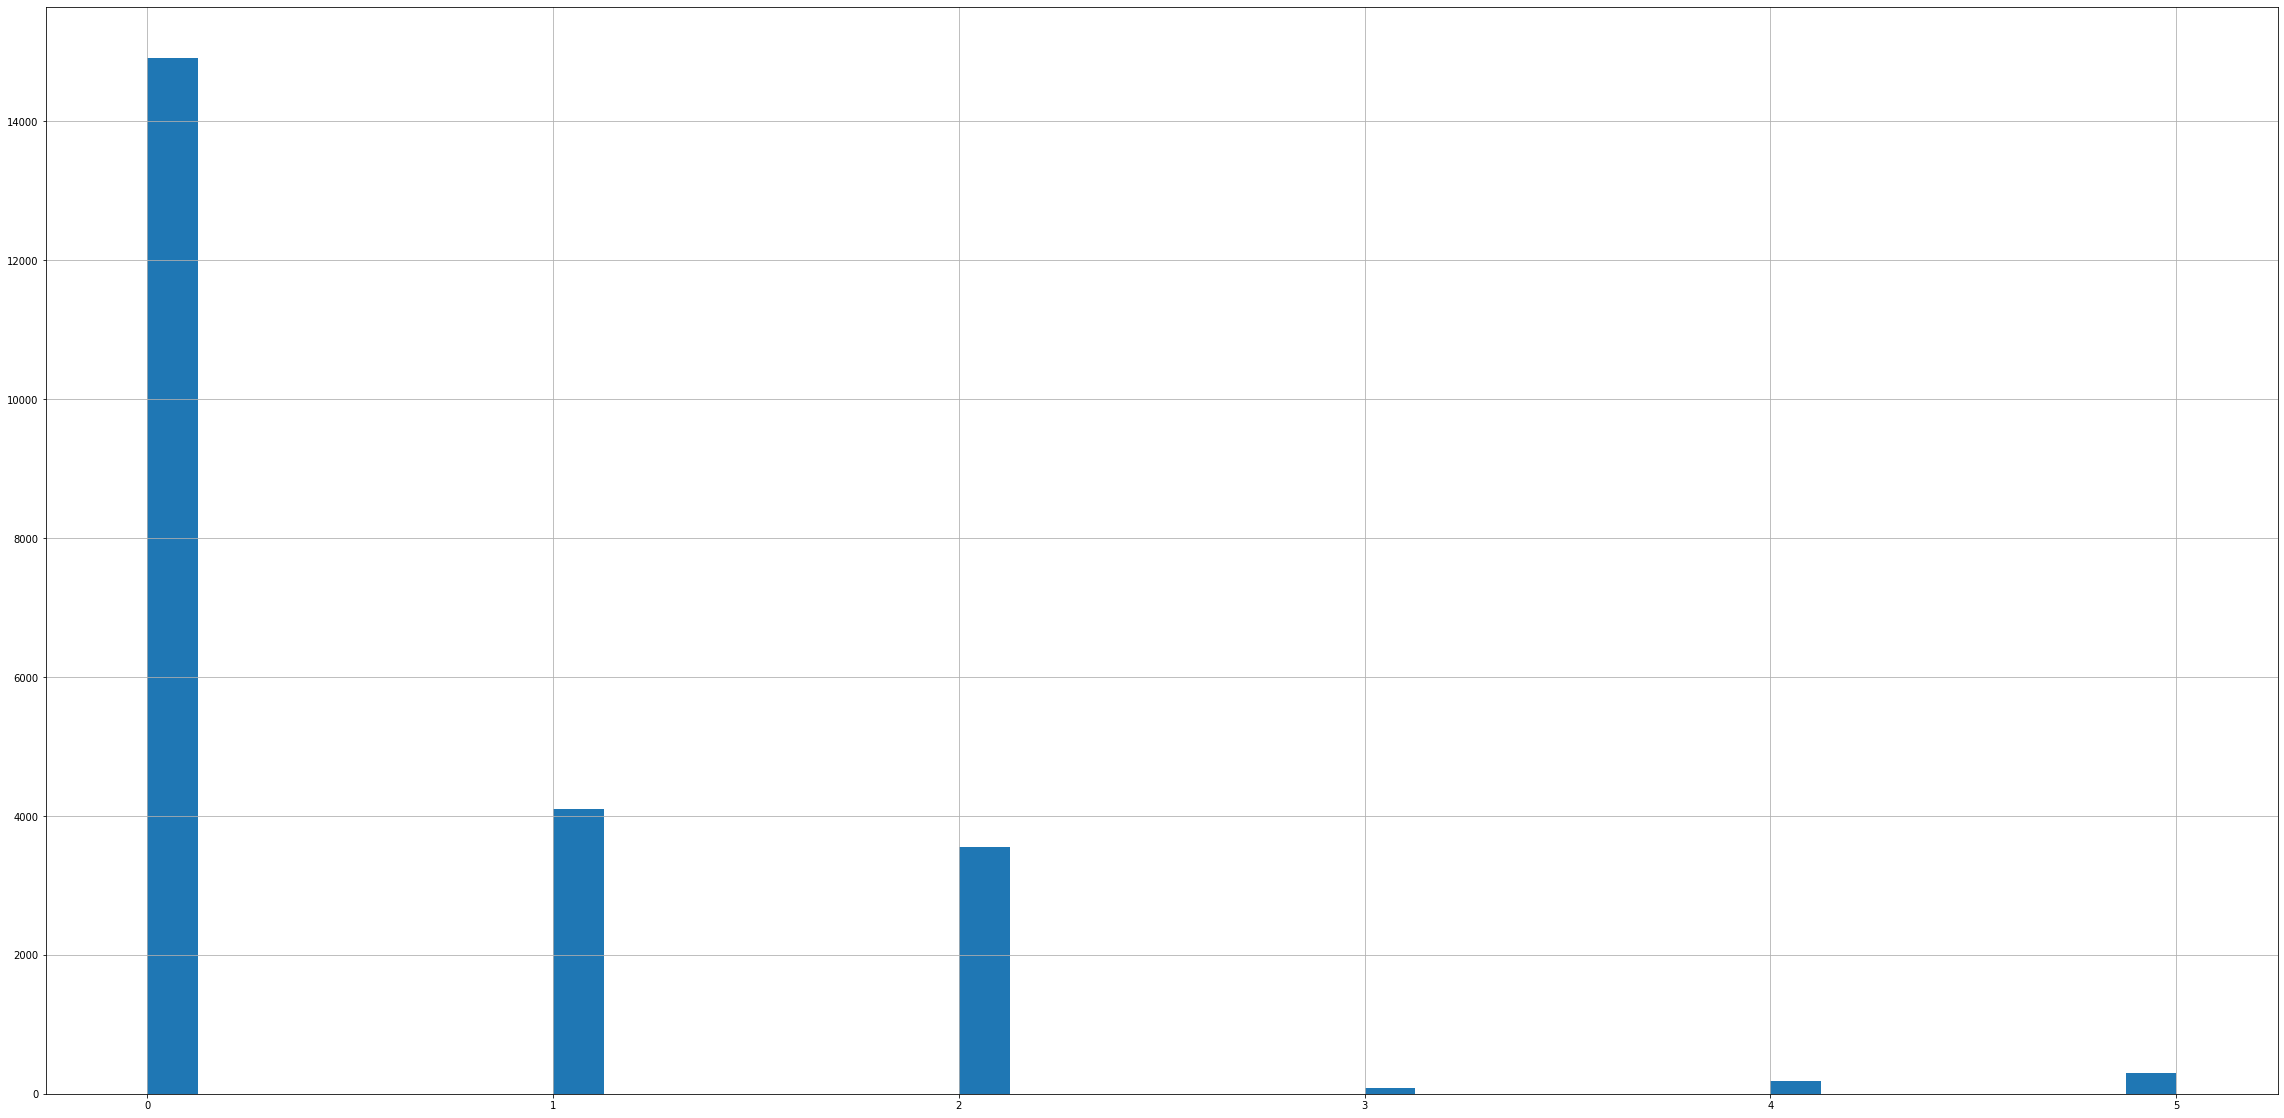

In [ ]:
data['balcony'].hist(bins=40, figsize=(40, 20))
print(data['balcony'].describe())

##### airports_nearest - расстояние до ближайшего аэропорта в метрах (м)

В Ленинградской области один пассажирский аэропорт - Пулково. Макисмальное расстояние до него вполне может быть более 84 км от удаленного населенного пункта, а минимальное - 6 км. Удалим значение расстояния равное нулю.

count    18337.000000
mean     29500.484458
std      13036.376823
min          0.000000
25%      18750.000000
50%      27280.000000
75%      38705.000000
max      84869.000000
Name: airports_nearest, dtype: float64
21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64


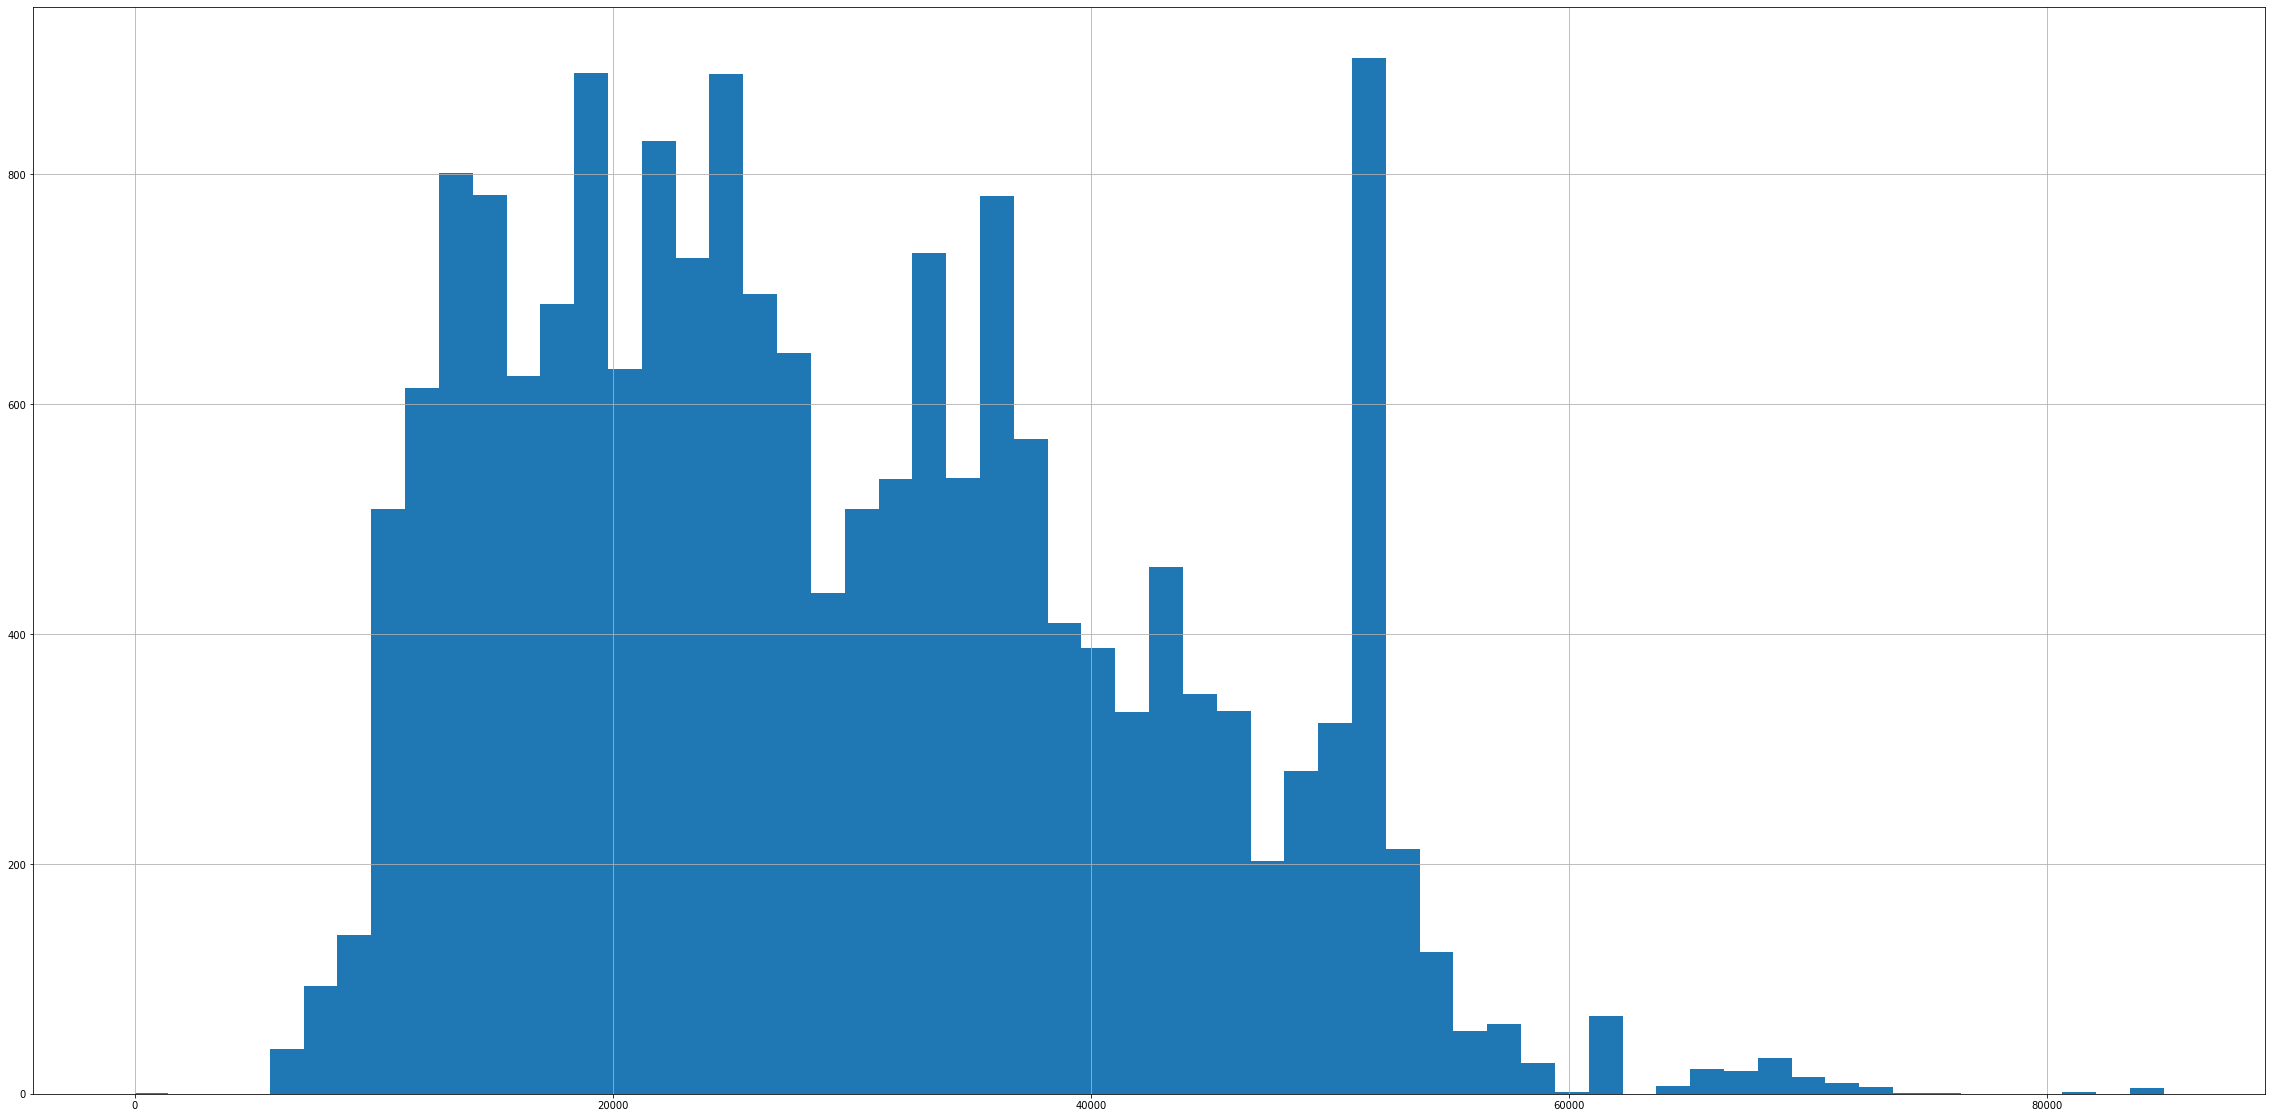

In [ ]:
data['airports_nearest'].hist(bins=60, figsize=(40, 20))
print(data['airports_nearest'].describe())
print(data['airports_nearest'].sort_values().head())

#Удалим значение расстояния равное нулю
data = data.query('(airports_nearest > 0.0) or (airports_nearest.isna() == True)')

##### cityCenters_nearest - расстояние до центра города (м)

В описании переменной недостаточно данных - наверное, расстояние до центра города - это расстояние до центра Санкт-Петербурга (а не города, где продается квартира). Это объясняет расстояние в несколько десятков километров. Такие расстояния (больше 45км) характерны для Зеленогорска, Кронштадта, Ломоносов, Петергофа, поселков Молодежное и Репино. Хотя расстояние от них до центра Санкт-Петербурга немного меньше, не будем трогать эти данные. Вернемся к значениям позже, если возникнут вопросы на этапе анализа данных.

count    18416.000000
mean     14438.809025
std       8562.088173
min        181.000000
25%       9496.750000
50%      13261.000000
75%      16722.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
                    cityCenters_nearest
locality_name_new                      
Зеленогорск                          21
Кронштадт                            92
Ломоносов                           120
Петергоф                             24
поселок Молодежное                    5
поселок Репино                        1


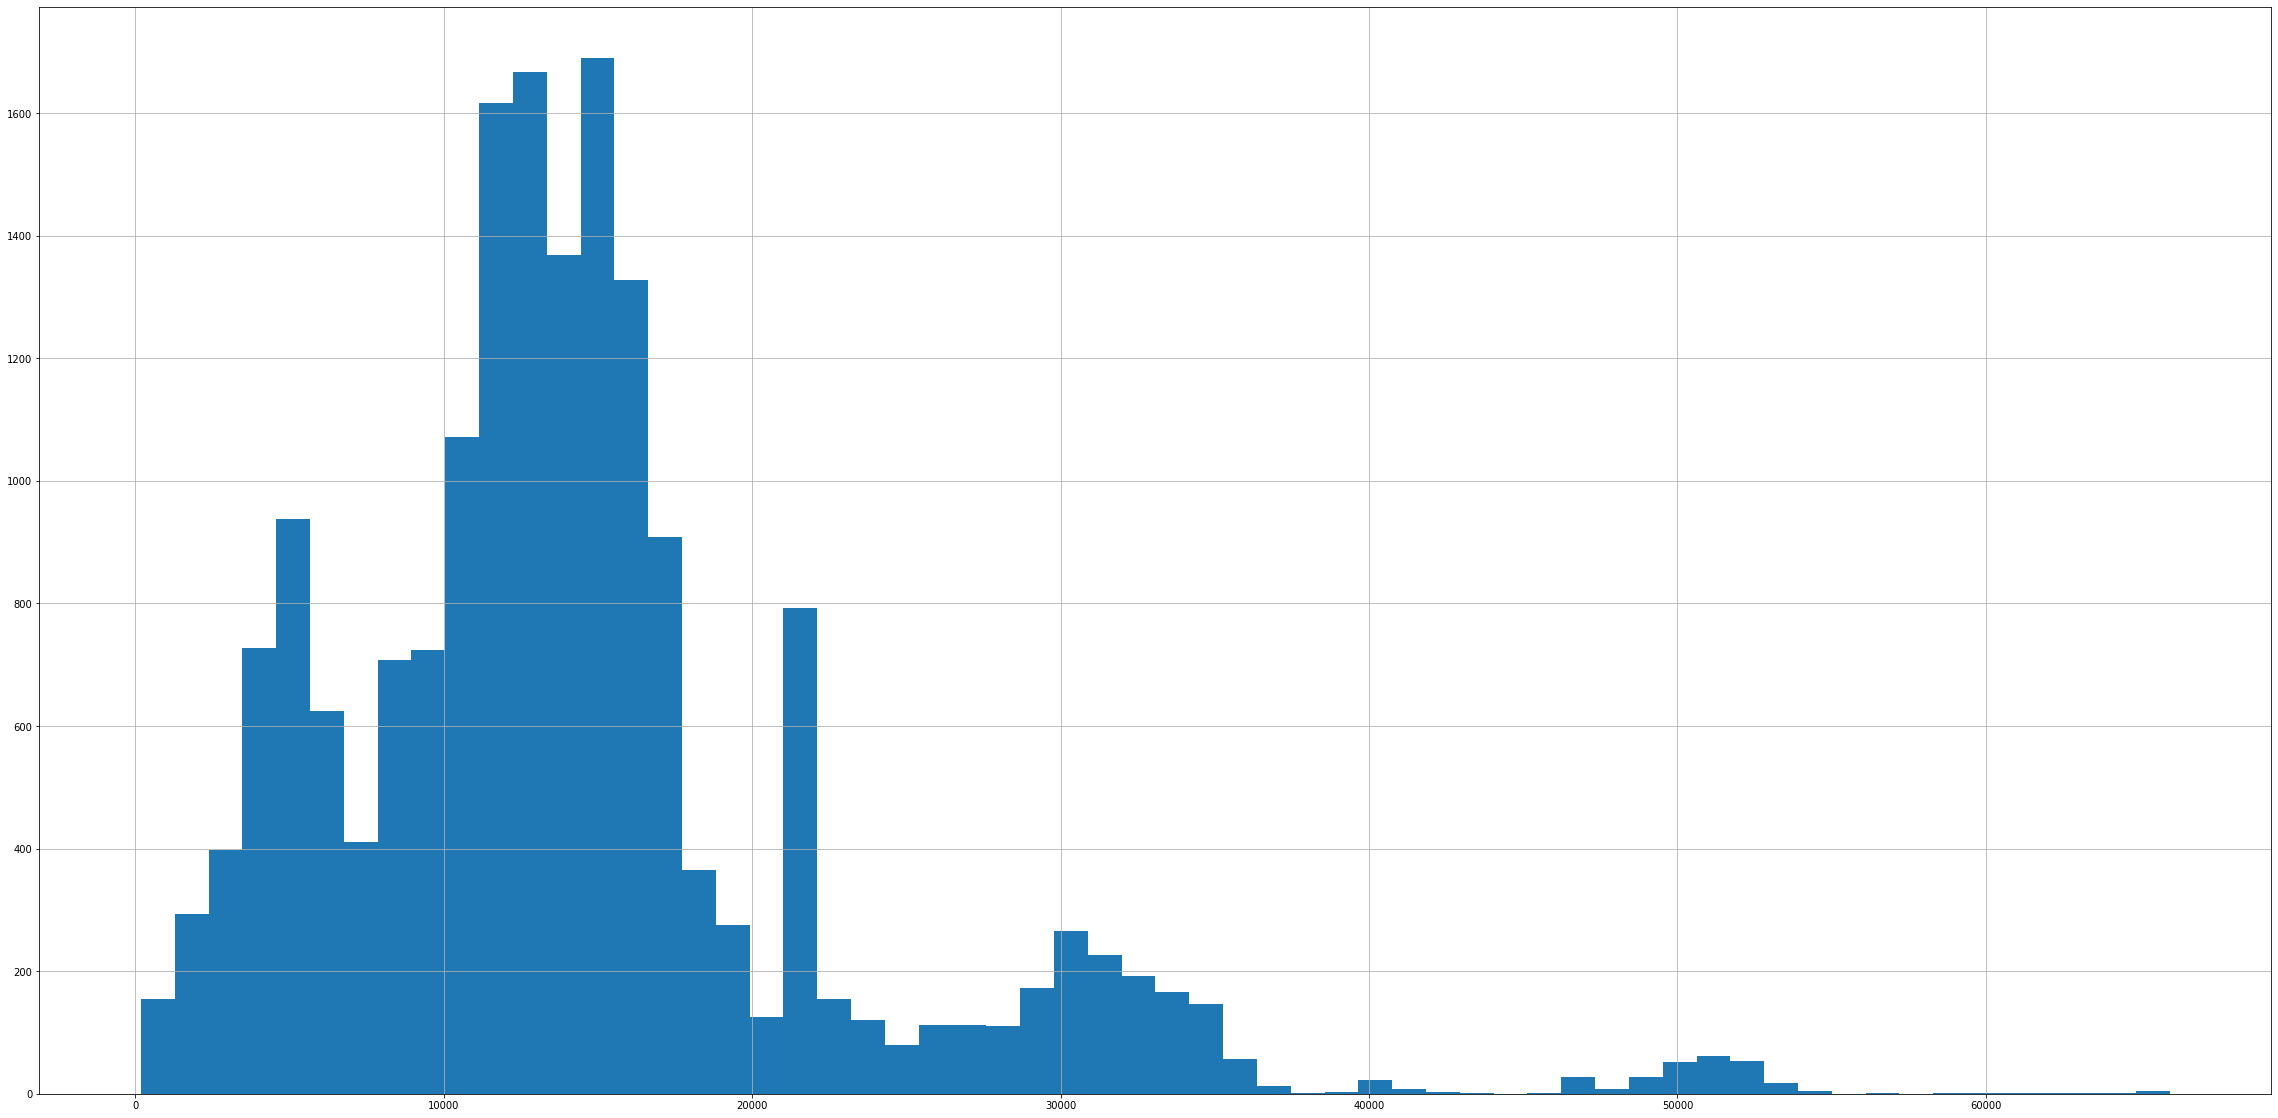

In [ ]:
data['cityCenters_nearest'].hist(bins=60, figsize=(40, 20))
print(data['cityCenters_nearest'].describe())

#посмотрим, в каких населенных пунктах расстояние до центра больше 45км
print(data.query('cityCenters_nearest >= 45000').pivot_table(index='locality_name_new', values='cityCenters_nearest', aggfunc='count'))

##### parks_around3000 - число парков в радиусе 3 км

Значений больше 3 нет в базе данных, 3 парка в округе - вполне реальное значение, оставляем все как есть.

count    23120.000000
mean         0.469853
std          0.748342
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


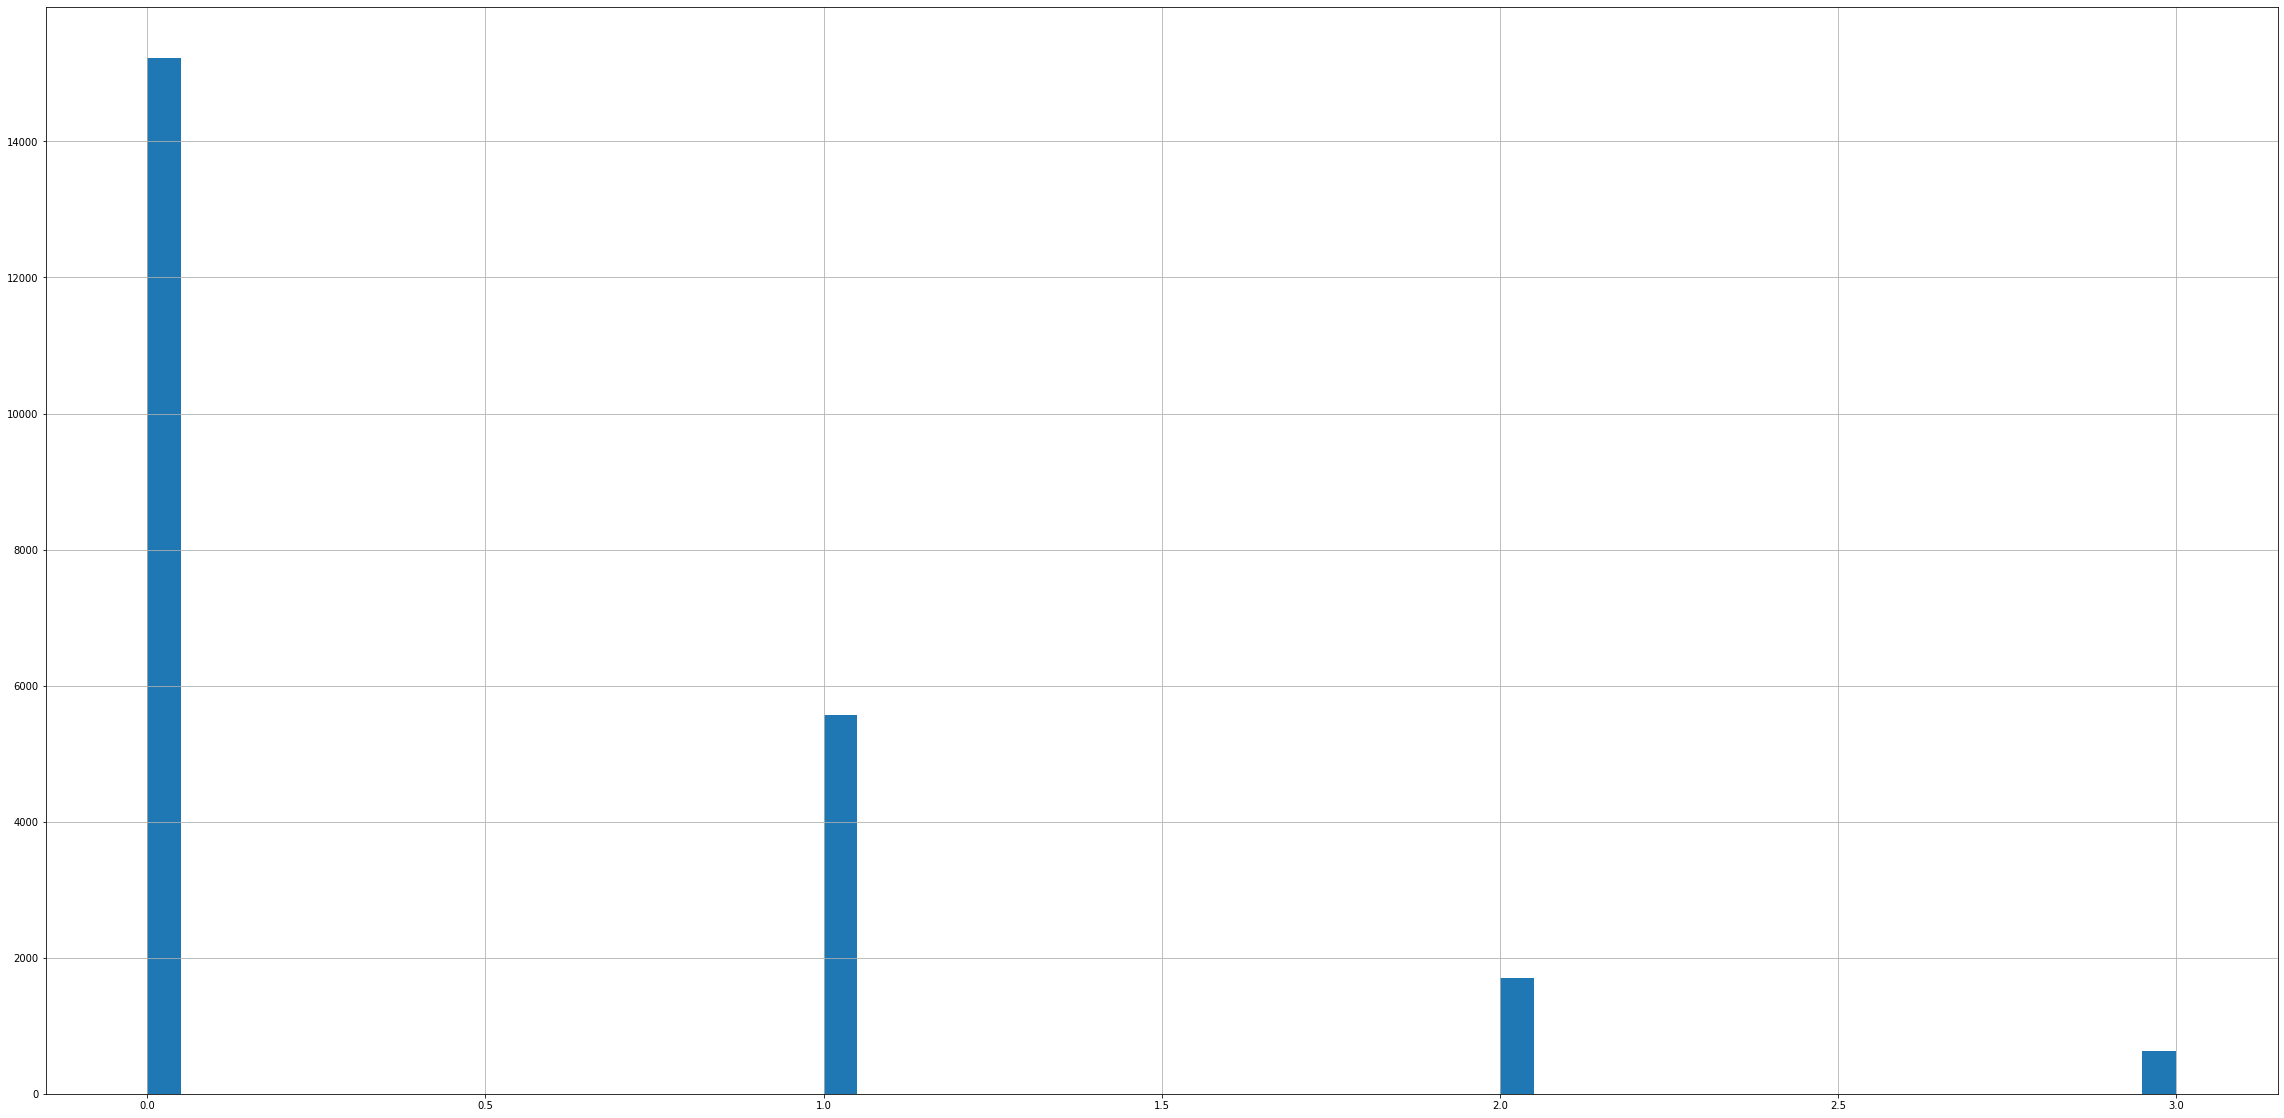

In [ ]:
data['parks_around3000'].hist(bins=60, figsize=(40, 20))
print(data['parks_around3000'].describe())

##### parks_nearest - расстояние до ближайшего парка (м)

По условиям - в переменной должно быть значение, меньшее или равное 3000м, это 3 км. Большие значения удалим.

count    7903.000000
mean      490.538024
std       341.825667
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


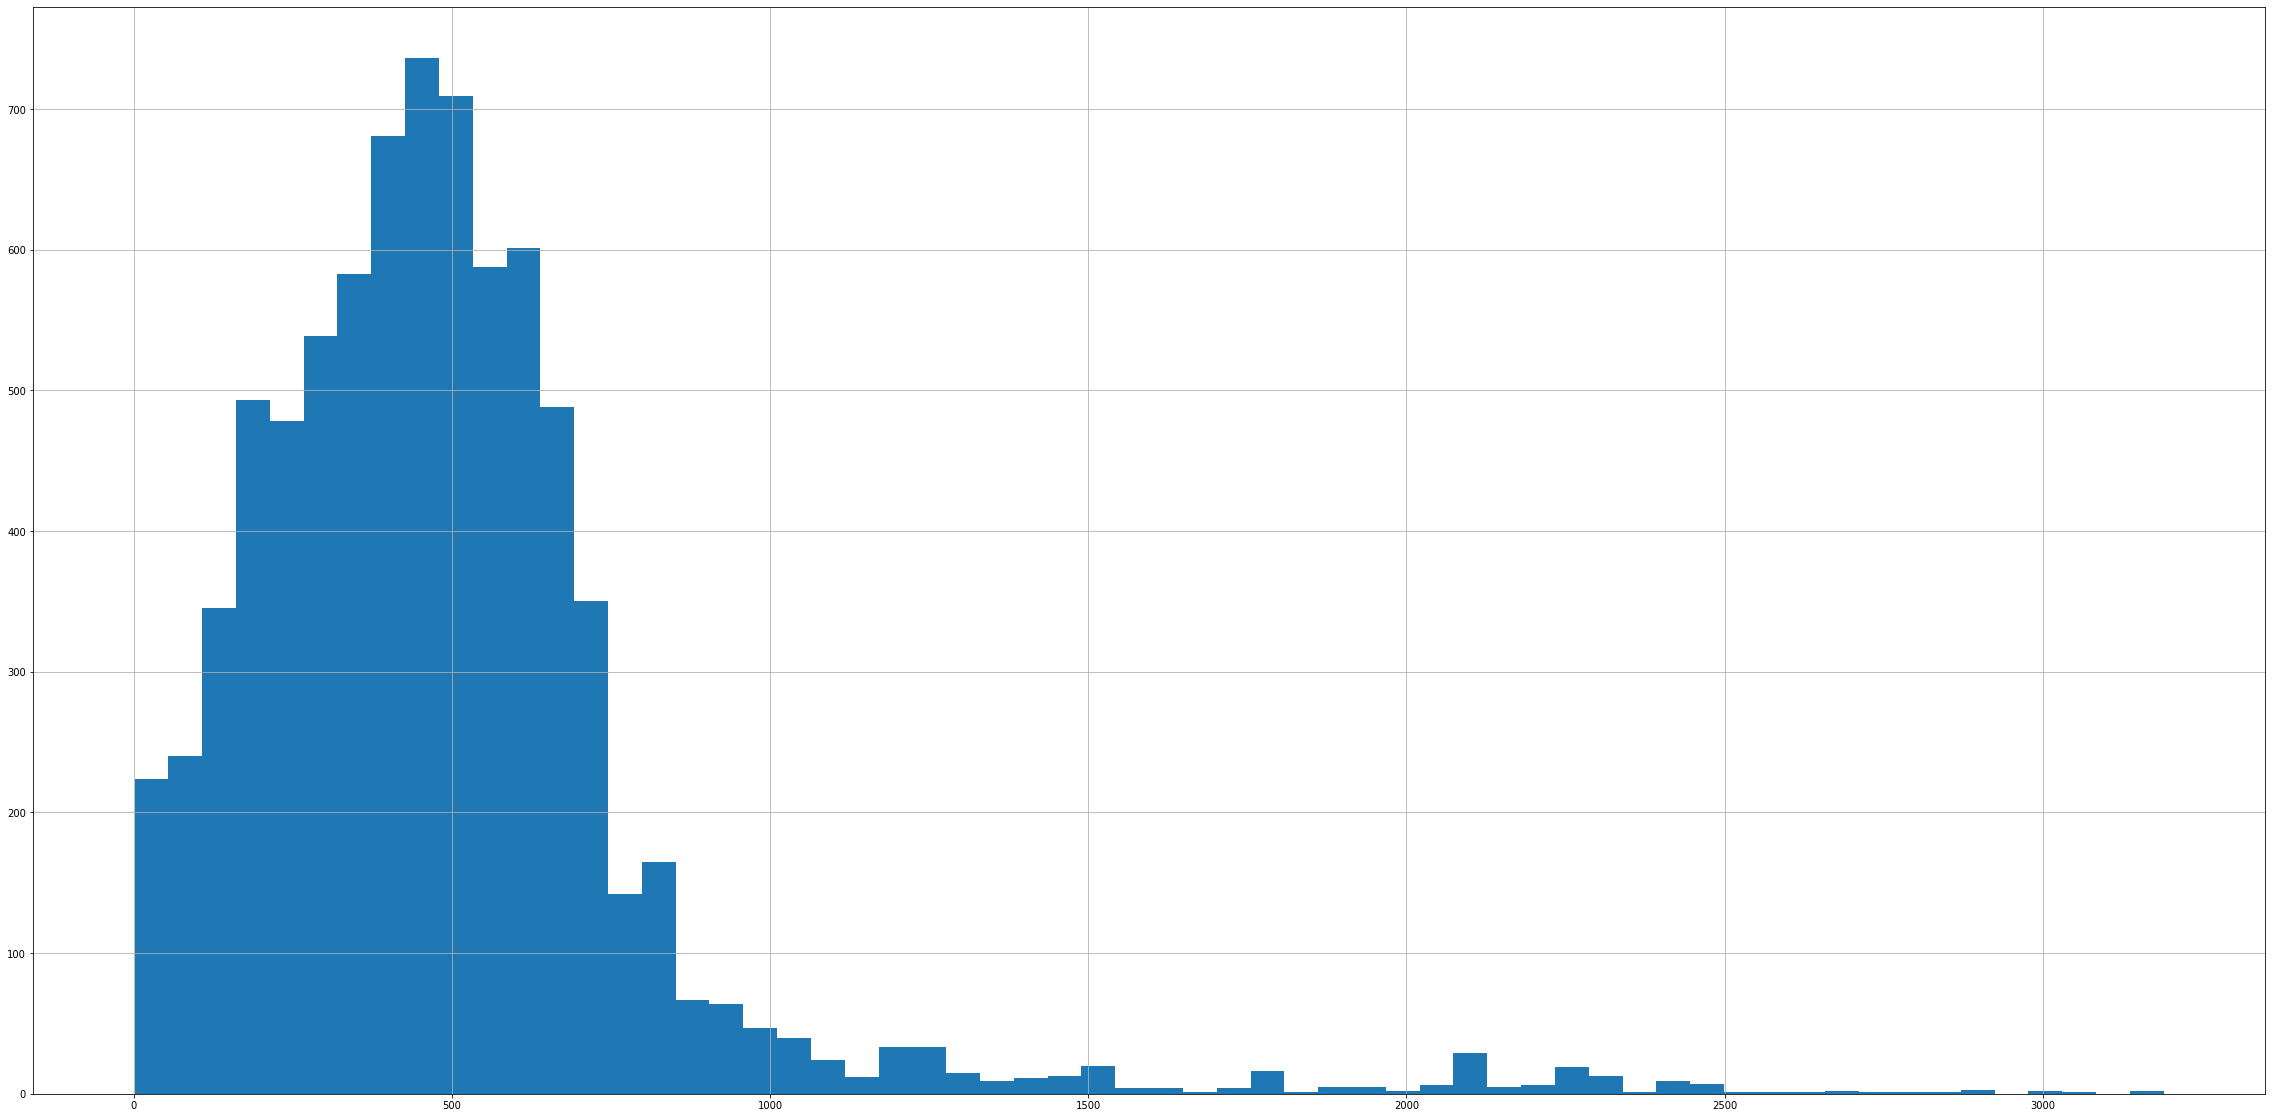

In [ ]:
data['parks_nearest'].hist(bins=60, figsize=(40, 20))
print(data['parks_nearest'].describe())

#удалим значения больше 3000
data = data.query('(parks_nearest <= 3000.0) or (parks_nearest.isna() == True)')

##### ponds_around3000 - число водоёмов в радиусе 3 км

Число водоёмов изменяется от 0 до 3, что вполне правдоподобно, ничего удалять не будем

count    23116.000000
mean         0.588683
std          0.882919
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


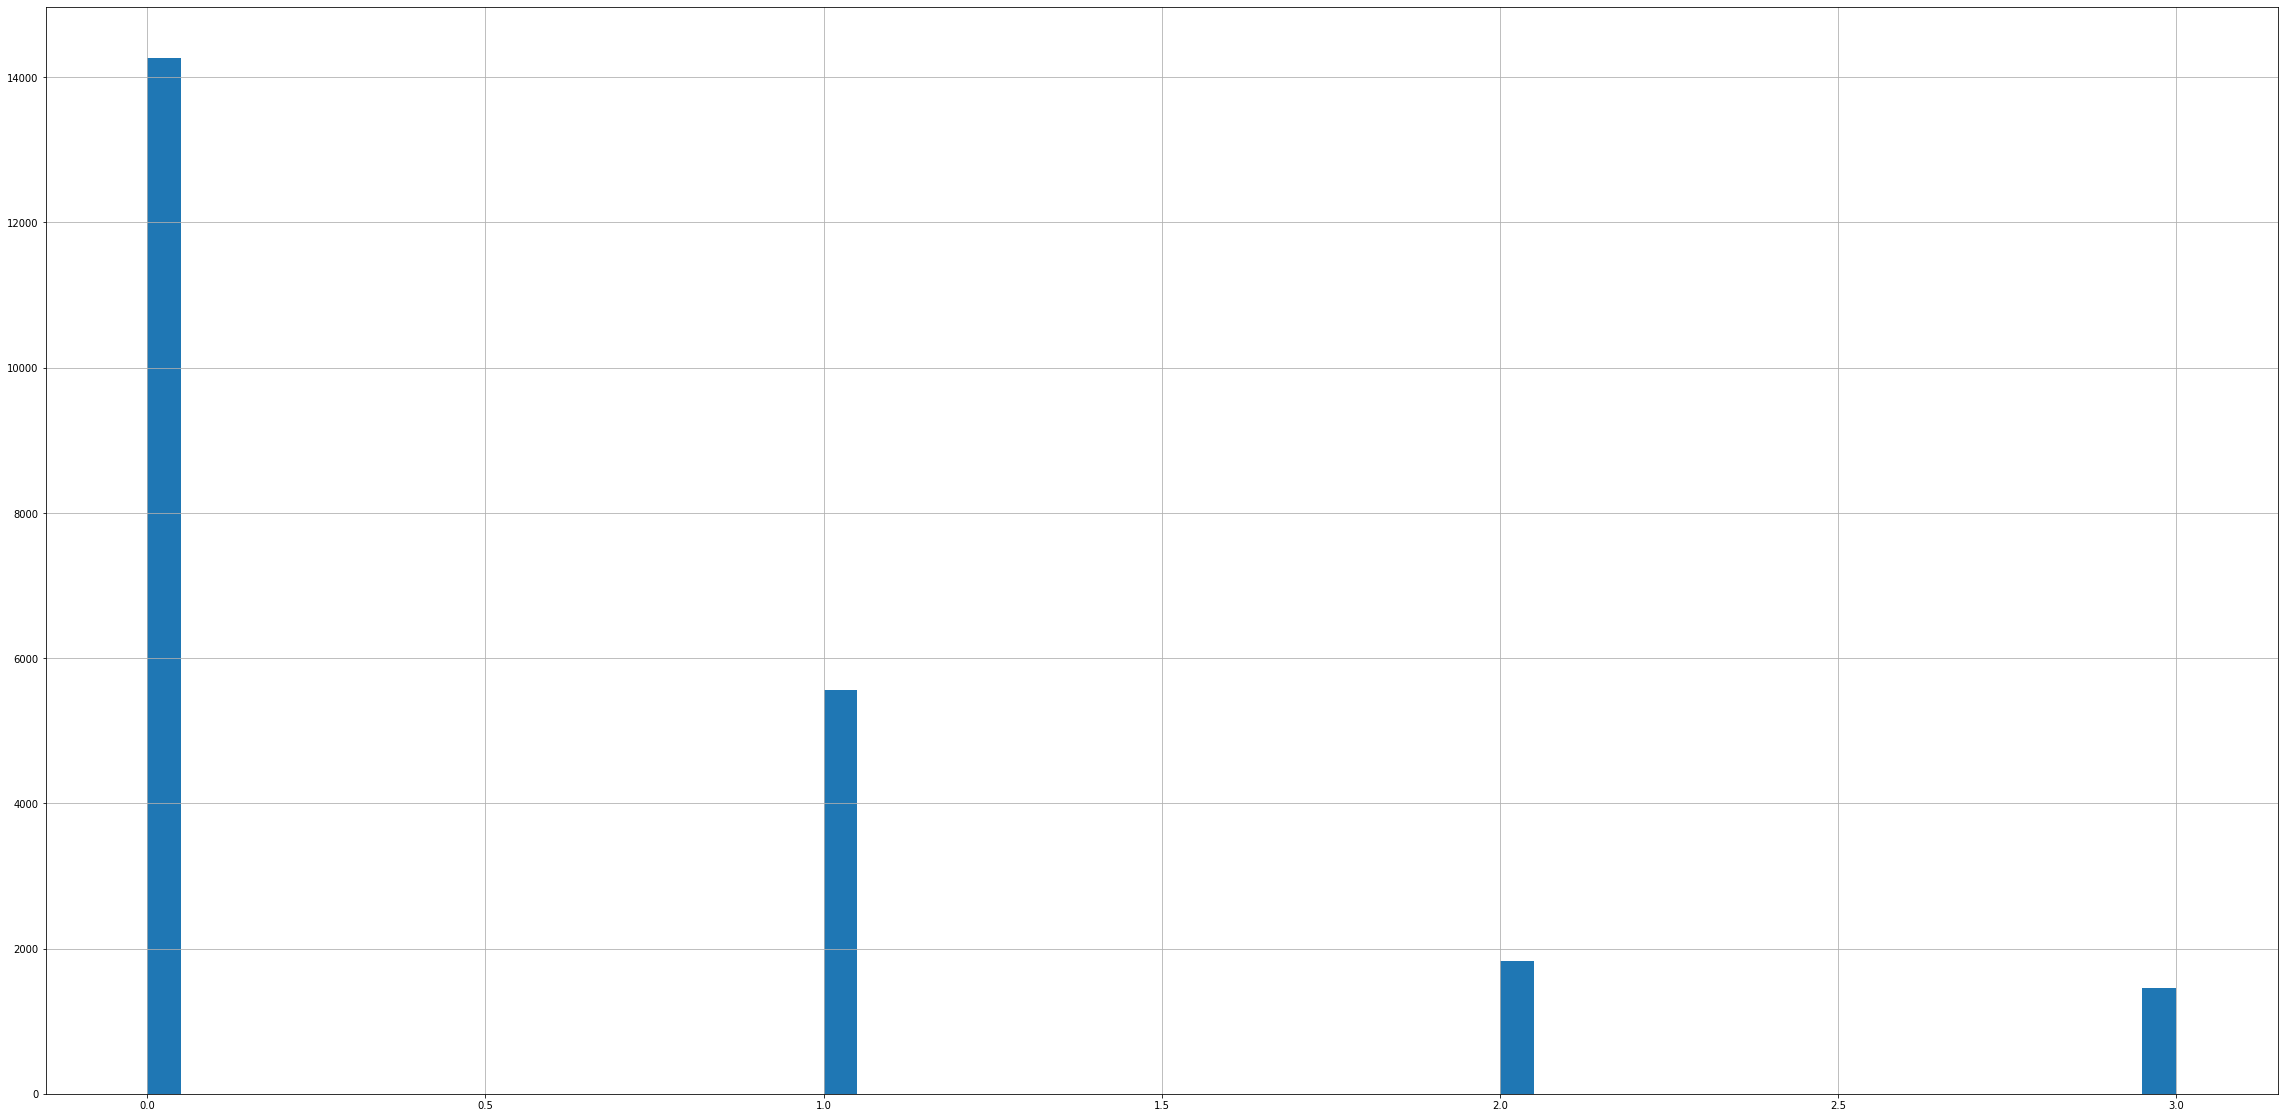

In [ ]:
data['ponds_around3000'].hist(bins=60, figsize=(40, 20))
print(data['ponds_around3000'].describe())

##### ponds_nearest - расстояние до ближайшего водоёма (м)

Тут нет каких-либо отклоняющихся значений.

count    8856.000000
mean      518.730239
std       277.692939
min        13.000000
25%       294.750000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


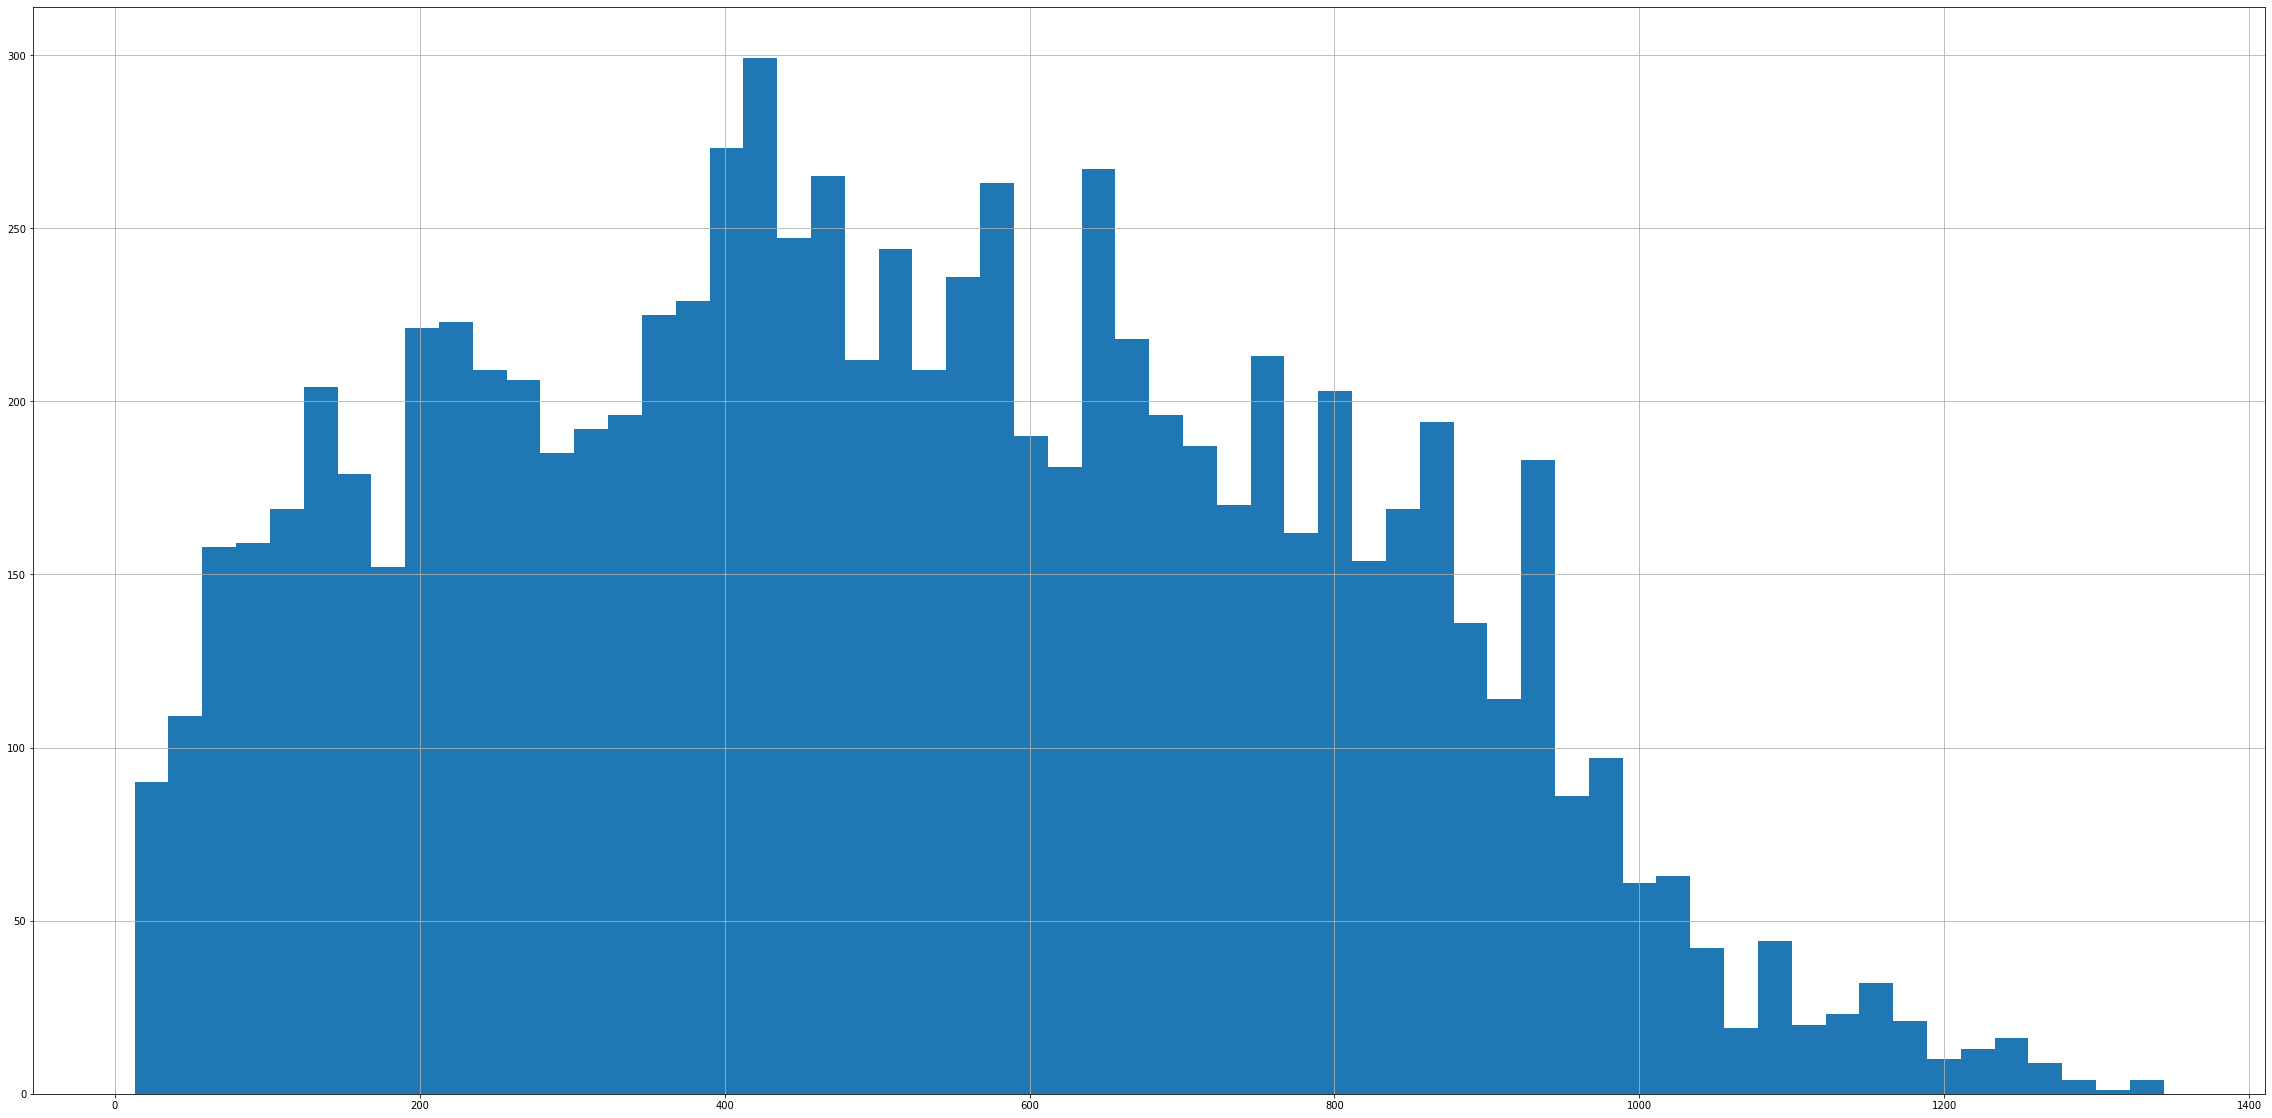

In [ ]:
data['ponds_nearest'].hist(bins=60, figsize=(40, 20))
print(data['ponds_nearest'].describe())

##### days_exposition - сколько дней было размещено объявление (от публикации до снятия)

Минимальное значение - 1 день, что вполне возможно. Максимальное - 1572 дня, это чутьбольше, чем 4 года. База содержит данные о продажах за 4,5 года, будем считать такое значение переменной допустимым.

count    19995.000000
mean       181.410253
std        220.135591
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


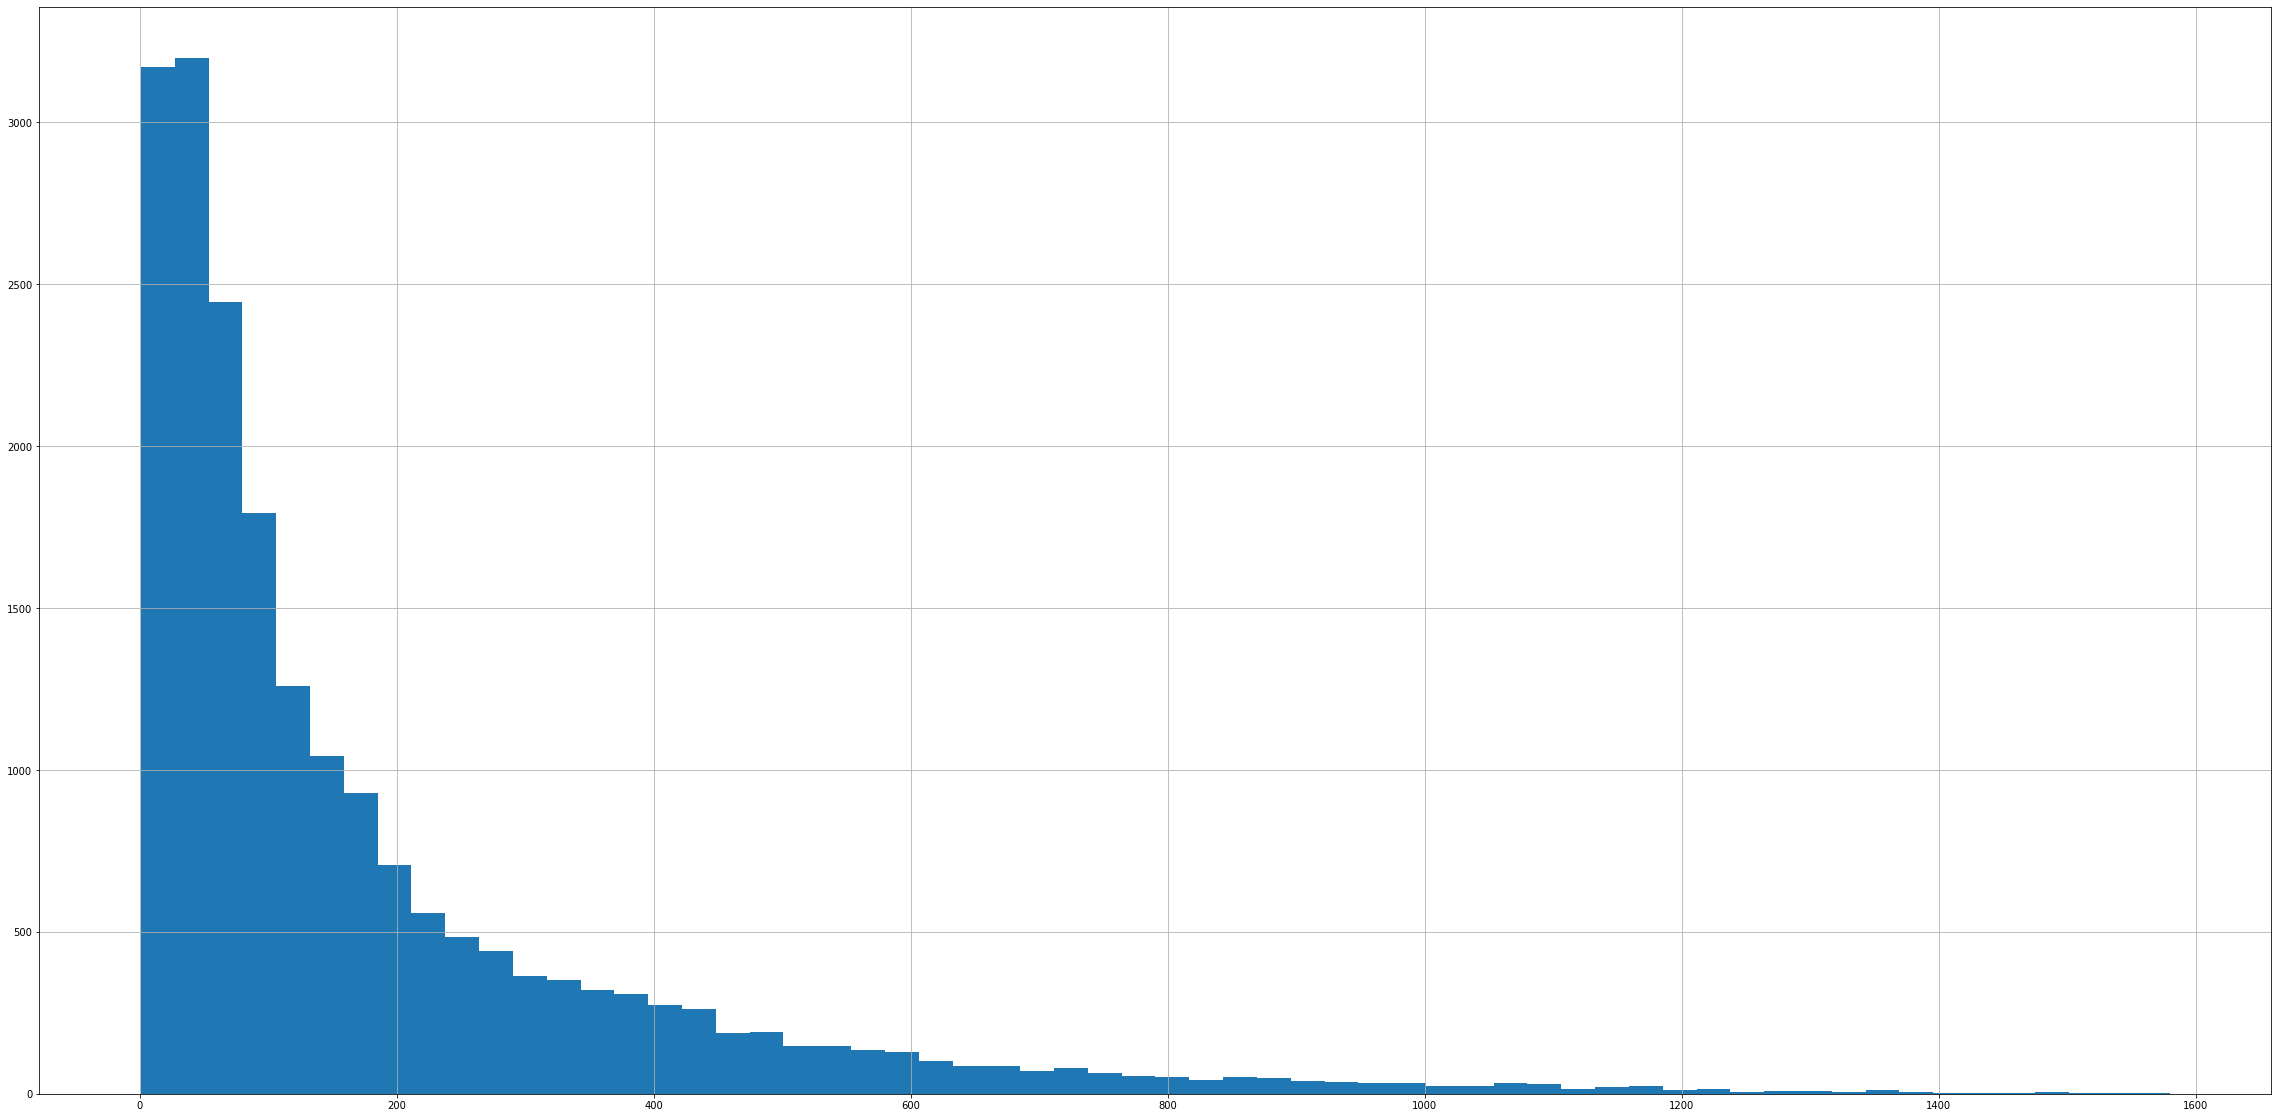

In [ ]:
data['days_exposition'].hist(bins=60, figsize=(40, 20))
print(data['days_exposition'].describe())

##### Проверка на явные дубликаты

Посмотрим, есть ли в базе данных полностью продублированные строчки.

In [ ]:
print(data.duplicated().sum())

0


Одинаковых строчек нет, можно продолжить анализ дальше.

#### Предобработка данных. Выводы

В этом разделе данные были подготовлены к анализу. Были обработаны значения в переменной названия населенного пункта - найдены повторяющиеся и записанные по-разному названия, приведены к одному виду.
Были обнаружены пропуски в 14 переменных. В 9 из них было решено пропуски заполнить. Где-то это удалось сделать полностью, где-то - частично.
В 4 переменных был изменен тип данных на более подходящий.
Все переменные были рассмотрены на предмет редких и выбивающихся значений, по возможности, аномалии удалены.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [ ]:
data['price_square_meter'] = data['last_price'] / data['total_area']


#### День недели публикации объявления

0 — понедельник,
1 — вторник,
2 — среда,
3 — четверг,
4 — пятница,
5 — суббота,
6 — воскресенье

In [ ]:
data['publication_day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

#### Месяц публикации объявления

1 - январь,
2 - февраль,
3 - март,
4 - апрель,
5 - май,
6 - июнь,
7 - июль,
8 - август,
9 - сентябрь,
10 - октябрь,
11 - ноябрь,
12 - декабрь

In [ ]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Год публикации объявления

In [ ]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Тип этажа квартиры

Добавим в новый столбец следующие данные об этаже квартиры:
"первый" - если квартира располагается на первом этаже дома
"последний" - если квартира располагается на последнем этаже дома
"другой" - если квартира располагается на любом другом этаже дома, кроме первого и последнего

In [ ]:
def categorize_floors(row):
    floors_total = row['floors_total']
    floor = row['floor']

    if (floor == 1):
        return 'первый'
    if (floor == floors_total):
        return 'последний'

    return 'другой'

data['floor_category'] = data.apply(categorize_floors, axis=1)
data.groupby('floor_category')['floor'].count()

floor_category
другой       17046
первый        2837
последний     3233
Name: floor, dtype: int64

#### Расстояние до центра города в километрах

Переведем расстояние до центра города из метров в километры и округлим до целых значений. Сохраним результат в новую переменную.

In [ ]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)


В базу добавлены дополнительные расчетные столбцы, что упростит и расширит анализ в дальнейшем.

### Проведите исследовательский анализ данных

#### Анализ параметров объектов

##### Общая площадь

Основная масса квартир - это квартиры с площадью до 93м2 (средняя площадь 60м2 плюс стандартное отклонение 32м2). Редко встречаются площади до 200м2, все, что больше - скорее всего, единичные элитные квартиры.

Средняя площадь продаваемой квартиры равна 60м2. Можно увидеть три "пика" (см. подробную гистограмму ниже) - популярных значений площади квартиры. Это квартиры меньше 20м2 - скорее всего, студии. Около 30м2 - наверное, однокомнатные квартиры. И не такой яркий пик - площадь в 45м2 - наверное, это тоже популярное значение среди однокомнатных квартир.

count    23116.000000
mean        60.351855
std         32.741998
min         13.000000
25%         40.500000
50%         52.500000
75%         70.000000
max        483.900000
Name: total_area, dtype: float64


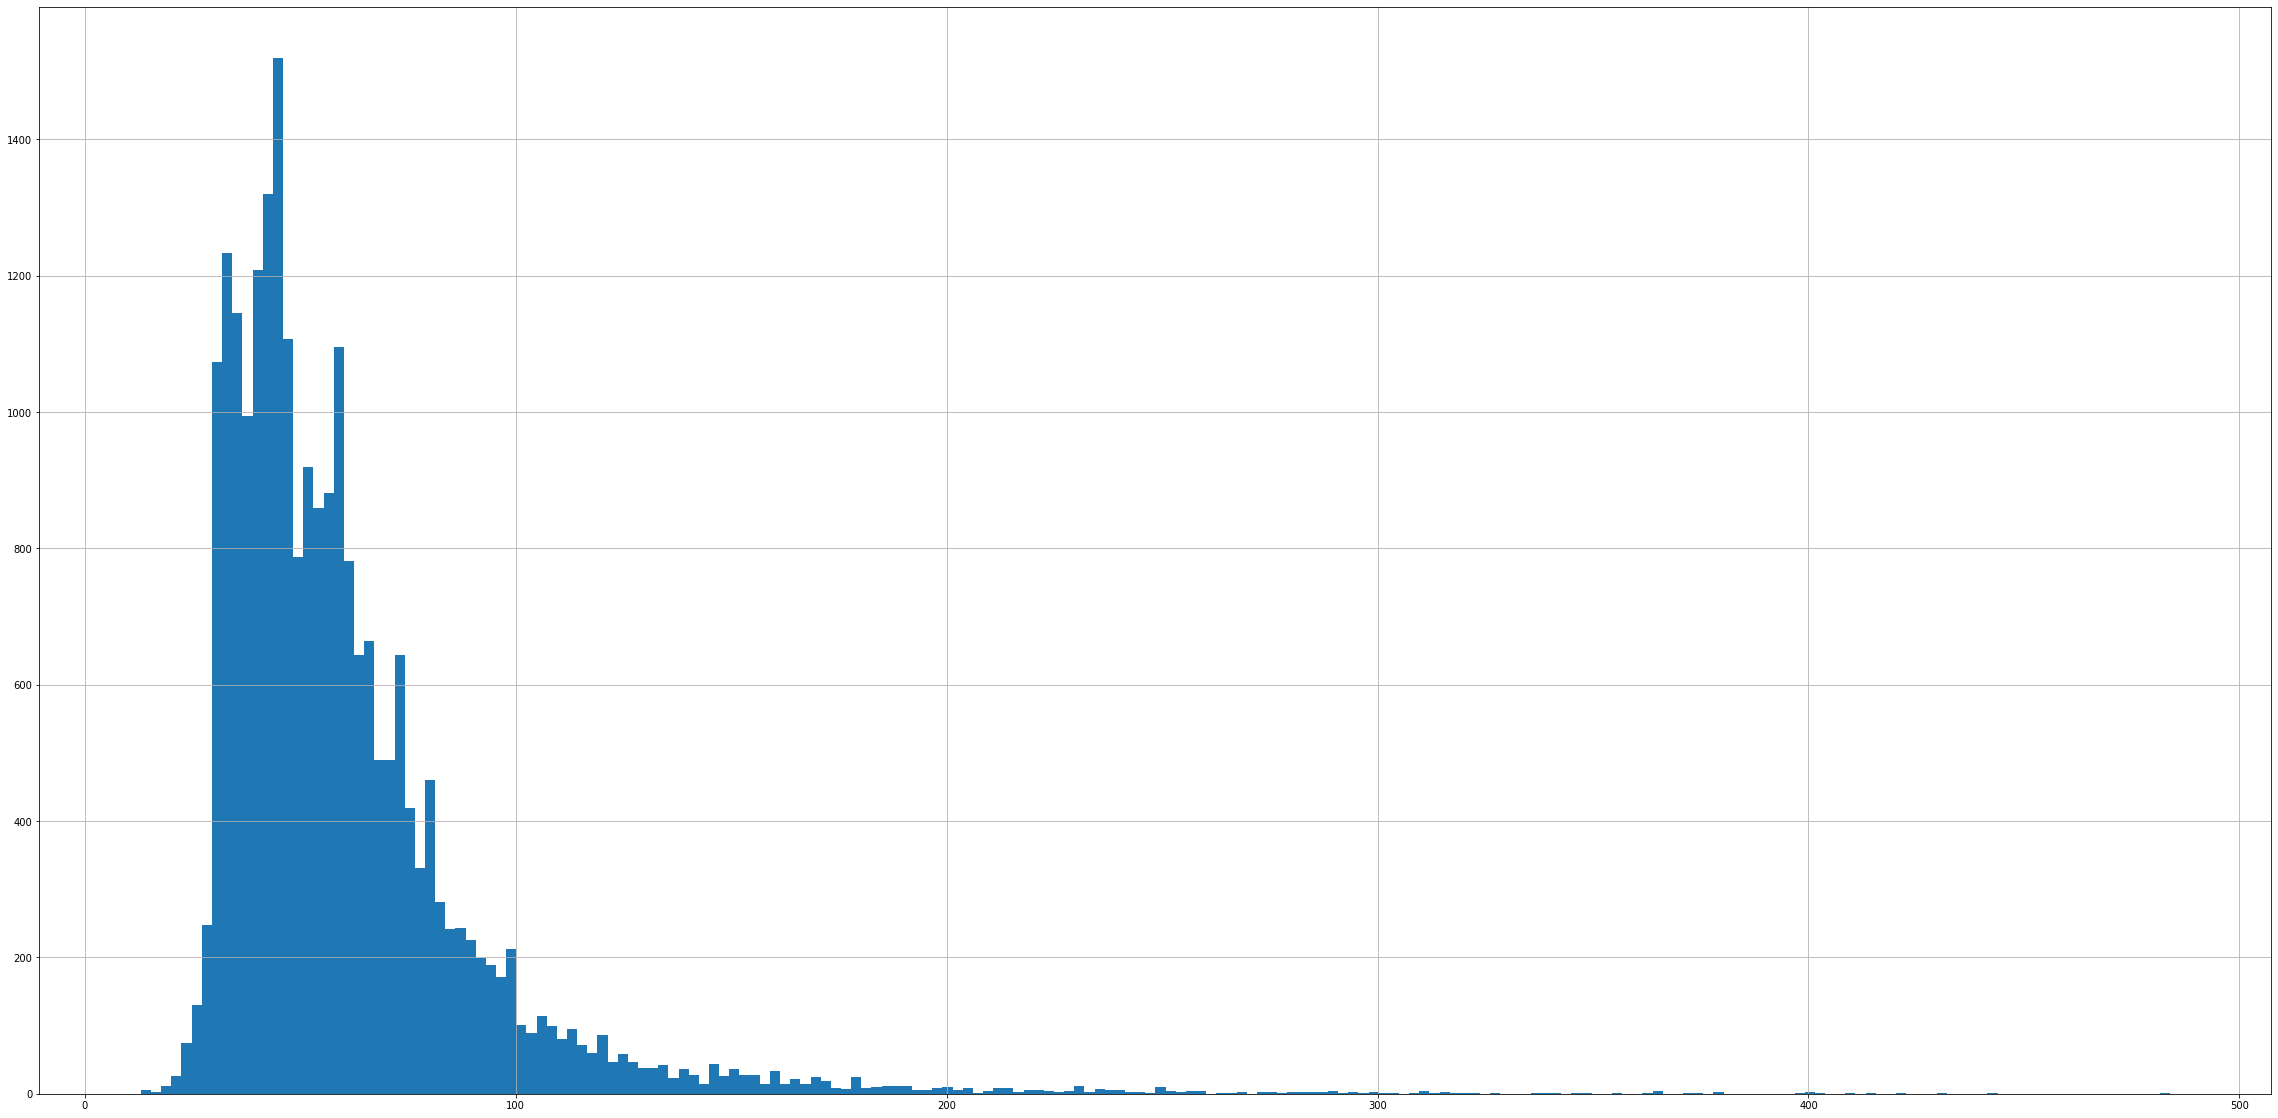

In [ ]:
data['total_area'].hist(bins=200, figsize=(40, 20))
print(data['total_area'].describe())

<AxesSubplot:>

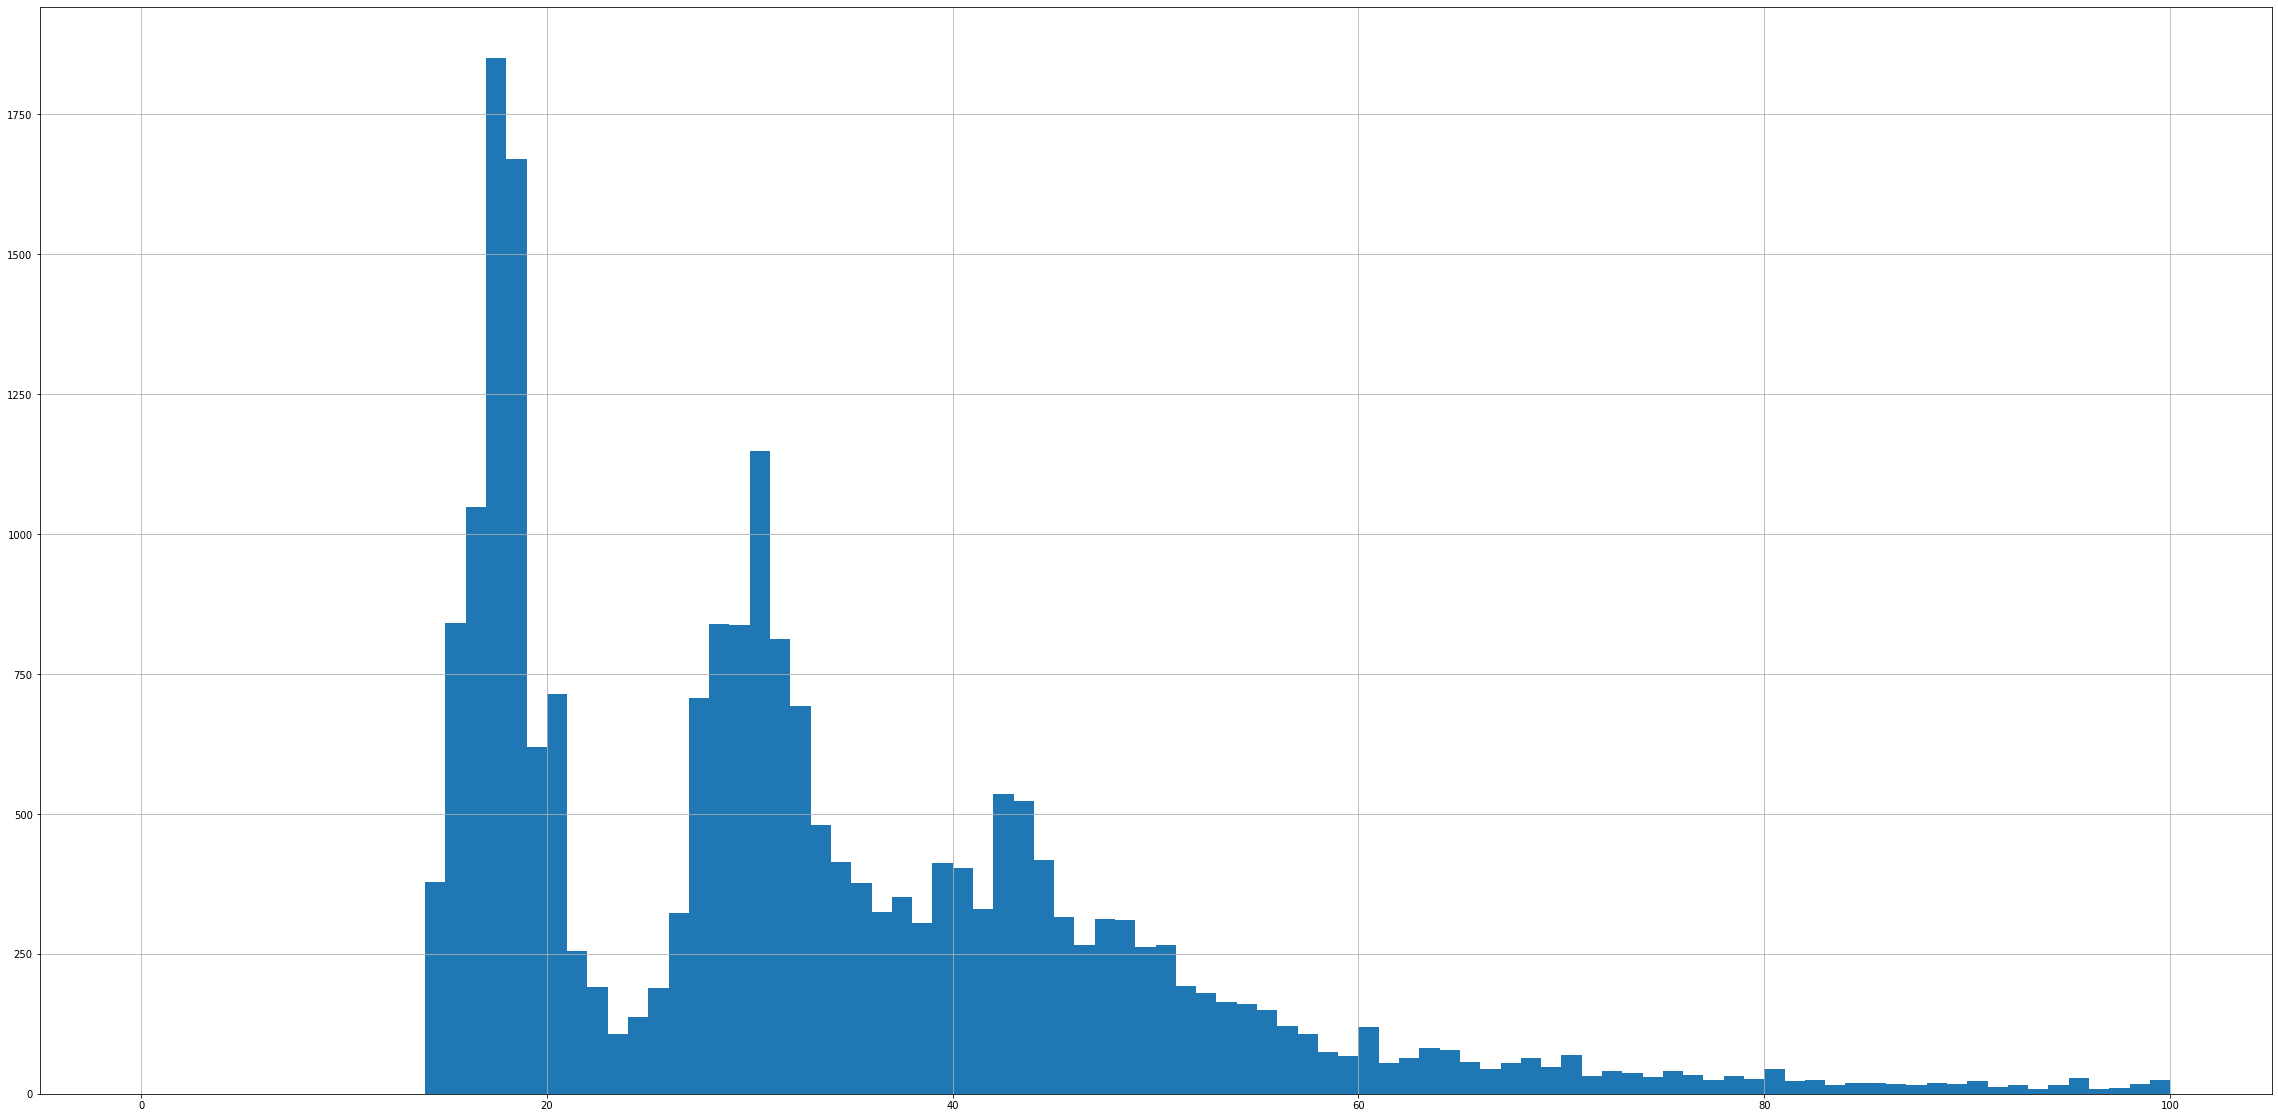

In [ ]:
#более подробная гистограмма
data['living_area'].hist(bins=100, range=(0, 100), figsize=(40, 20))

##### Жилая площадь

Основная масса квартир - это квартиры с жилой площадью до 54м2 (средняя жилая площадь 34м2 плюс стандартное отклонение 20м2). Редко встречаются площади до 110-115м2, все, что больше - скорее всего, единичные элитные квартиры.
Заметно два пика - наиболее популярные площади (см.вторую более подробную гистограмму). Первый - квартиры с жилой площадью меньше 25м2, скорее всего, это однокомнатные квартиры или студии. И квартиры с жилой площадью 30м2 (это среднее значение), скорее всего, это квартиры с двумя и более комнатами.

count    22941.000000
mean        34.507196
std         20.504900
min         14.000000
25%         18.800000
50%         30.200000
75%         42.600000
max        312.500000
Name: living_area, dtype: float64


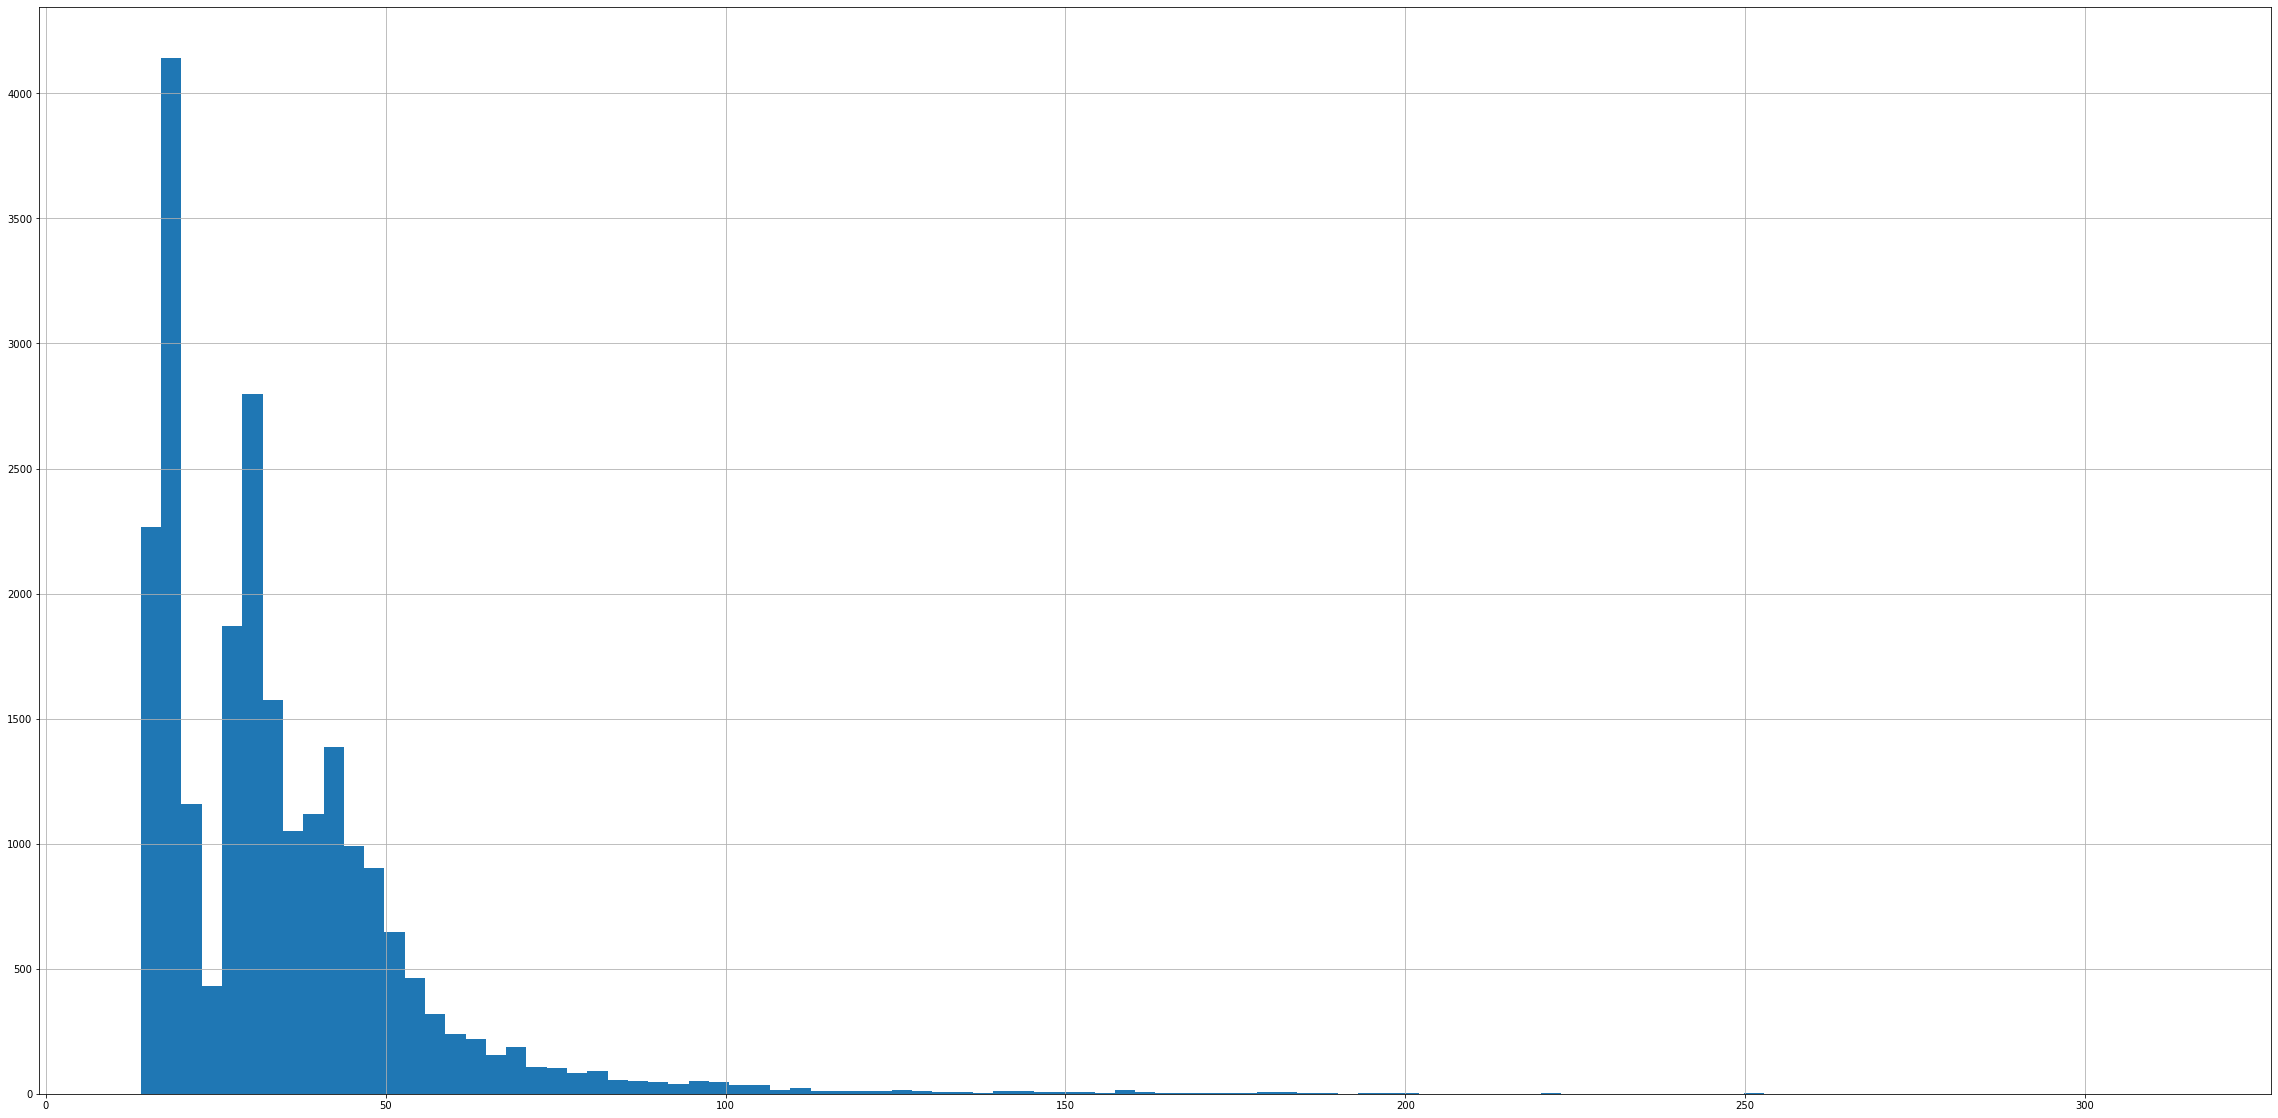

In [ ]:
data['living_area'].hist(bins=100, figsize=(40, 20))
print(data['living_area'].describe())

<AxesSubplot:>

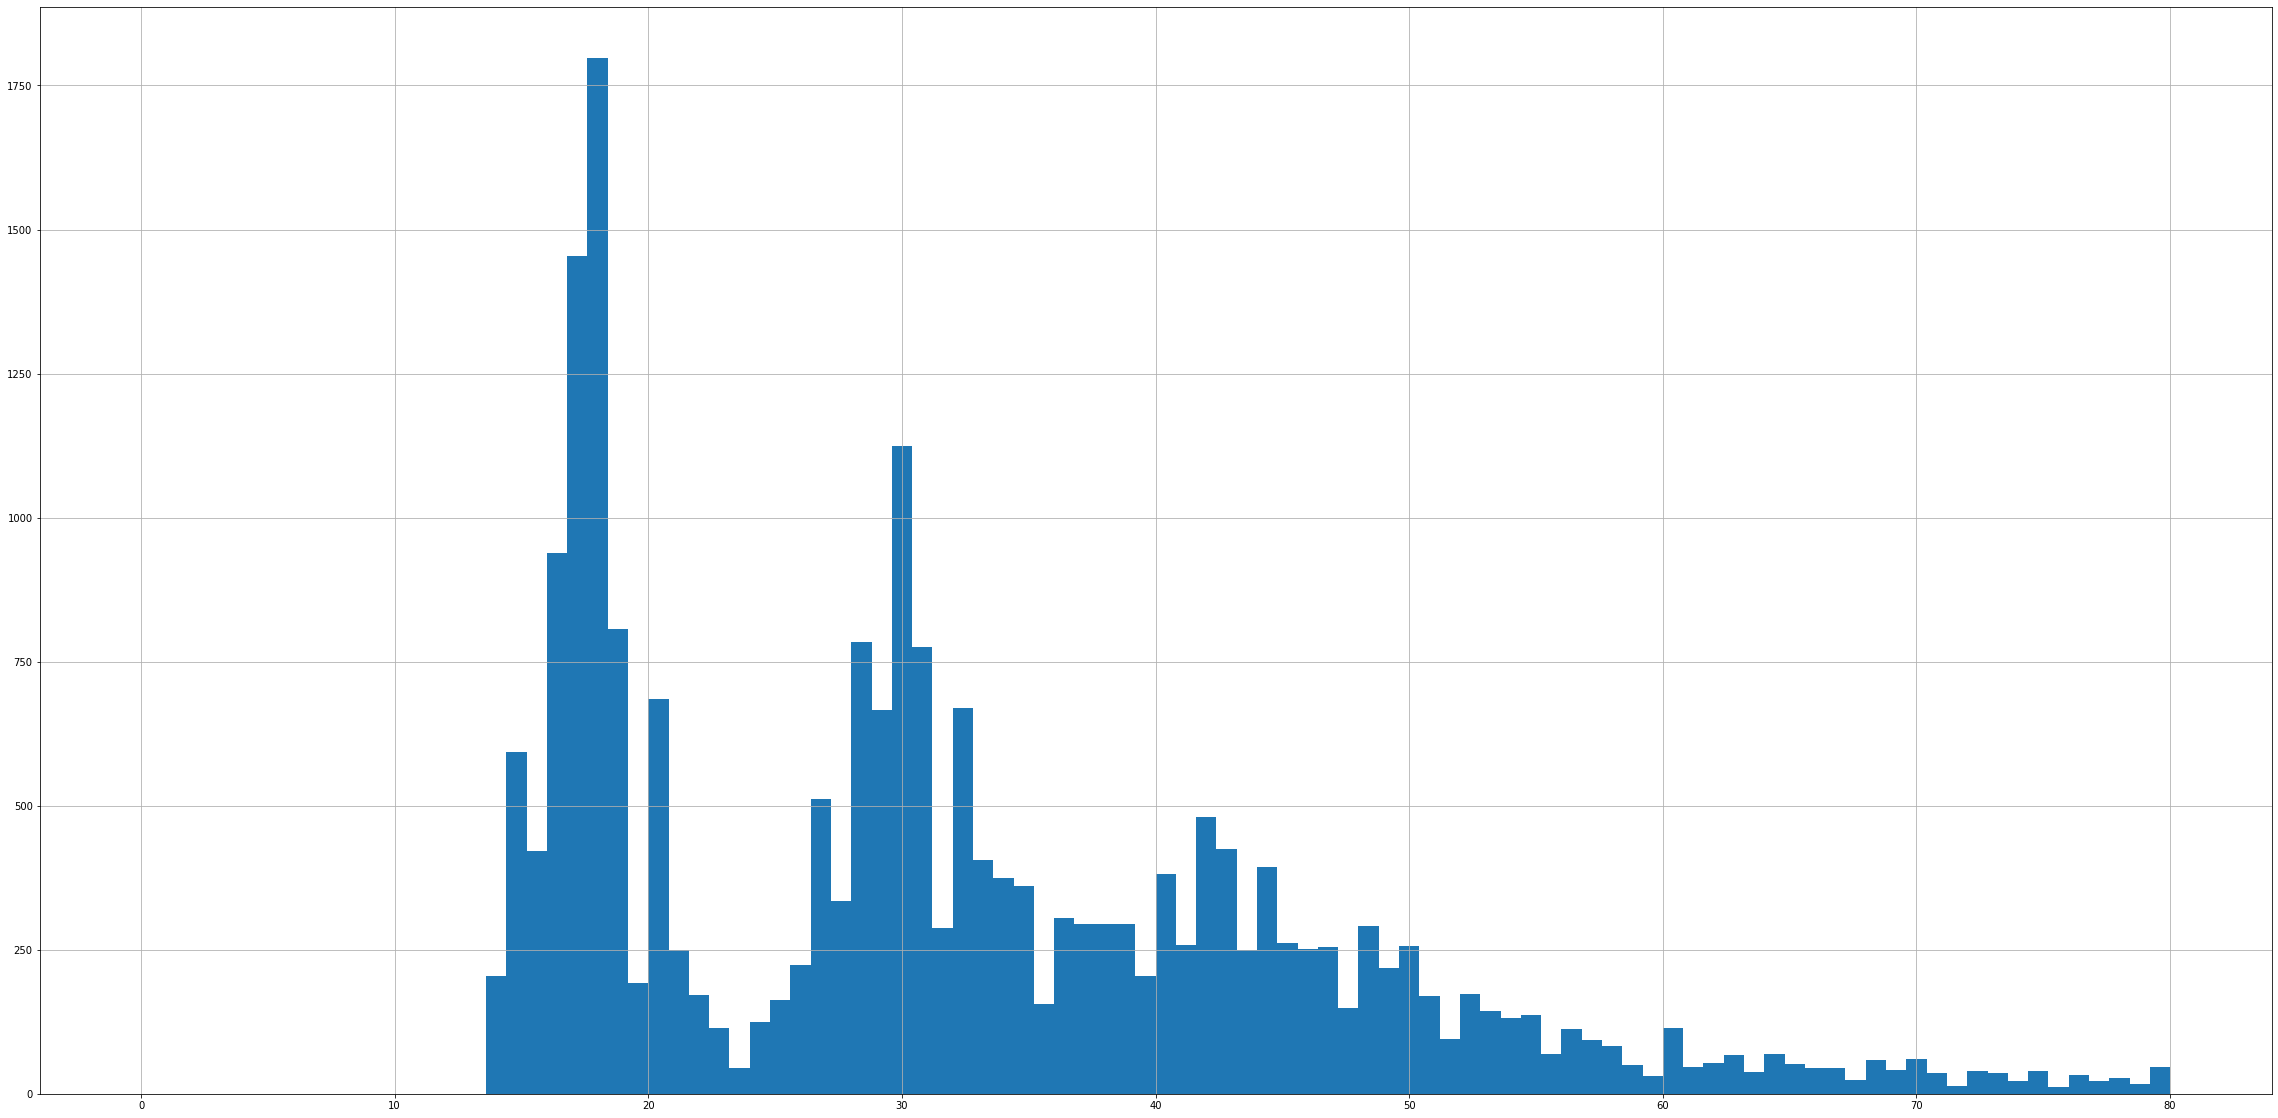

In [ ]:
#более подробная гистограмма
data['living_area'].hist(bins=100, range=(0, 80), figsize=(40, 20))

##### Площадь кухни

Основная масса кухонь - это кухни площадью до 20м2. От 20м2 до 40м2 встречаются заметно реже, скорее всего это - объединенные кухни с гостиными или большие кухни в квартирах большой площади.

По площади самых распространенных по площади кухни квартир распределение довольно ровное - самые популярные значения - около 10м2 (среднее). Больших и меньших площадей меньше, чем в среднем.

count    22818.000000
mean        10.449668
std          5.551135
min          5.000000
25%          7.000000
50%          9.200000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64


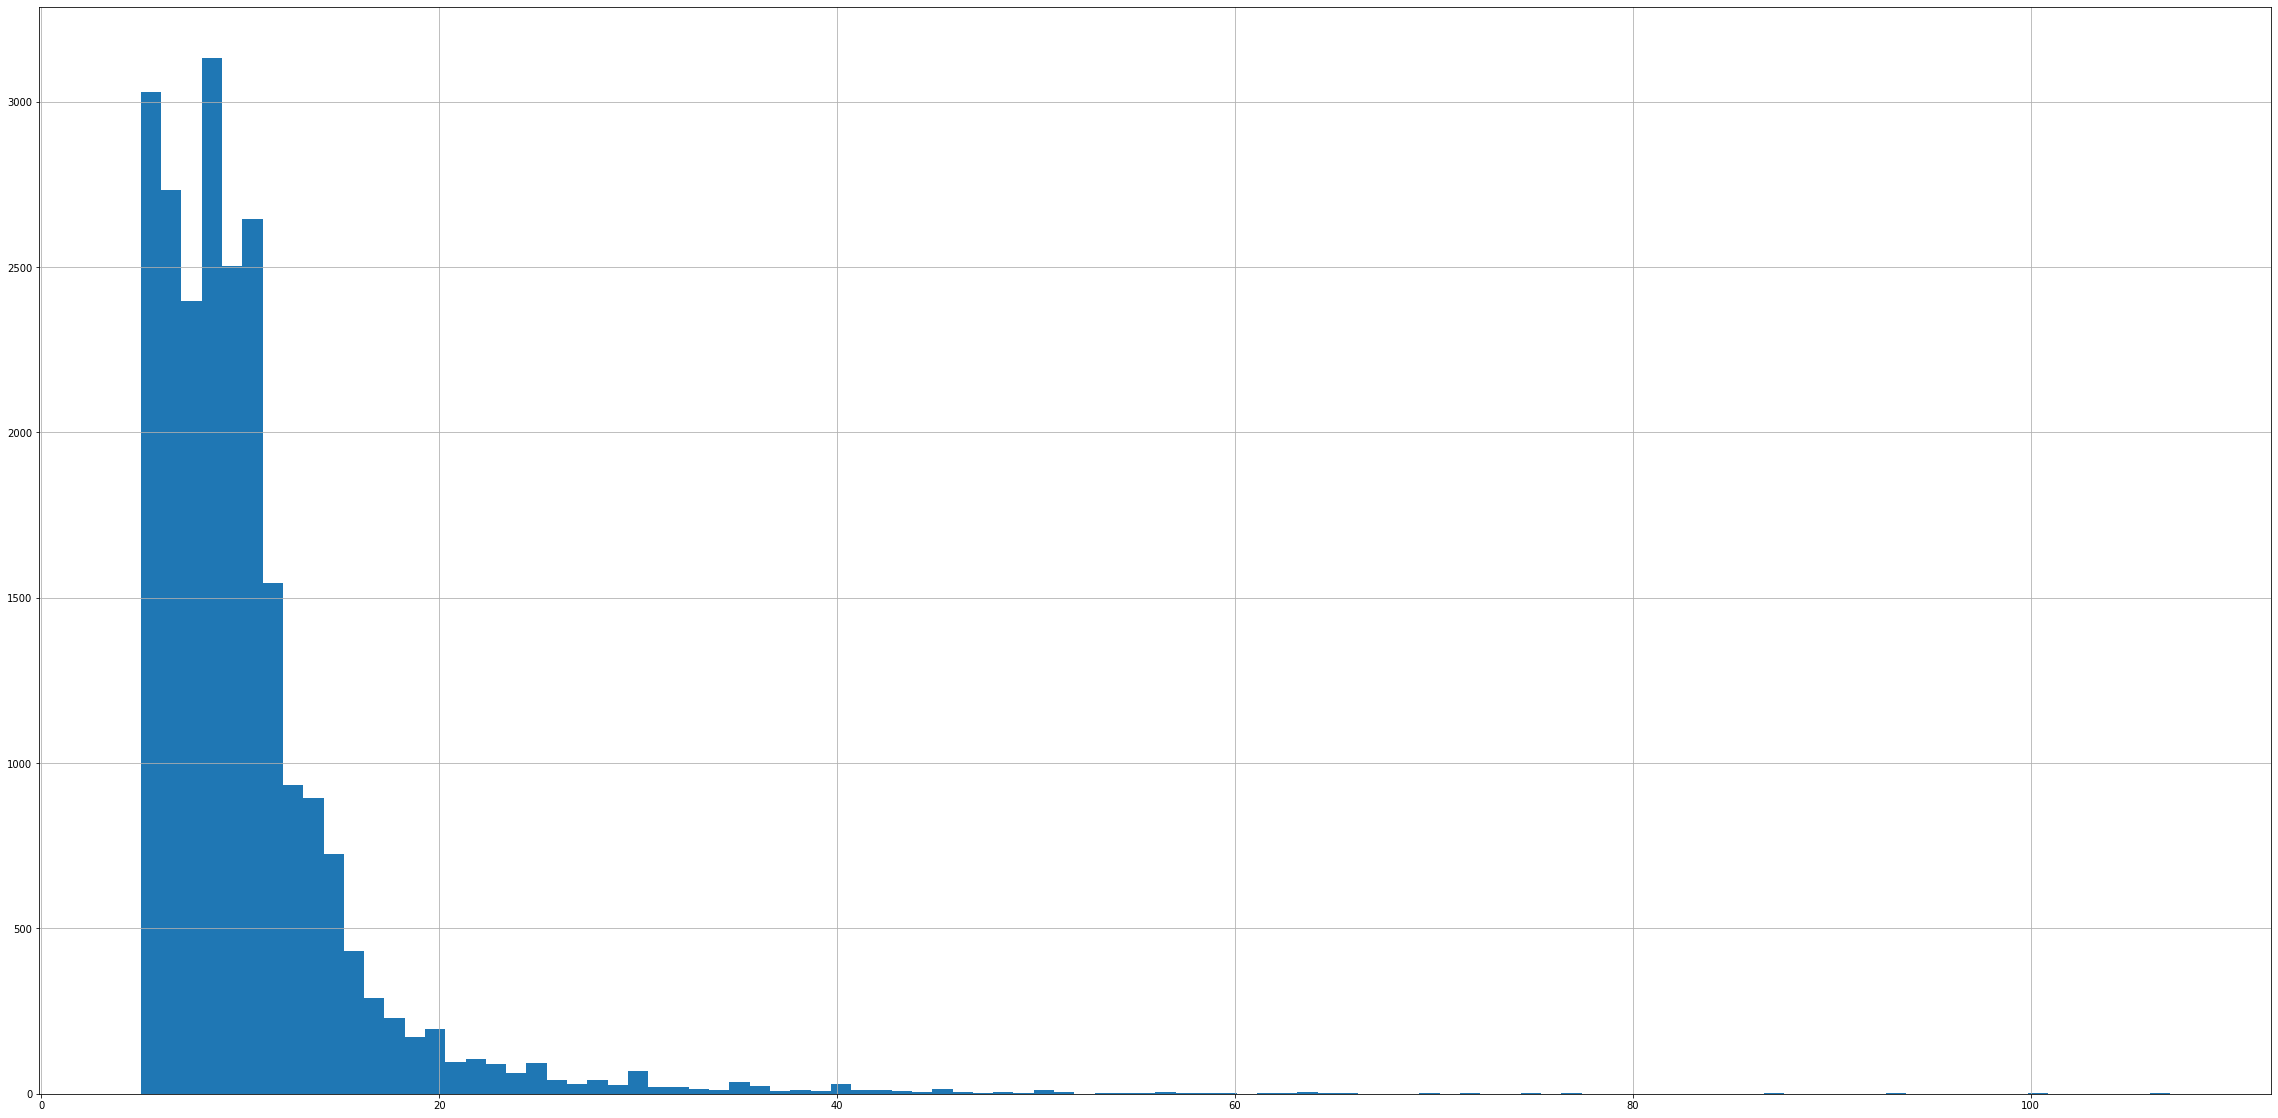

In [ ]:
data['kitchen_area'].hist(bins=100, figsize=(40, 20))
print(data['kitchen_area'].describe())

<AxesSubplot:>

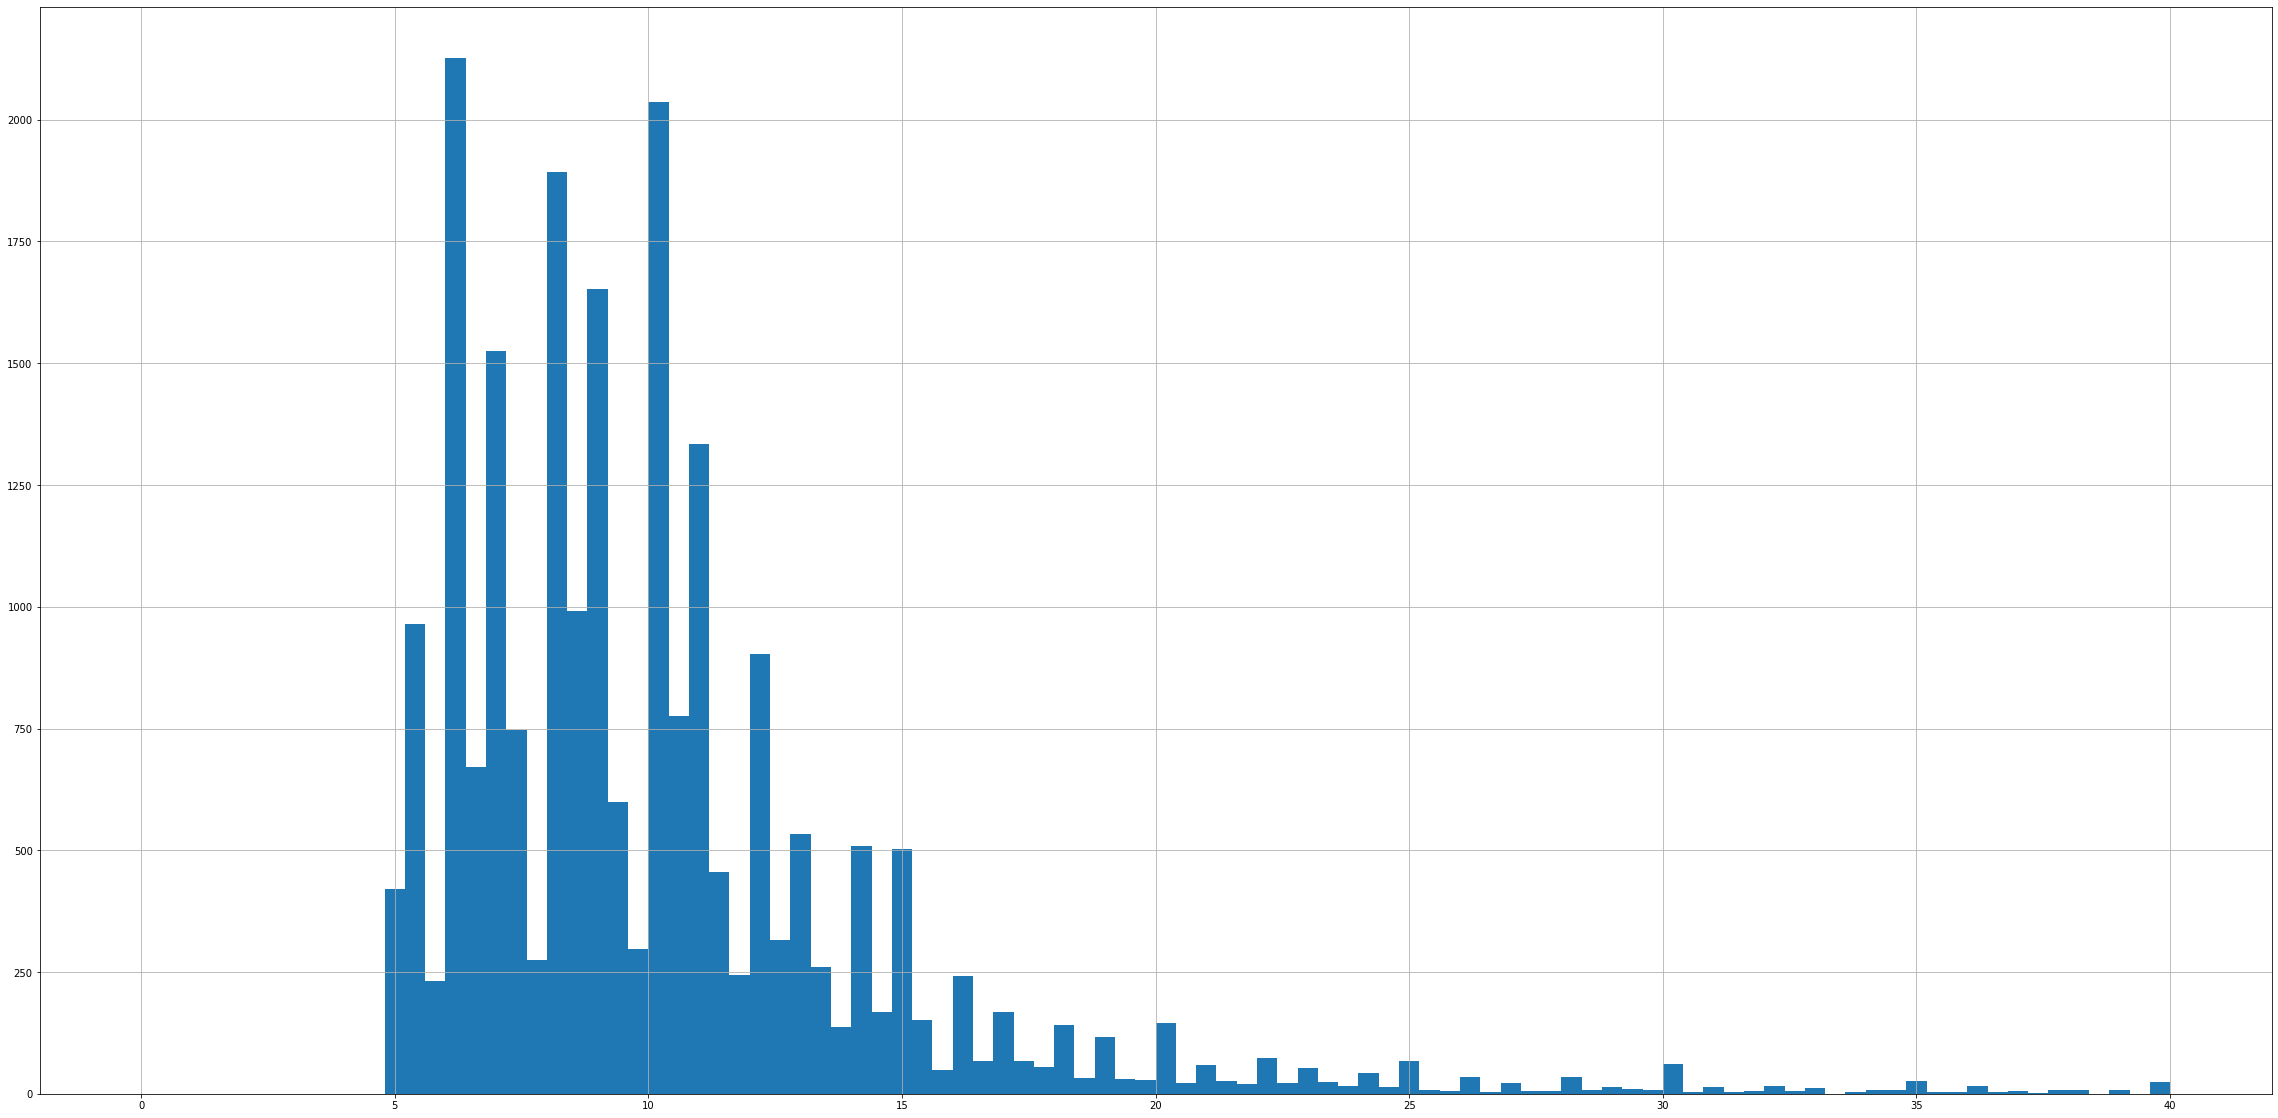

In [ ]:
#более подробная гистограмма
data['kitchen_area'].hist(bins=100, range=(0, 40), figsize=(40, 20))

##### Цена объекта

Можно сказать, что квартир, дороже 40-50 млн.руб. продано очень мало. На этапе обработки данных было видно, что это квартиры в центре Санкт-Петербурга, чем объясняется высокая цена.

Средняя цена проданной квартиры - 6 427 745 руб. На подробной гистограмме (ниже) видно, что более популярное значение - медиана - ниже - это 4 680 000 руб. Такое значение более точное, так как не учитывает слишком большие цены на элетные квартиры, которых не очень много и которые могут исказить результат.

count    2.311600e+04
mean     6.427745e+06
std      8.293041e+06
min      4.300000e+05
25%      3.460000e+06
50%      4.680000e+06
75%      6.800000e+06
max      3.300000e+08
Name: last_price, dtype: float64


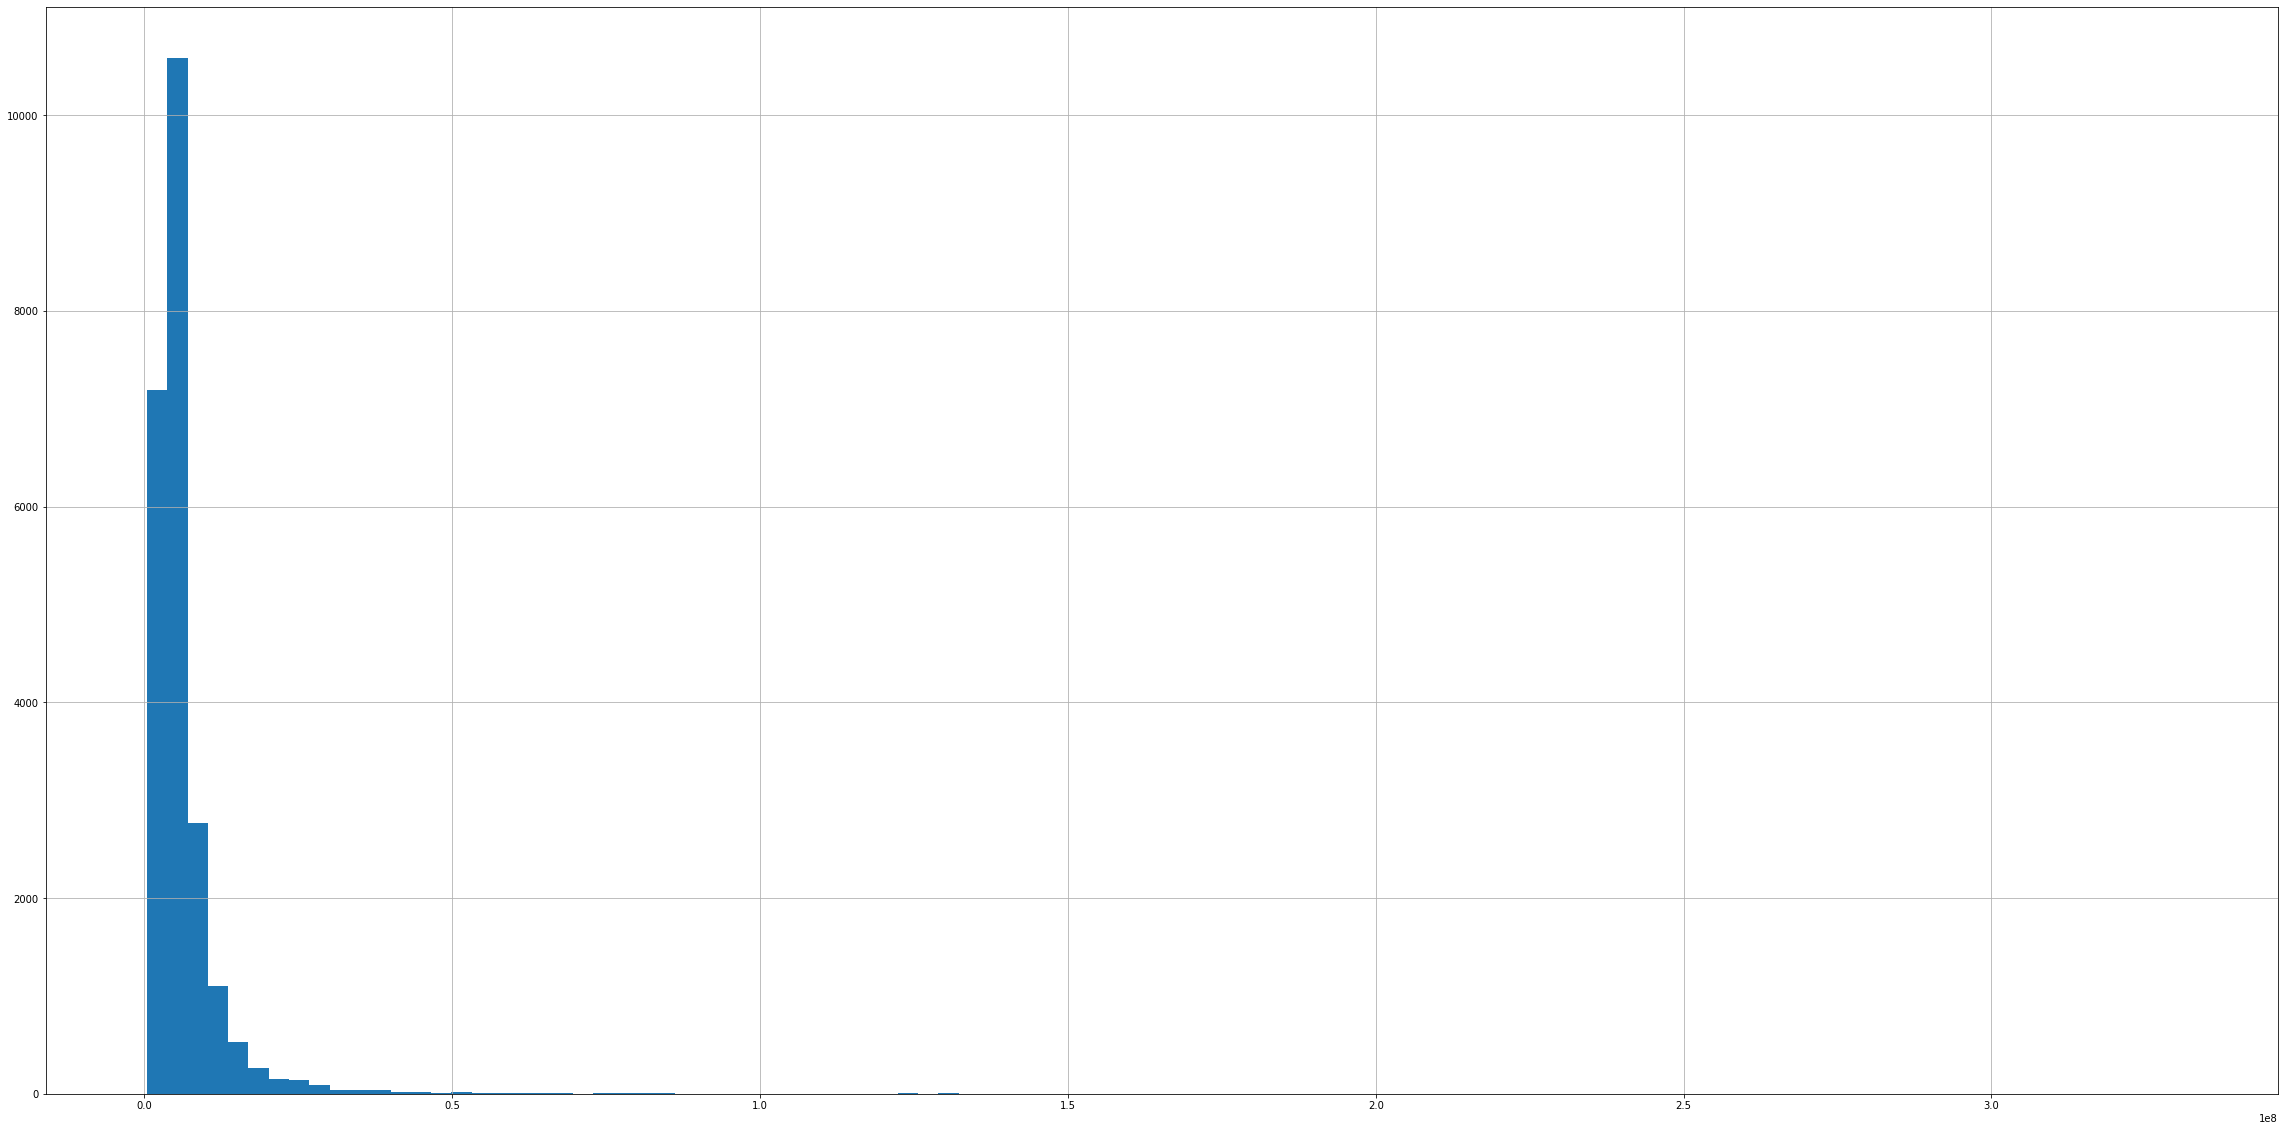

In [ ]:
data['last_price'].hist(bins=100, figsize=(40, 20))
print(data['last_price'].describe())

<AxesSubplot:>

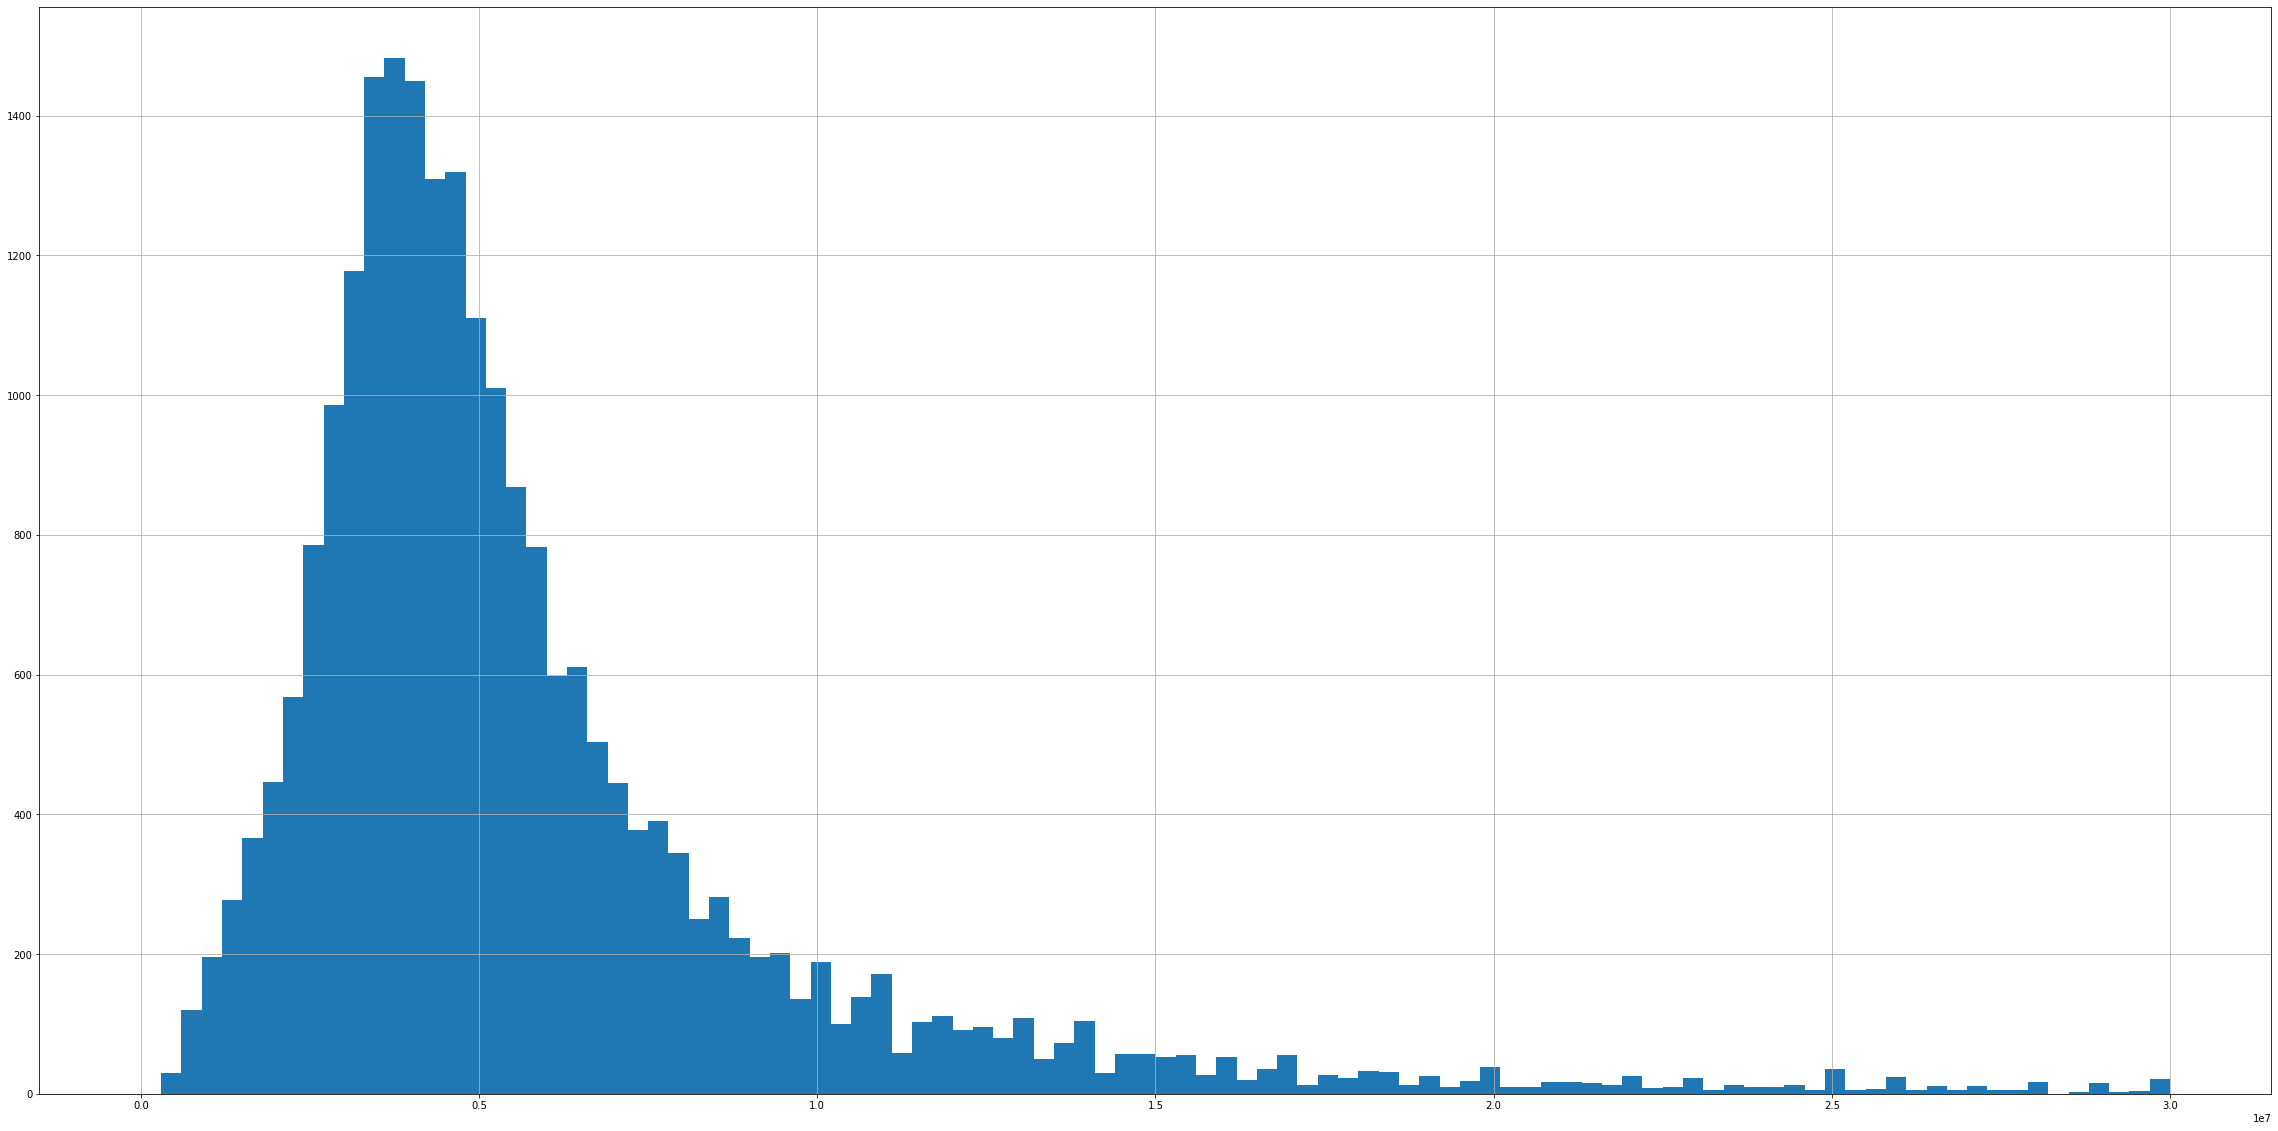

In [ ]:
#более подробная гистограмма
data['last_price'].hist(bins=100, range=(0, 30000000), figsize=(40, 20))

##### Количество комнат

Чаще всего продаются двухкомнатные квартиры. Почти также часто - однокомнатные. И чуть меньше - трехкомнатные. Квартир-судий и квартир с 4 и более комнатами намного меньше.

count    23116.000000
mean         2.084227
std          1.049397
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


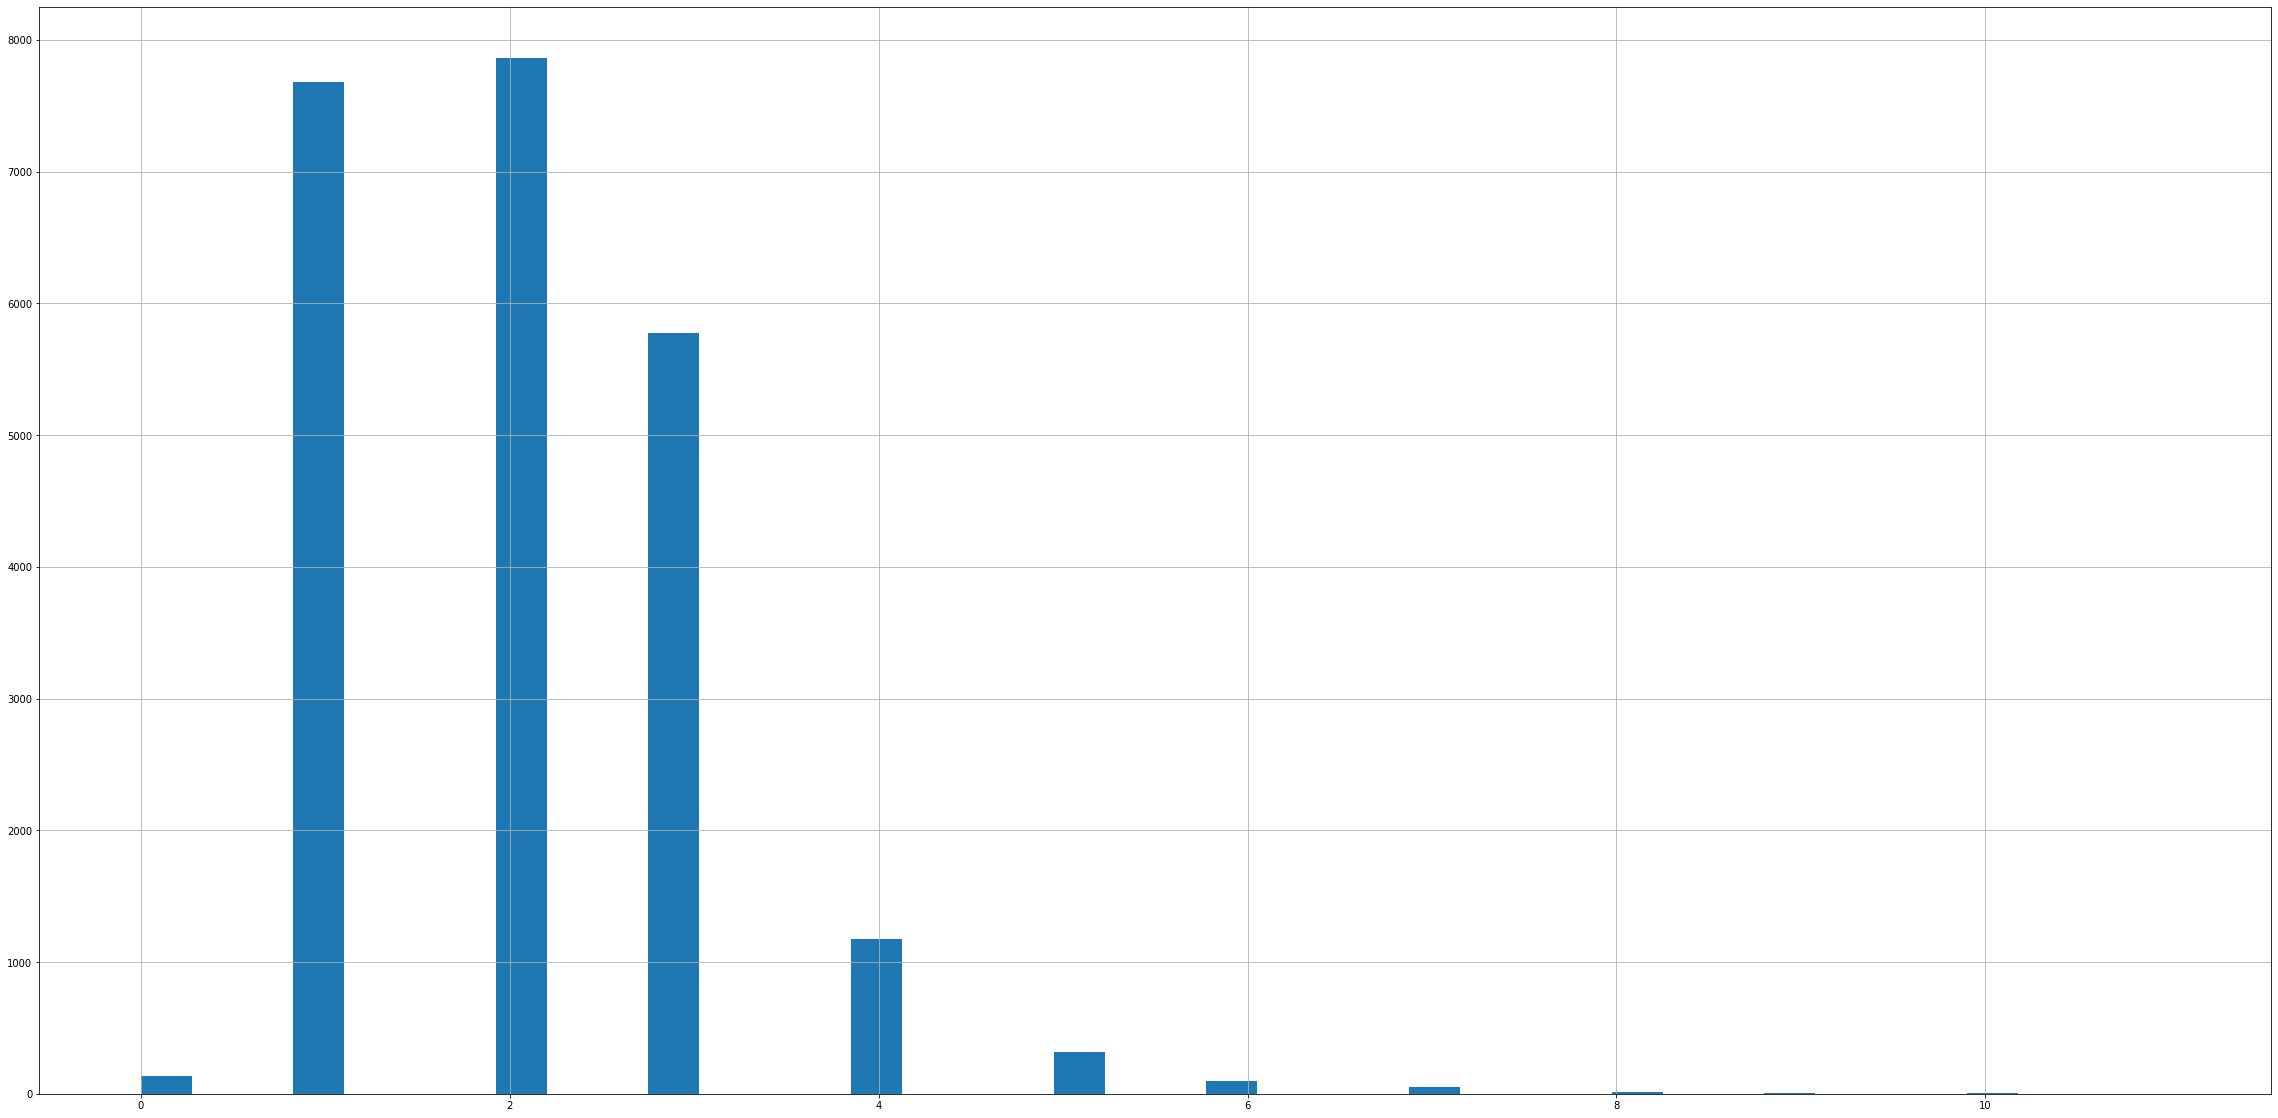

In [ ]:
data['rooms'].hist(bins=40, figsize=(40, 20))
print(data['rooms'].describe())

##### Высота потолков

Среднее значение высоты потолков в продаваемой квартире - 2,7м. На графике мы также можем увидеть другие популярные значения - 2,5м и 3м.

count    22700.000000
mean         2.705009
std          0.224314
min          2.250000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64


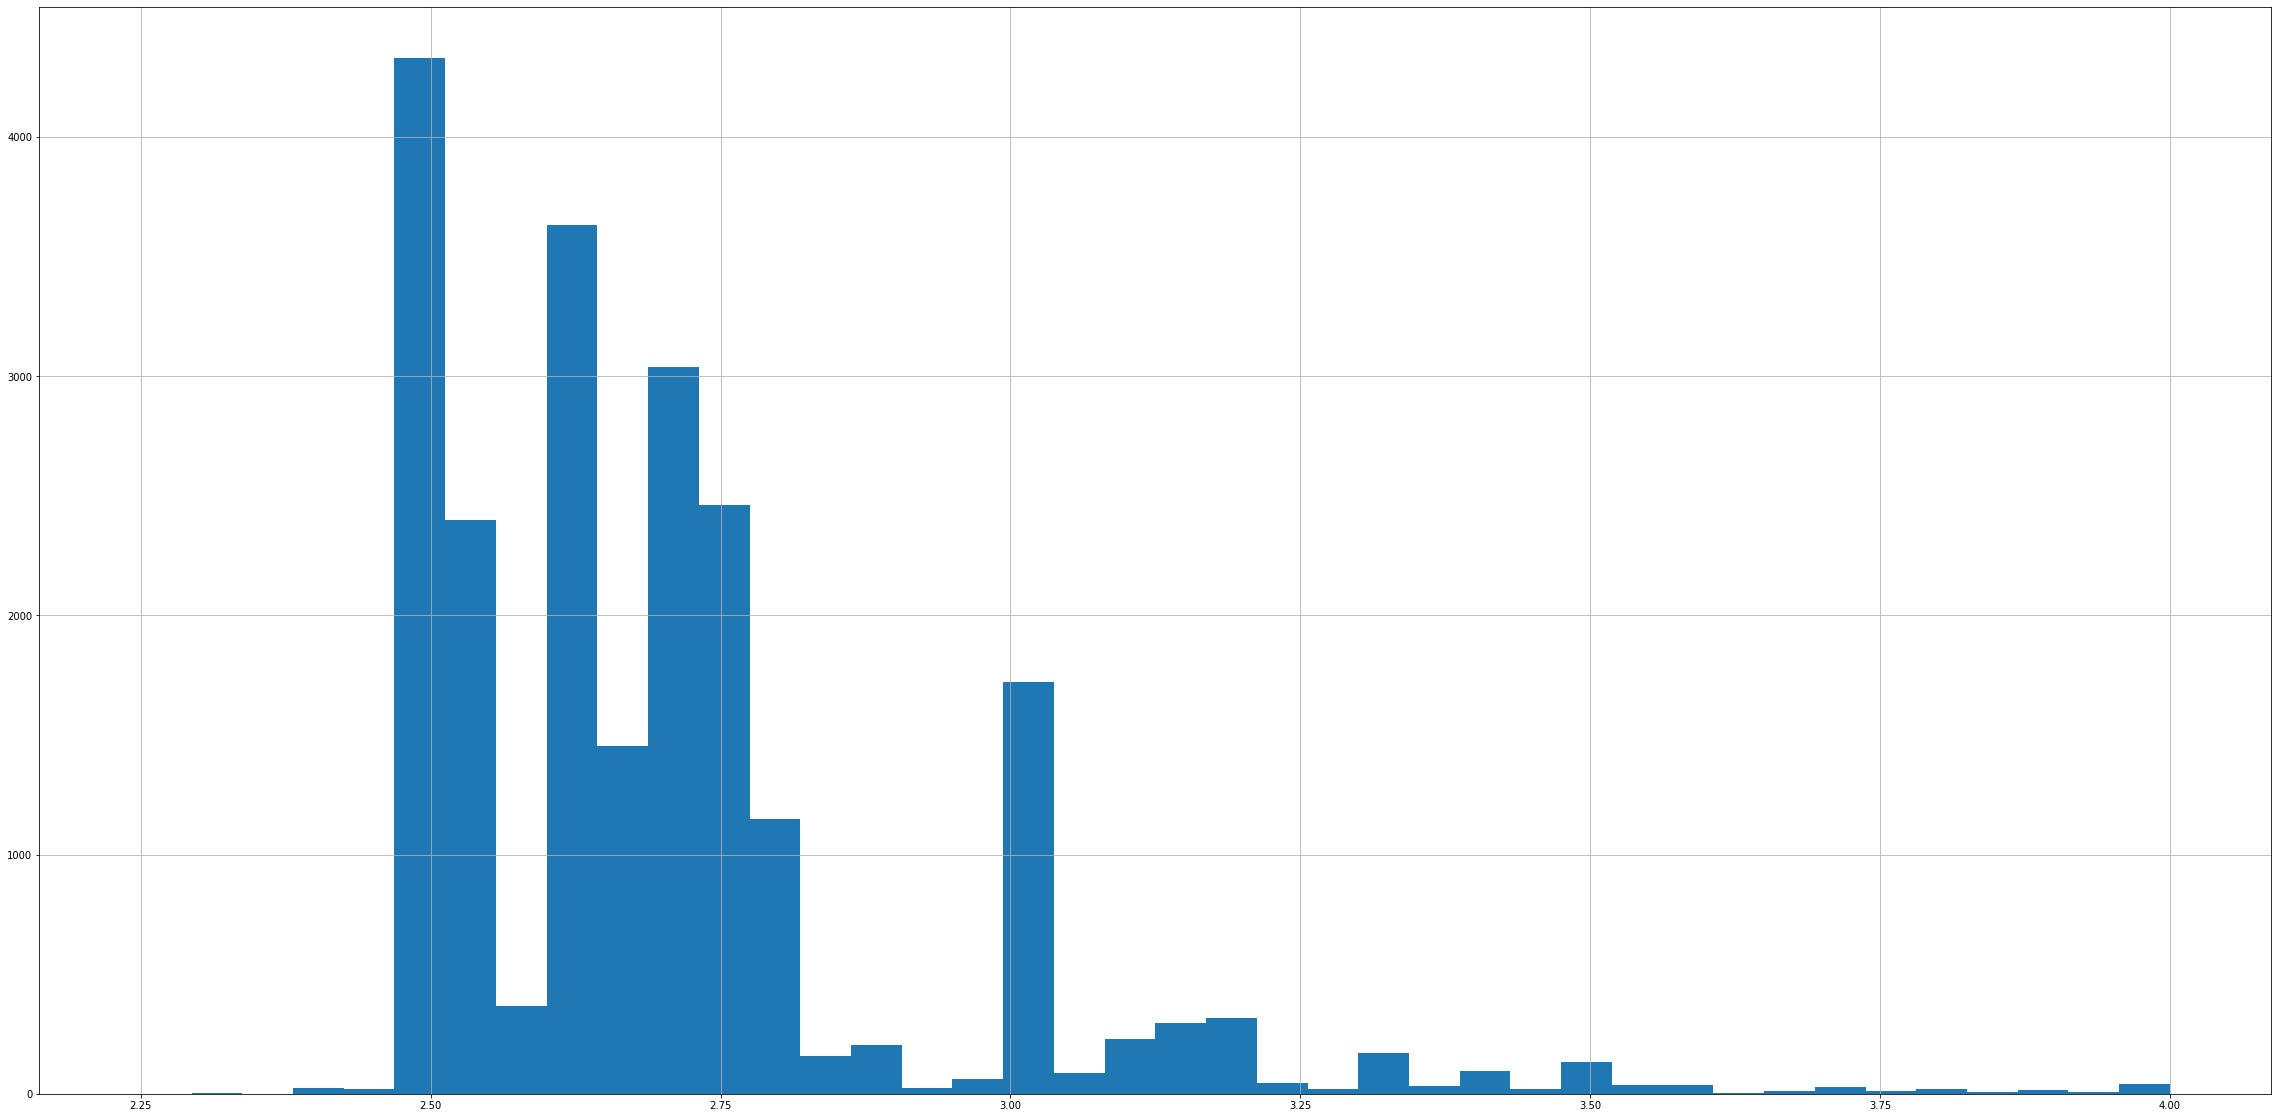

In [ ]:
data['ceiling_height'].hist(bins=40, figsize=(40, 20))
print(data['ceiling_height'].describe())

##### Этаж квартиры

Большинство продаваемых квартир располагаются с 1 по 5 этаж. Далее - количество понемногу убывает с каждым этажом. Скорее всего, происходит так потому, что в Ленинградской области больше всего пятиэтажек, чуть меньше - десяти и двеннадцатиэтажек, еще меньше - более высоких домов.

count    23116.000000
mean         5.874589
std          4.857295
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


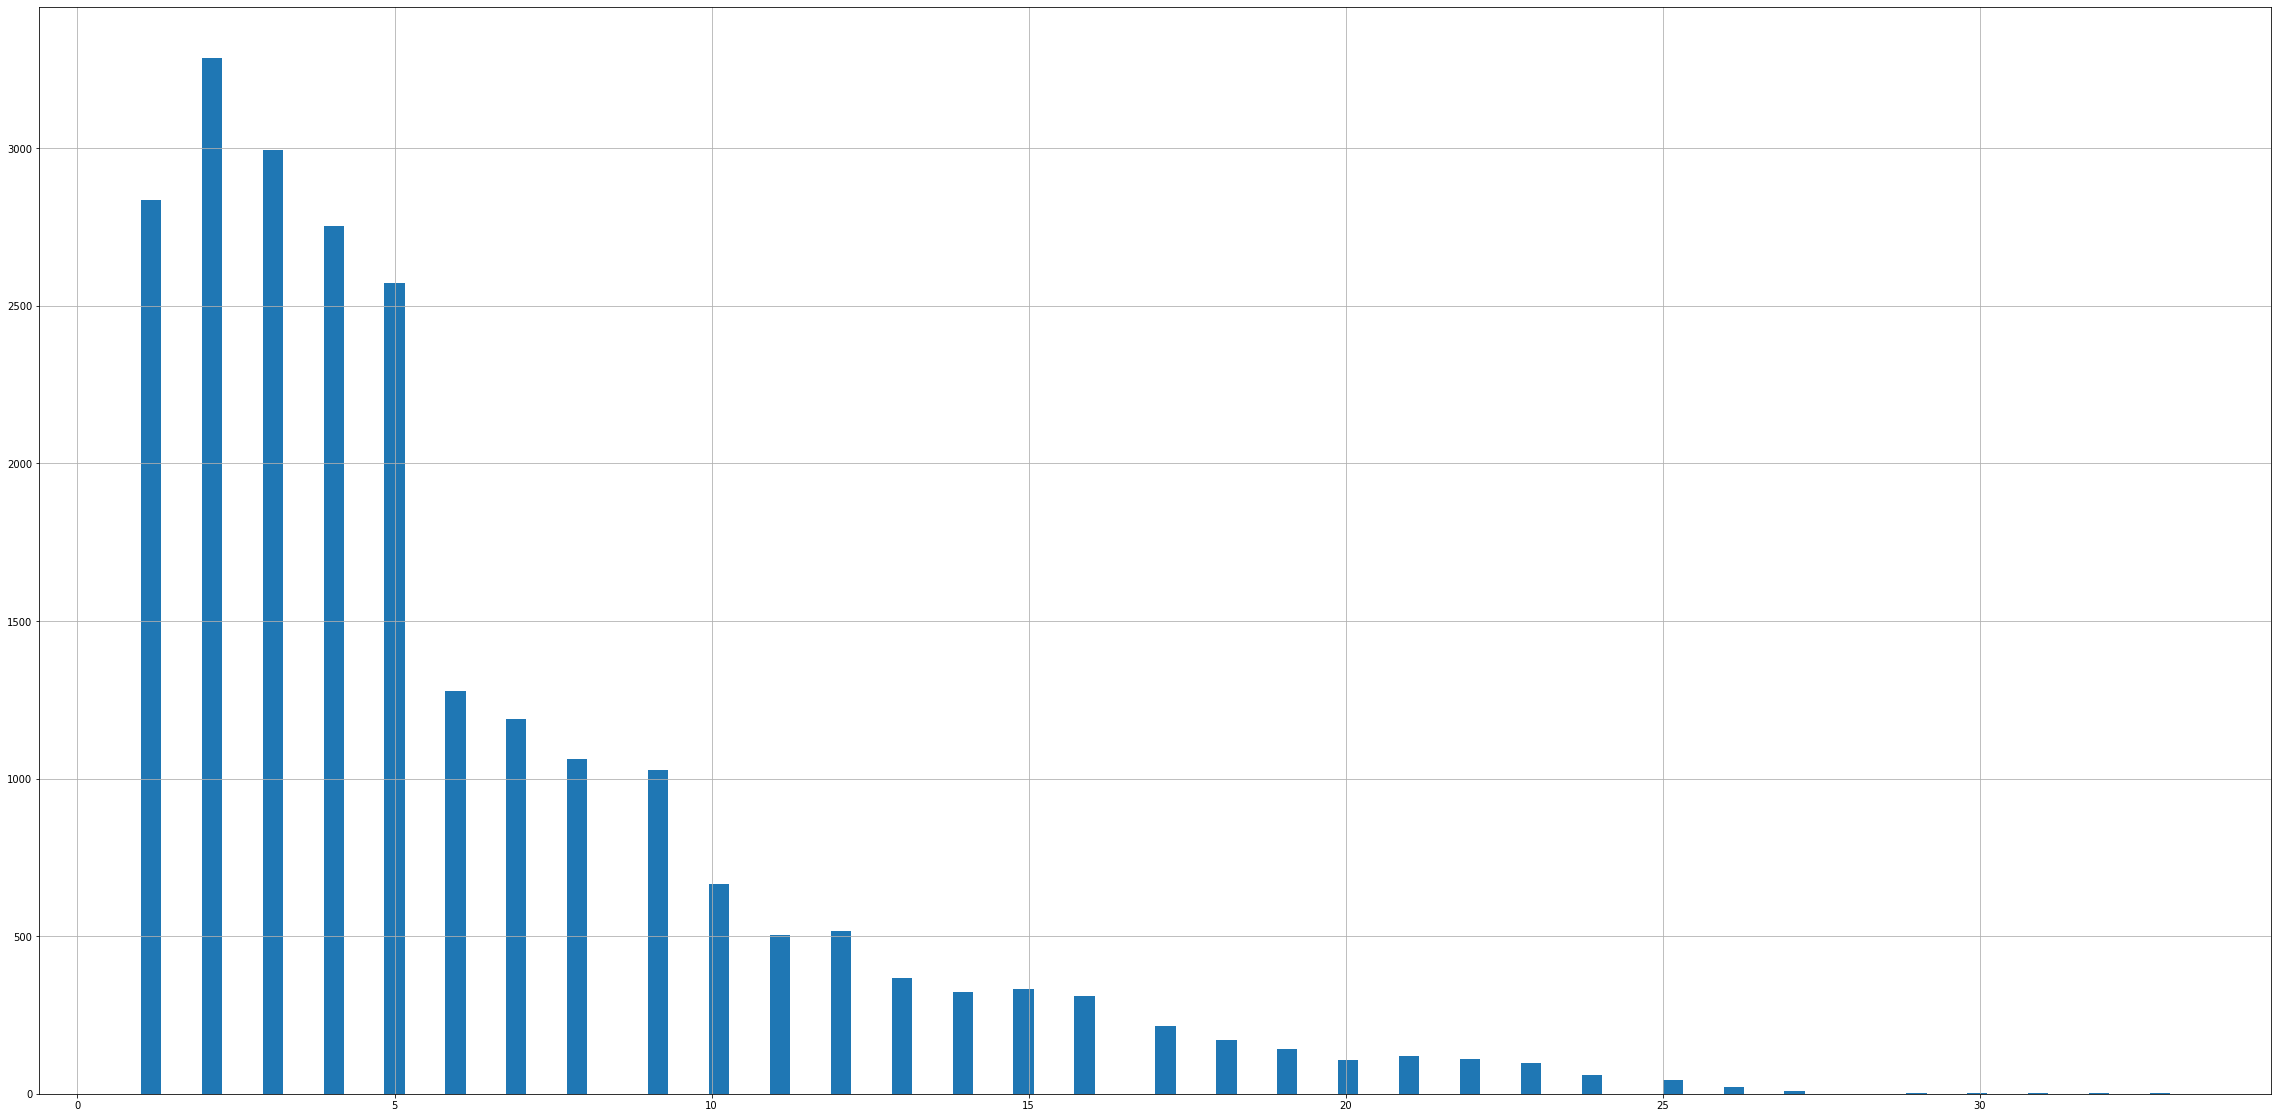

In [ ]:
data['floor'].hist(bins=100, figsize=(40, 20))
print(data['floor'].describe())

##### Тип этажа квартиры («первый», «последний», «другой»)

Большинство квартир располагаются не на первом и не последних этажах.
Продаются немного чаще квартиры, расположенные на последнем этаже, нежели на первом.

<AxesSubplot:xlabel='floor_category'>

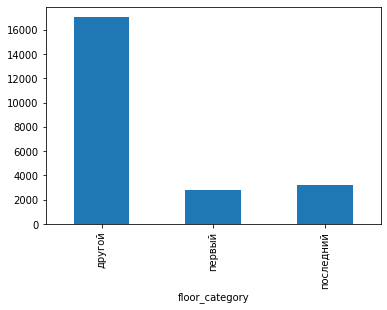

In [ ]:
data.groupby('floor_category')['floor'].count().plot(kind='bar')

##### Общее количество этажей в доме

На графике видно, что пятиэтажки - самые популярные дома среди размещенных на продажу квартир. Чуть меньше девятиэтажек. Также заметны пики на 10 , 12, 16 и 25-ти-этажных домах.

count    23038.000000
mean        10.646193
std          6.549583
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64


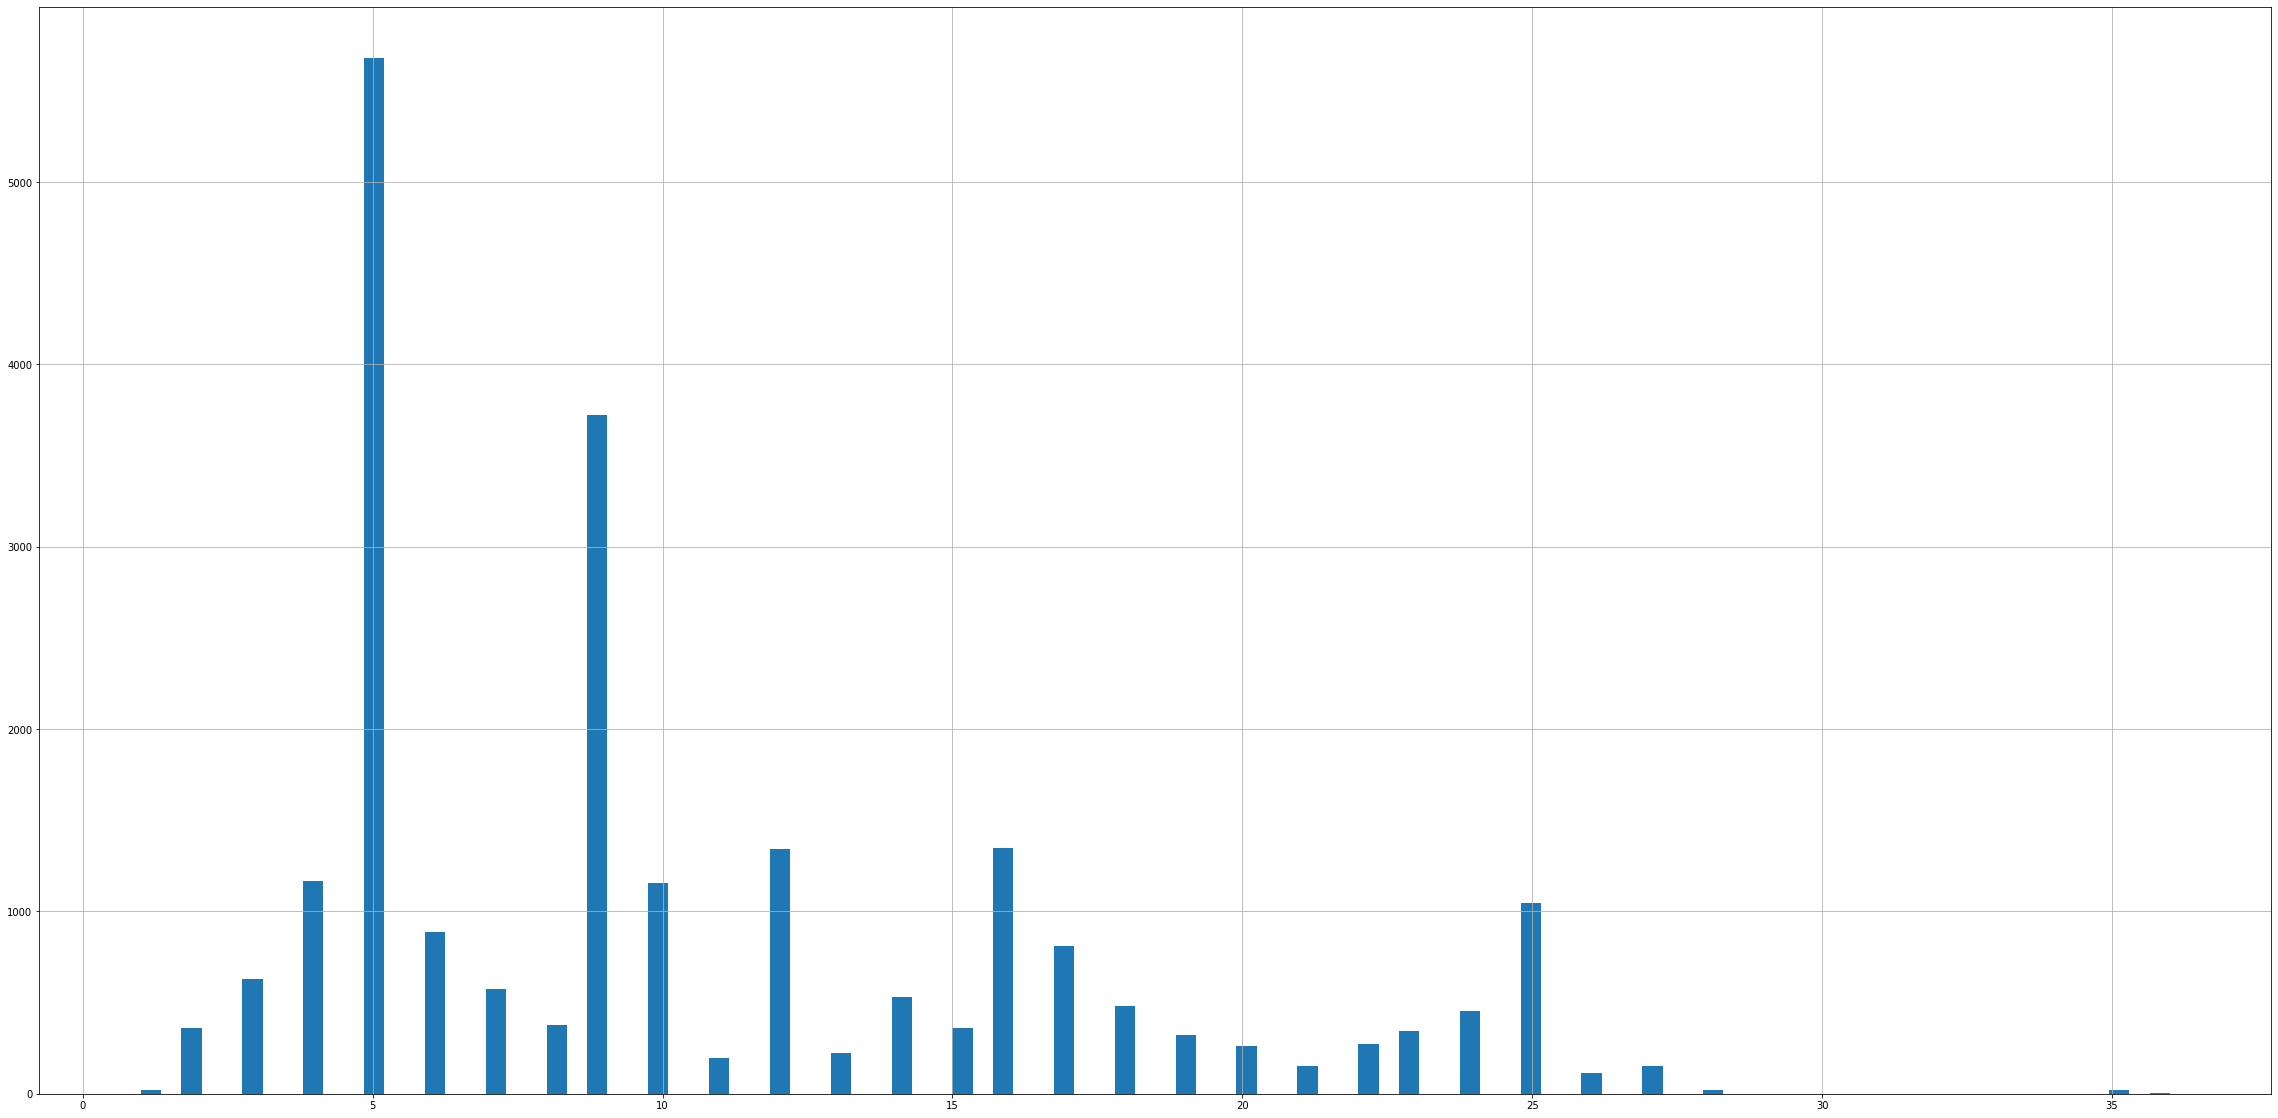

In [ ]:
data['floors_total'].hist(bins=100, figsize=(40, 20))
print(data['floors_total'].describe())

##### Расстояние до центра города в метрах

В среднем продаваемые квартиры находятся на расстоянии 14км от центра города. Заметен также пик на расстоянии 21км от центра Санкт-Петербурга. Это поселки на окраине Санкт-Петербурга, такие как Мурино, Парголово, Стрельна, Шушары (см.вывод ниже)
Отдельные значения около 30км - другие населенные пункты - Ломоносов, Сестрорецк и т.д.
Около 50км - Зеленогорск, Кронштадт, Ломоносов, Петергоф.

count    18412.000000
mean     14439.886596
std       8562.703181
min        181.000000
25%       9496.750000
50%      13263.500000
75%      16722.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
locality_name_new
Санкт-Петербург      20863.105413
поселок Мурино       21888.000000
поселок Парголово    20010.466292
поселок Стрельна     21813.000000
поселок Шушары       19536.760870
Name: cityCenters_nearest, dtype: float64


locality_name_new
Колпино                 32055.924925
Красное Село            29480.329268
Ломоносов               36886.857143
Павловск                33206.921053
Петергоф                32569.523179
Пушкин                  31169.960894
Санкт-Петербург         28492.846154
Сестрорецк              34524.062857
поселок Лисий Нос       28236.000000
поселок Металлострой    28362.583333
поселок Понтонный       32293.450000
поселок Саперный        35854.666667
поселок Усть-Ижора      28222.500000
поселок Шушары          30212.335196
поселок Щеглов

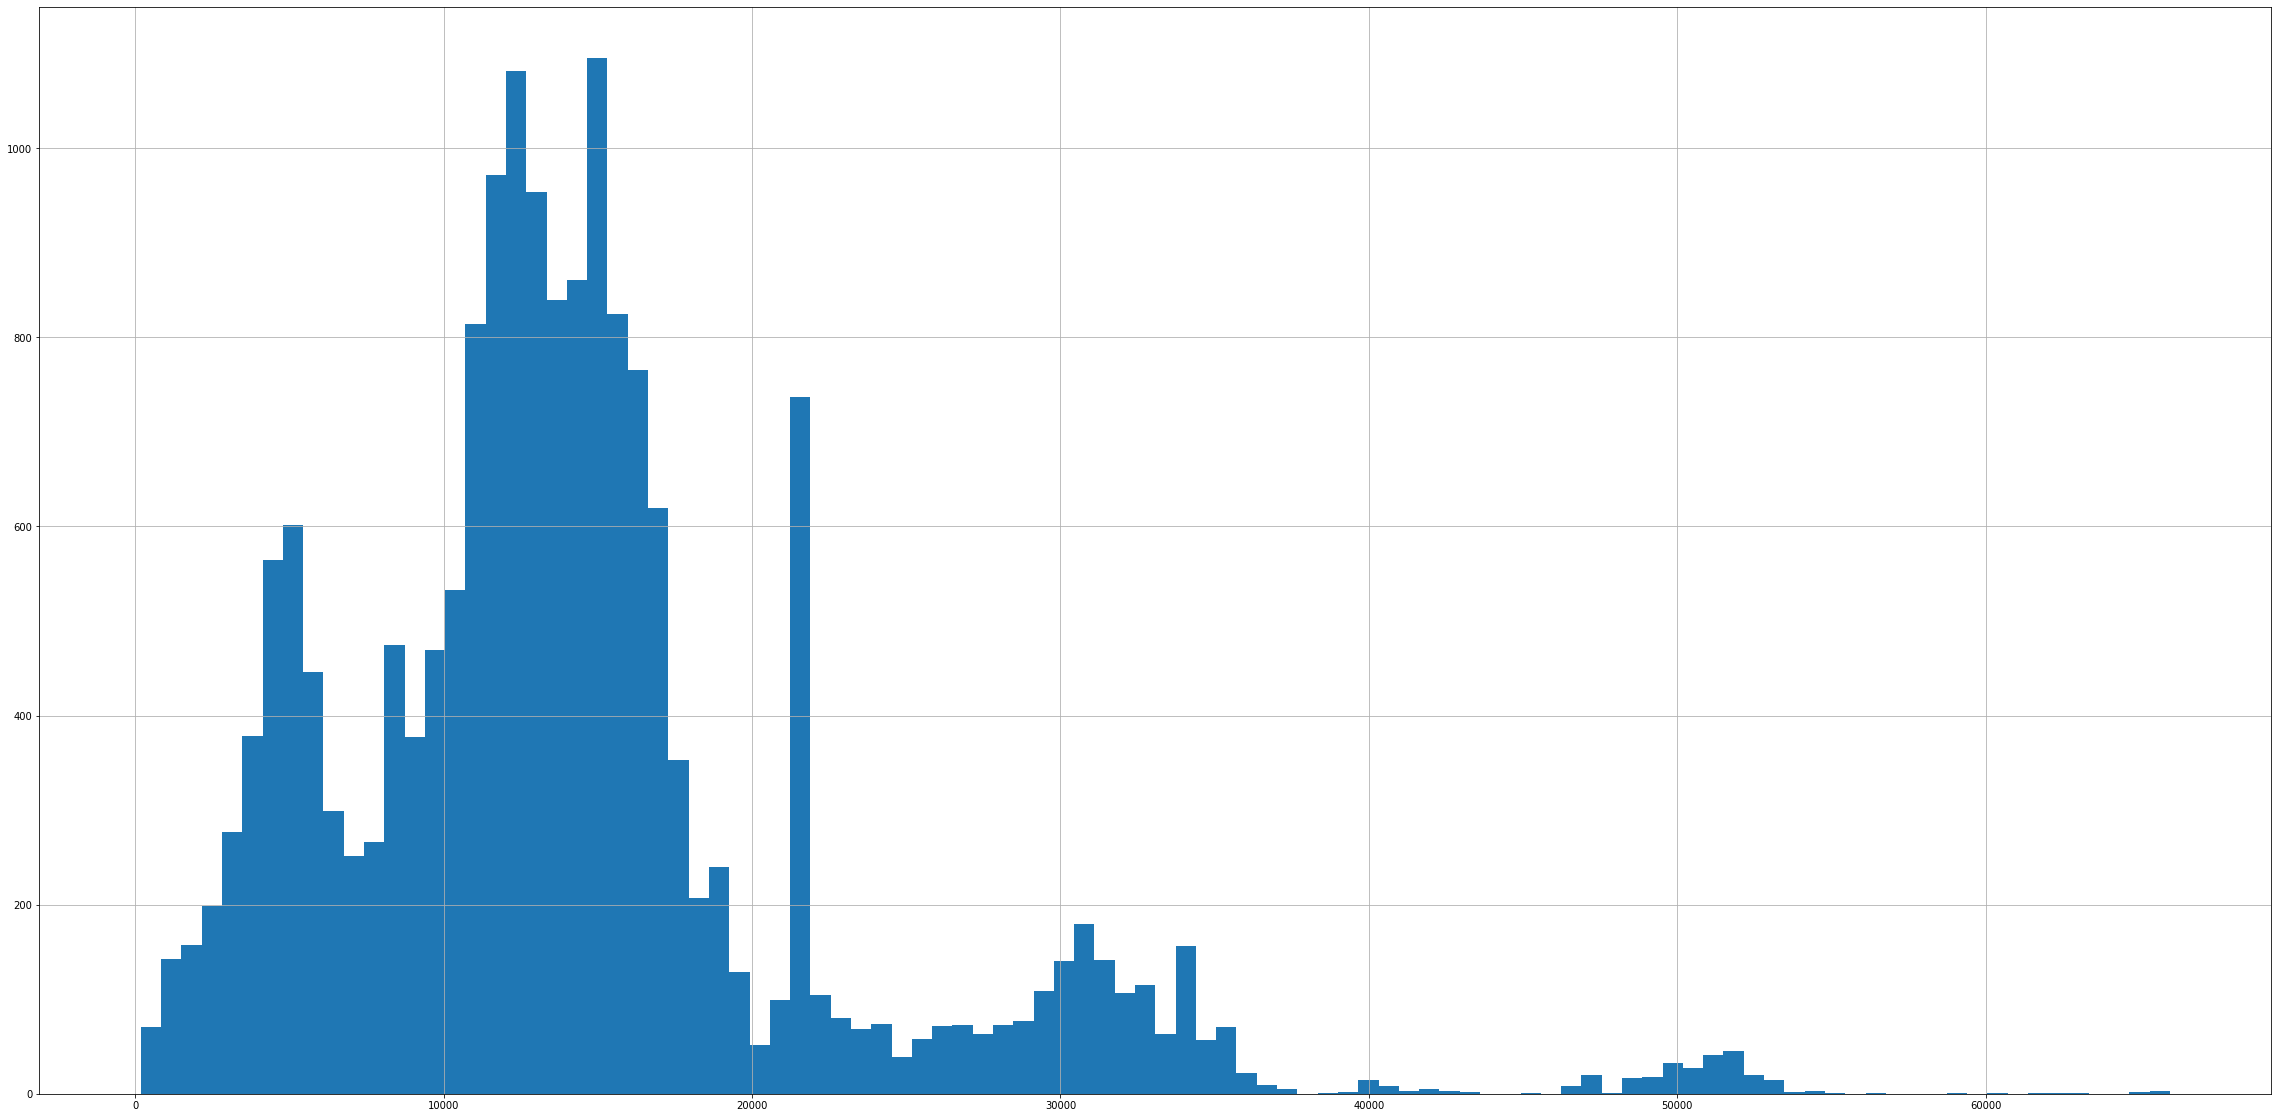

In [ ]:
data['cityCenters_nearest'].hist(bins=100, figsize=(40, 20))
print(data['cityCenters_nearest'].describe())

#среднее расстояние в промежутке от 19 до 22км от центра по населенным пунктам
print(data.query('19000 <= cityCenters_nearest <= 22000').groupby('locality_name_new')['cityCenters_nearest'].mean())
print()
print()

#среднее расстояние в промежутке от 28 до 37км от центра по населенным пунктам
print(data.query('28000 <= cityCenters_nearest <= 37000').groupby('locality_name_new')['cityCenters_nearest'].mean())
print()
print()

#среднее расстояние в промежутке от 28 до 37км от центра по населенным пунктам
print(data.query('48000 <= cityCenters_nearest <= 55000').groupby('locality_name_new')['cityCenters_nearest'].mean())


##### Расстояние до ближайшего аэропорта

Среднее расстояние до аэропорта - 29км. Заметно почти равномерное распределение квартир удаленностью от 10 до 58км с пиком в 52км.

count    18332.000000
mean     29504.094398
std      13034.872510
min       6450.000000
25%      18750.000000
50%      27287.000000
75%      38713.750000
max      84869.000000
Name: airports_nearest, dtype: float64


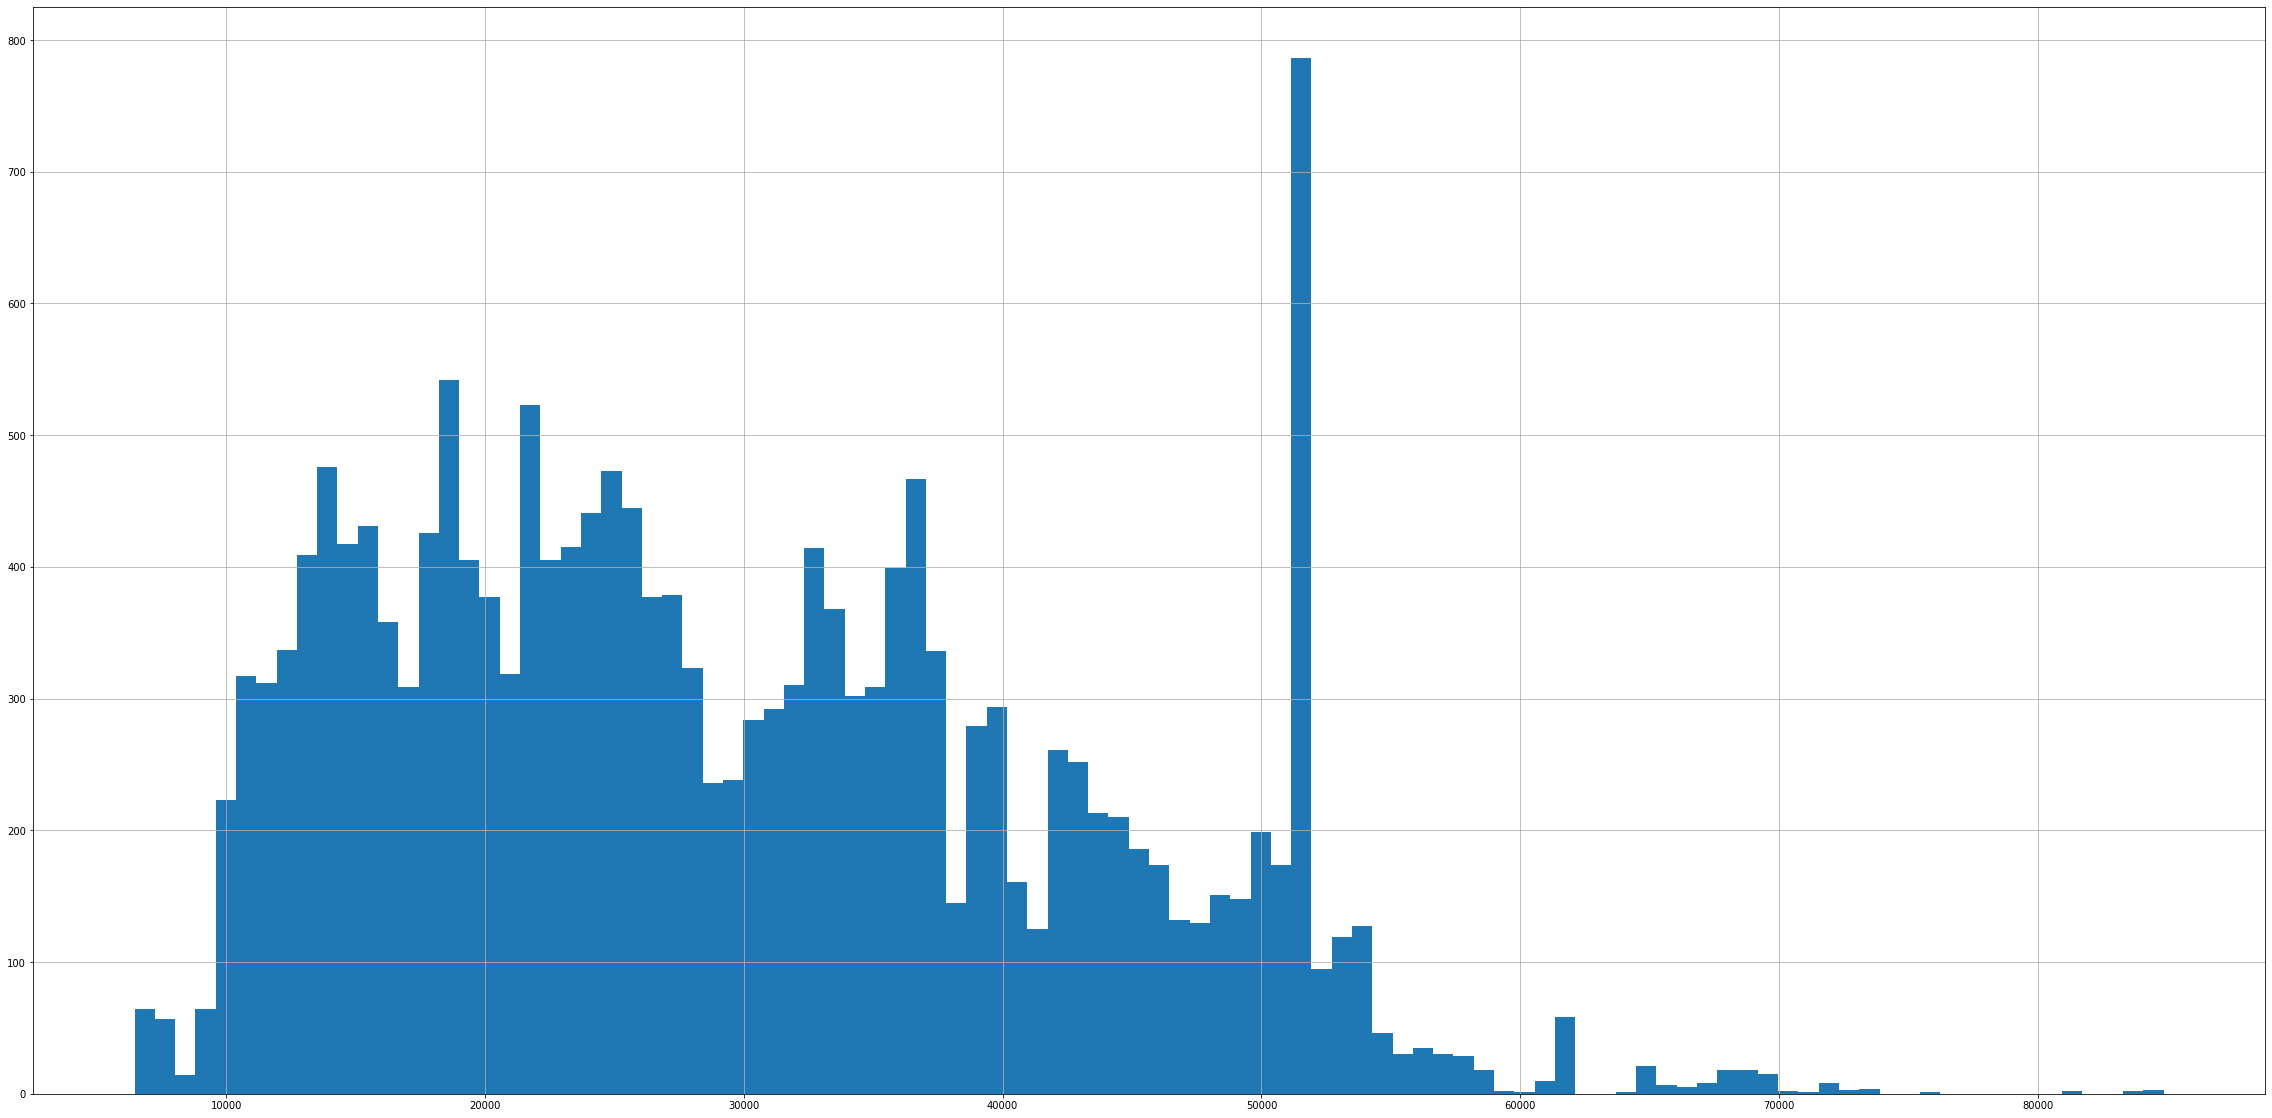

In [ ]:
data['airports_nearest'].hist(bins=100, figsize=(40, 20))
print(data['airports_nearest'].describe())

##### Расстояние до ближайшего парка

По условию в данных представлено расстояние до парка, если он есть в пределах 3км от дома. В среднем ближайший парк находится на расстоянии около 500м (8-10 минут пешком) от дома. Большинство парков находится в пределах 1км от продаваемых квартир.

count    7899.000000
mean      489.209394
std       336.768086
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      2984.000000
Name: parks_nearest, dtype: float64


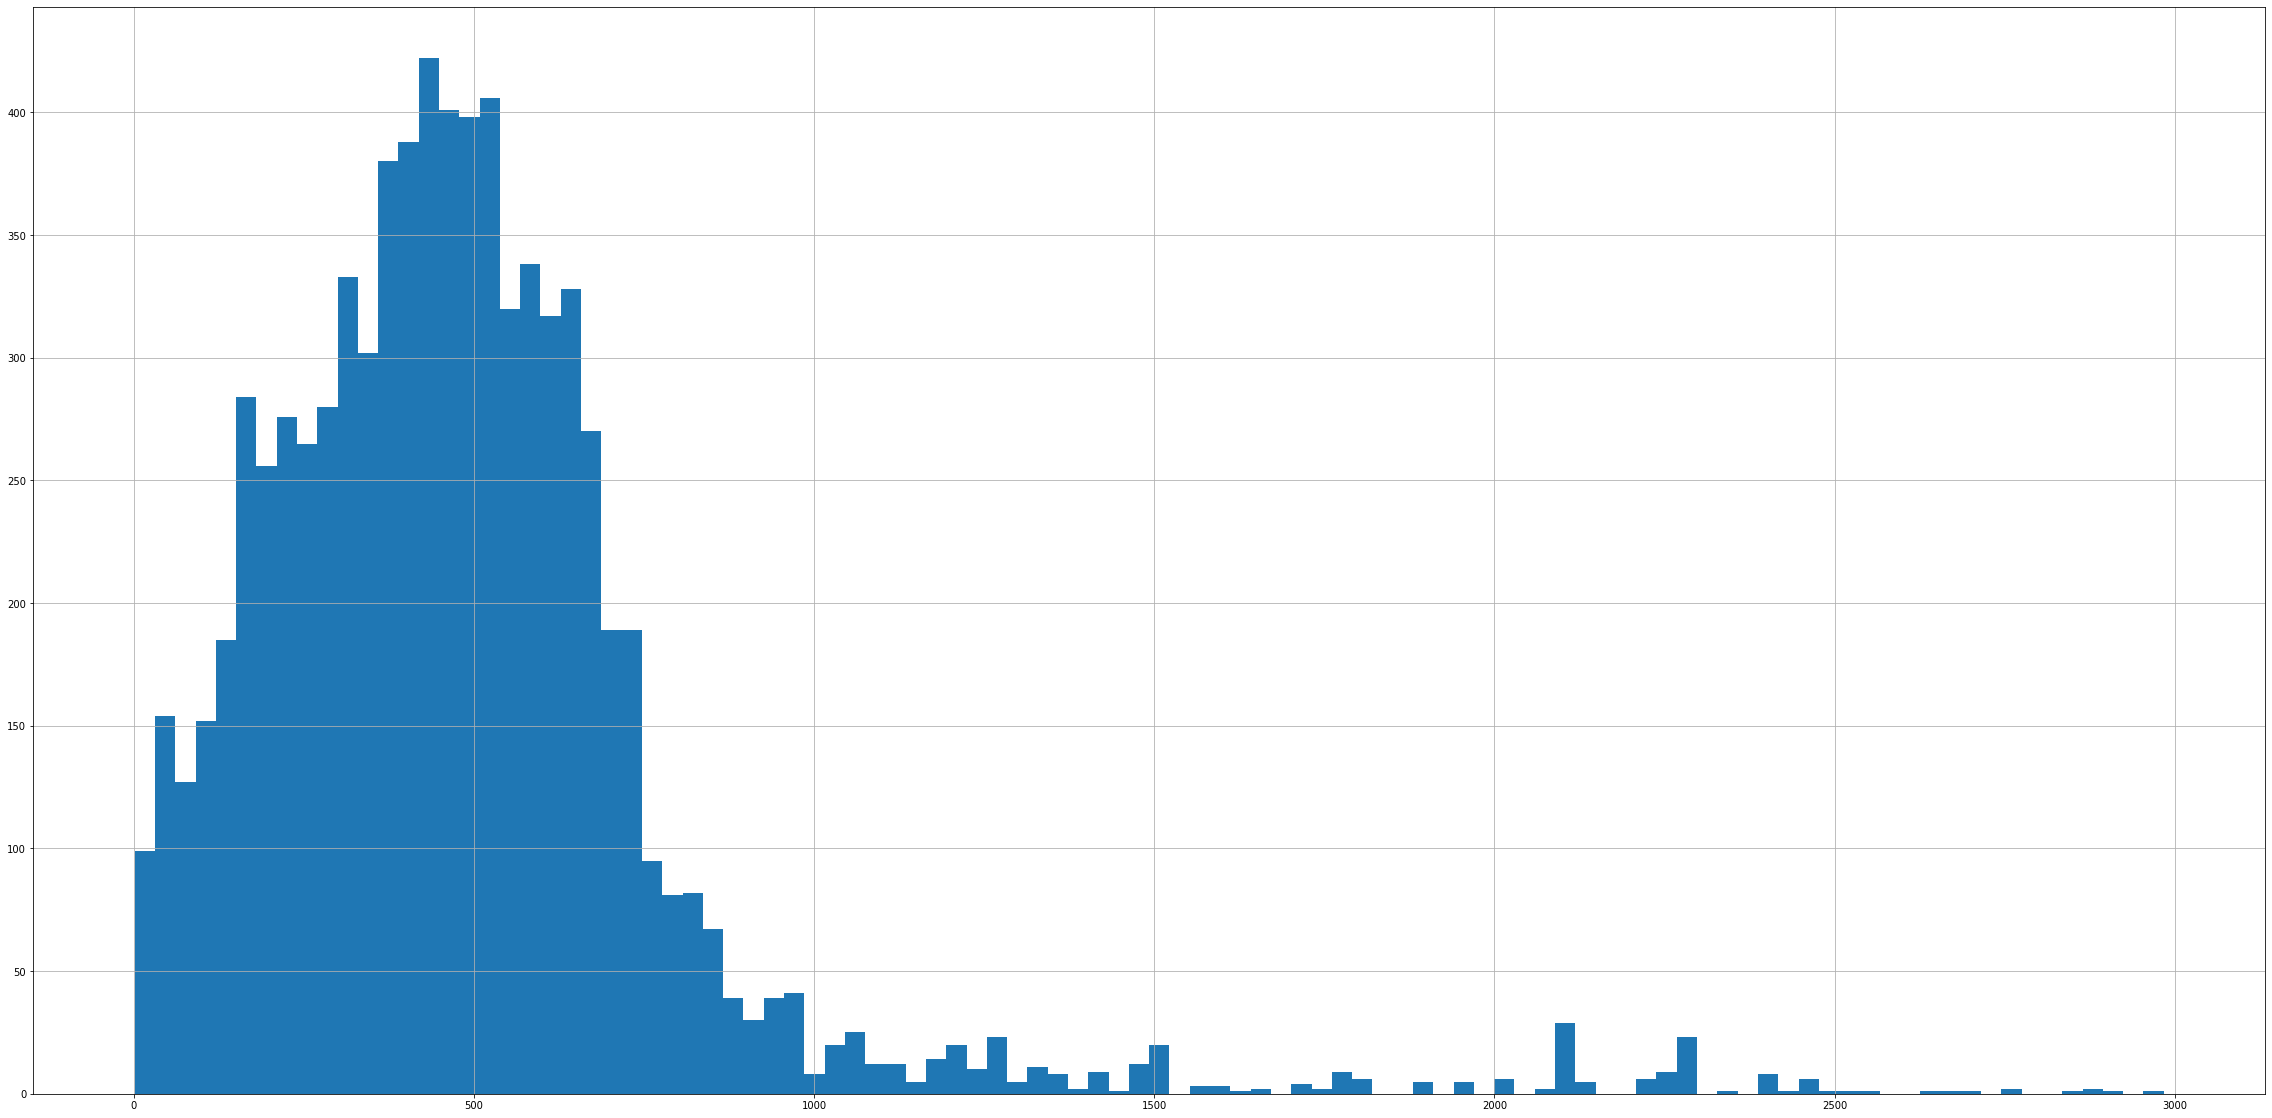

In [ ]:
data['parks_nearest'].hist(bins=100, figsize=(40, 20))
print(data['parks_nearest'].describe())

##### День и месяц публикации объявления

Меньше всего объявлений публикуется в выходные - субботу и воскресенье. Немного больше - в понедельник, больше всего - в другие будние дни.

Заметен спад активности публикаций объявлений в декабре и январе. Февраль, март, апрель - самые популярные месяцы. В мае происходит самый глубокий спад активности, она постепенно повышается к нрябрю месяцу.

<AxesSubplot:>

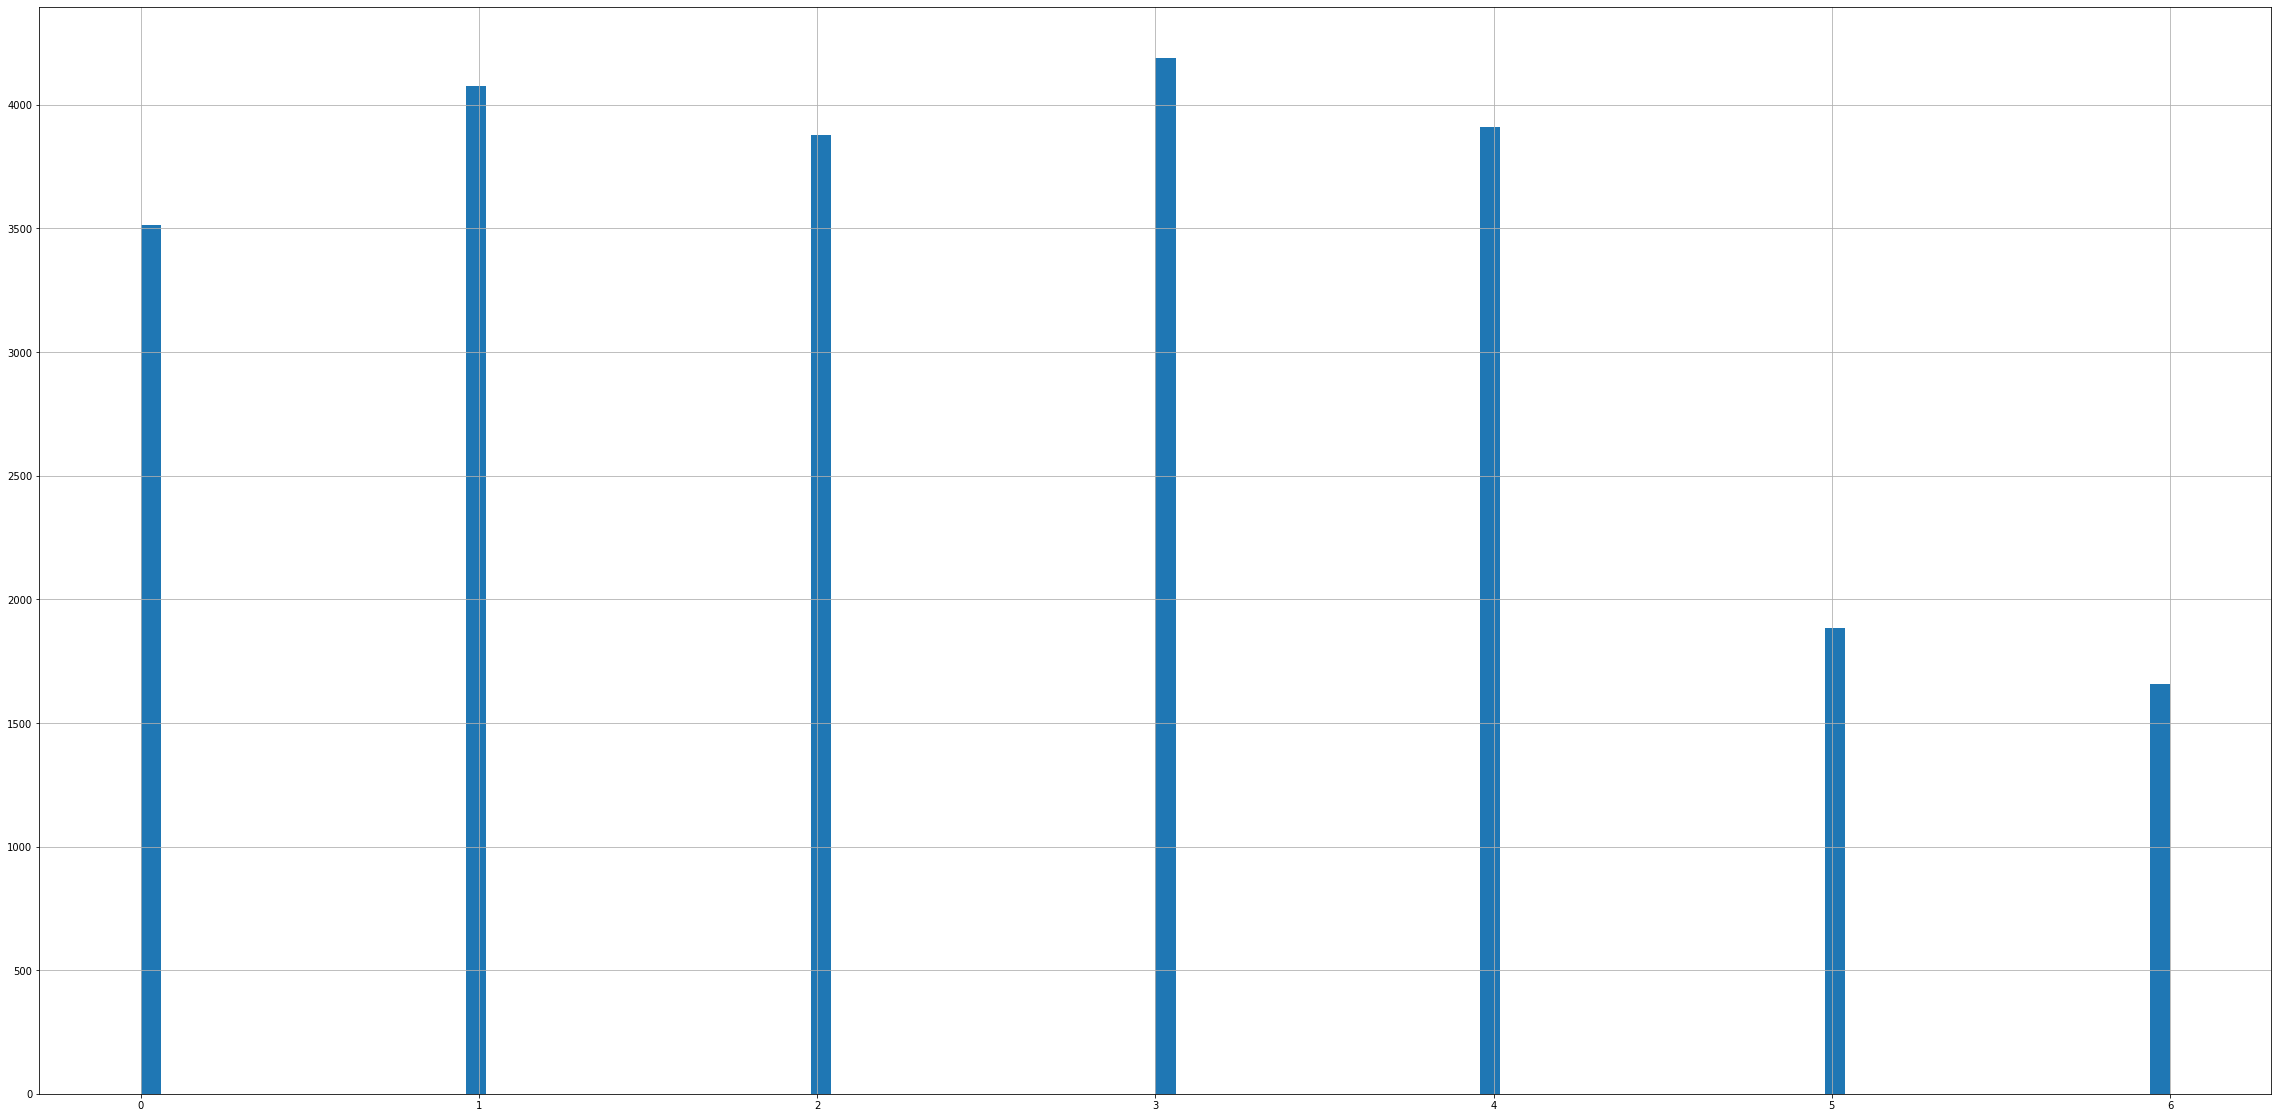

In [ ]:
#День публикации (0-пн, 1-вт и т.д.)
data['publication_day'].hist(bins=100, figsize=(40, 20))

<AxesSubplot:>

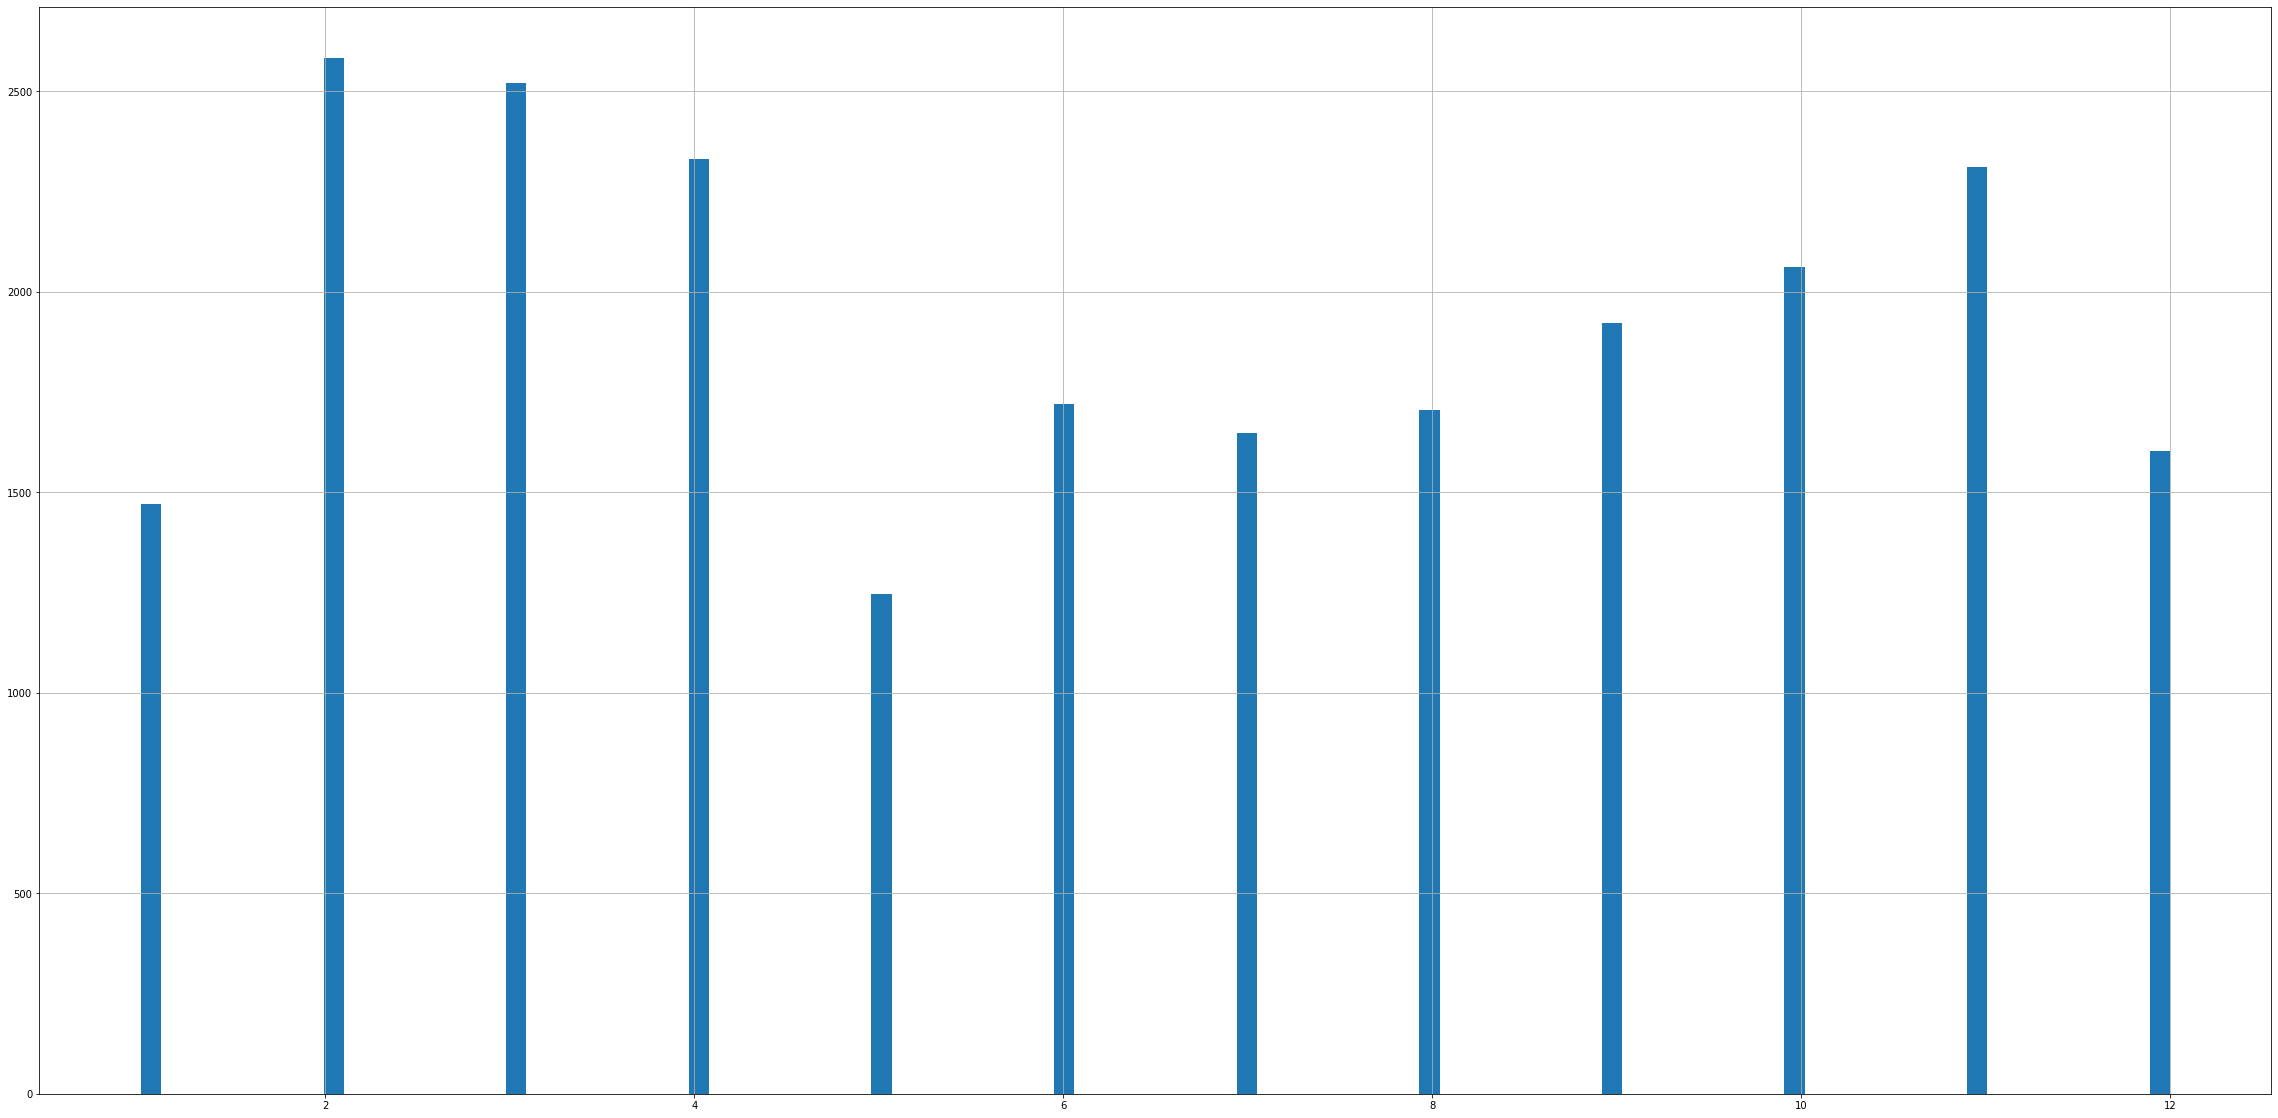

In [ ]:
#месяц публикации (1-январь и т.д.)
data['publication_month'].hist(bins=100, figsize=(40, 20))

#### Скорость продажи квартиры

Среднее время продажи квартиры - 181 день. Это не очень точный показатель из-за очень длительного времени продажи квартир. Очень длительным будем считать продажу длиннее 600 дней.
Более показально смотреть на медиану - 96 дней, около 3-х месяцев. При этом большинство квартир, в целом, продается за 200-220 дней. Заметно два пиковых значения (см.подробную гистограмму) - 45 и 60 дней. Можно считать, что квартиры, которые удалось продать быстрее 45 дней - очень быстро продались.

Среднее время продажи квартиры - 181 день. Это не очень точный показатель из-за очень длительного времени продажи квартир. Более показально смотреть на медиану - 96 дней, около 3-х месяцев.

При этом большинство квартир, в целом, продается в промежуток от 45 до 232 дней (межквартильный размах - значения между 1 и 3 квартилем). Заметно два пиковых, наиболее популярных значения (см.подробную гистограмму) - 45 и 60 дней.

Будем считать, что квартира продается необычно долго, если продается дольше 512 дней (верхняя граница "уса" в диаграмме размаха, к третьему квартилю прибавим 1.5 межквартильного размаха).

Выделить очень "быстрые" продажи нельзя. Все квартиры, которые продались быстрее 45 дней, продались быстрее, чем большинство других квартир. Тем не менее, таких квартир достаточно много, и , даже продажа за 1 день будет считаться нормальным результатом, а не нереальным значением.

count    19995.000000
mean       181.410253
std        220.135591
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

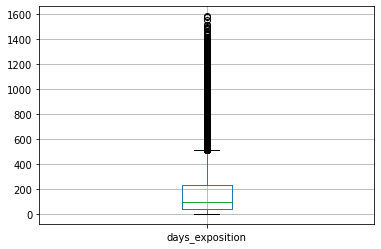

In [ ]:
data.boxplot(column='days_exposition')
data['days_exposition'].describe()

Среднее 181.41025256314077
Медиана 96.0


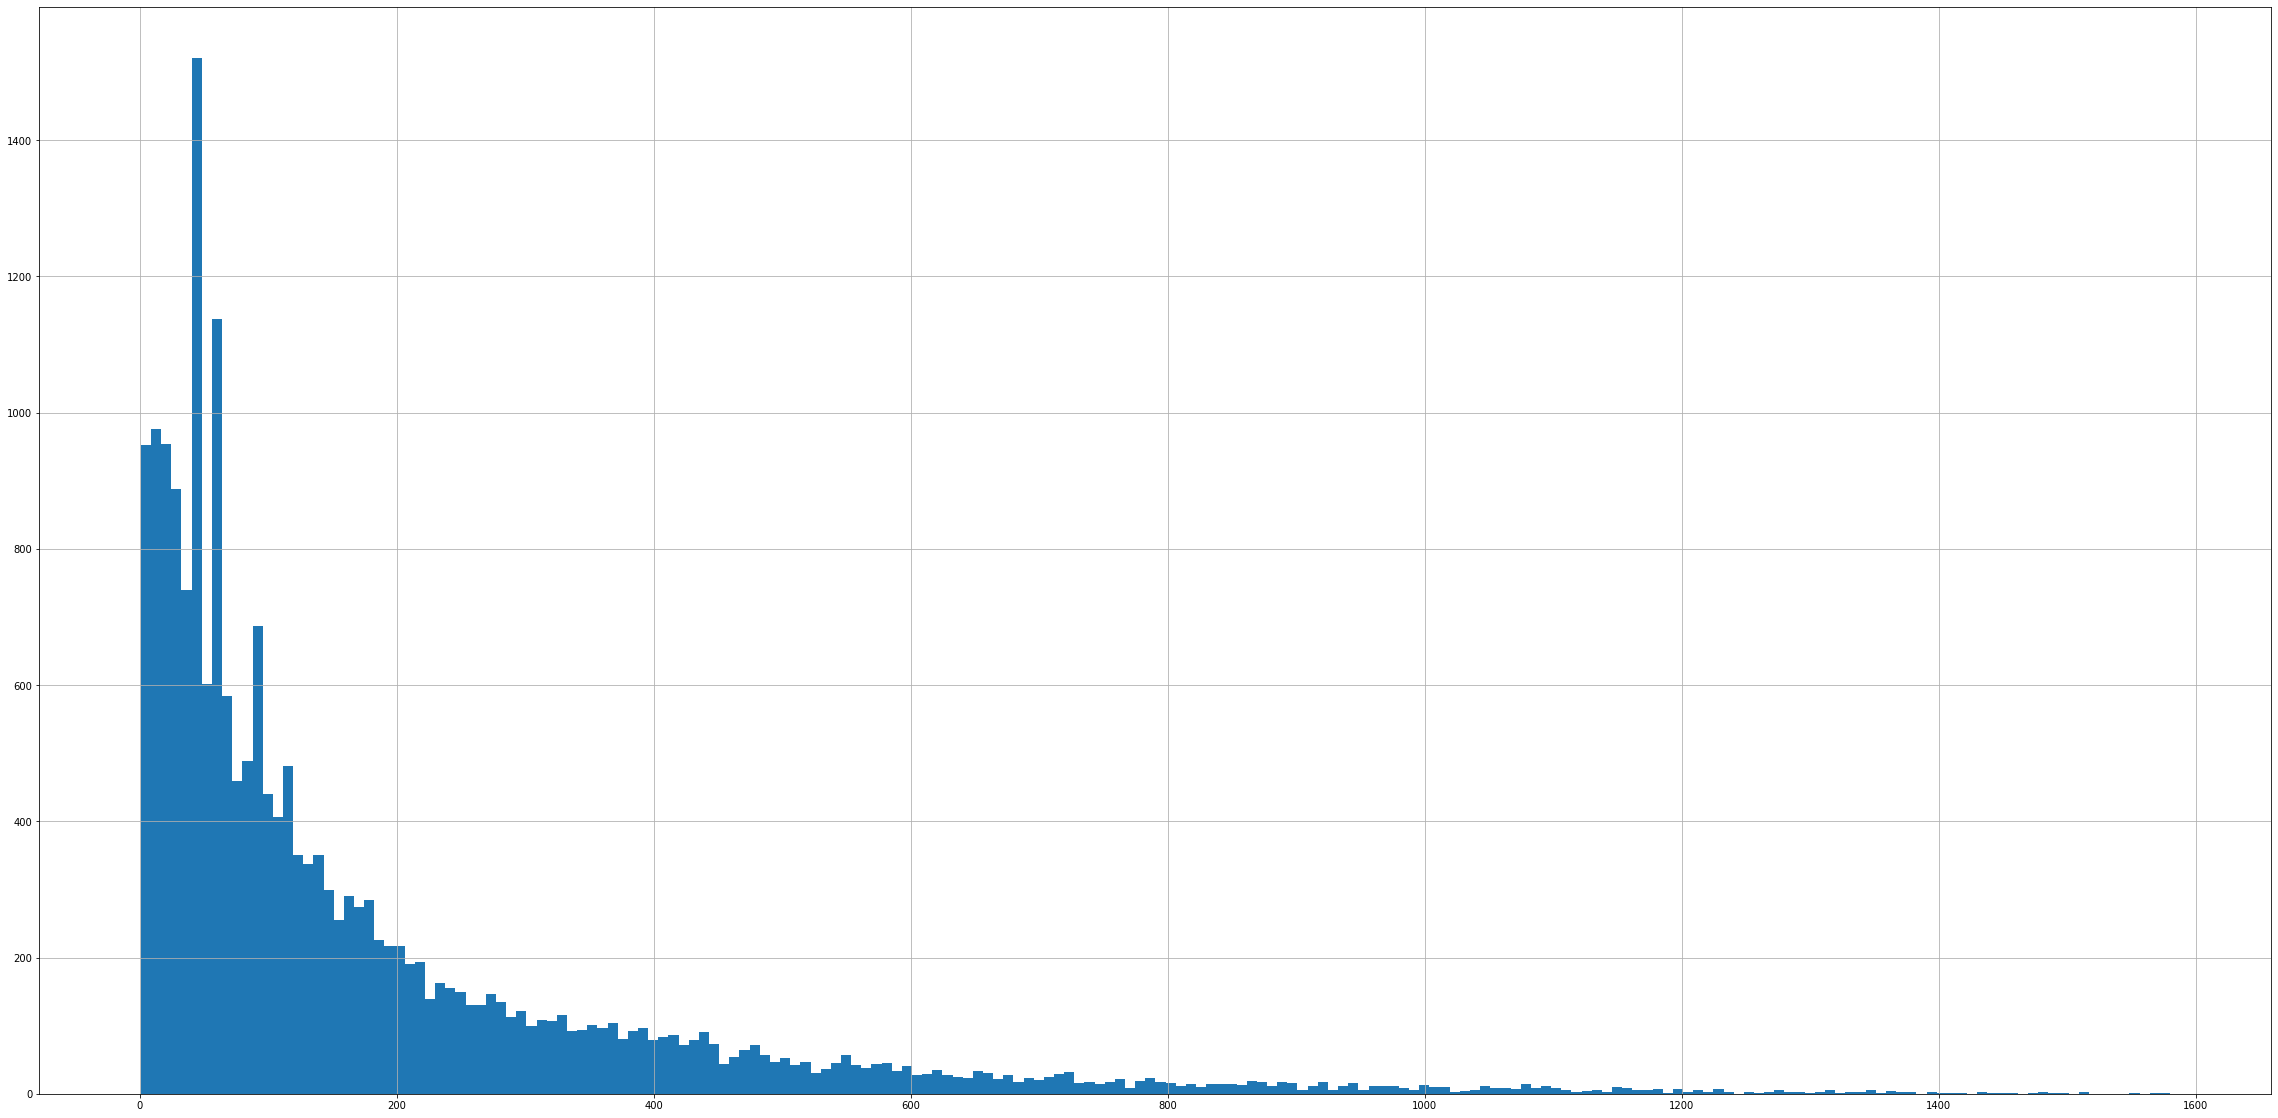

In [ ]:
data['days_exposition'].hist(bins=200, figsize=(40, 20))
print('Среднее', data['days_exposition'].mean())
print('Медиана', data['days_exposition'].median())

<AxesSubplot:>

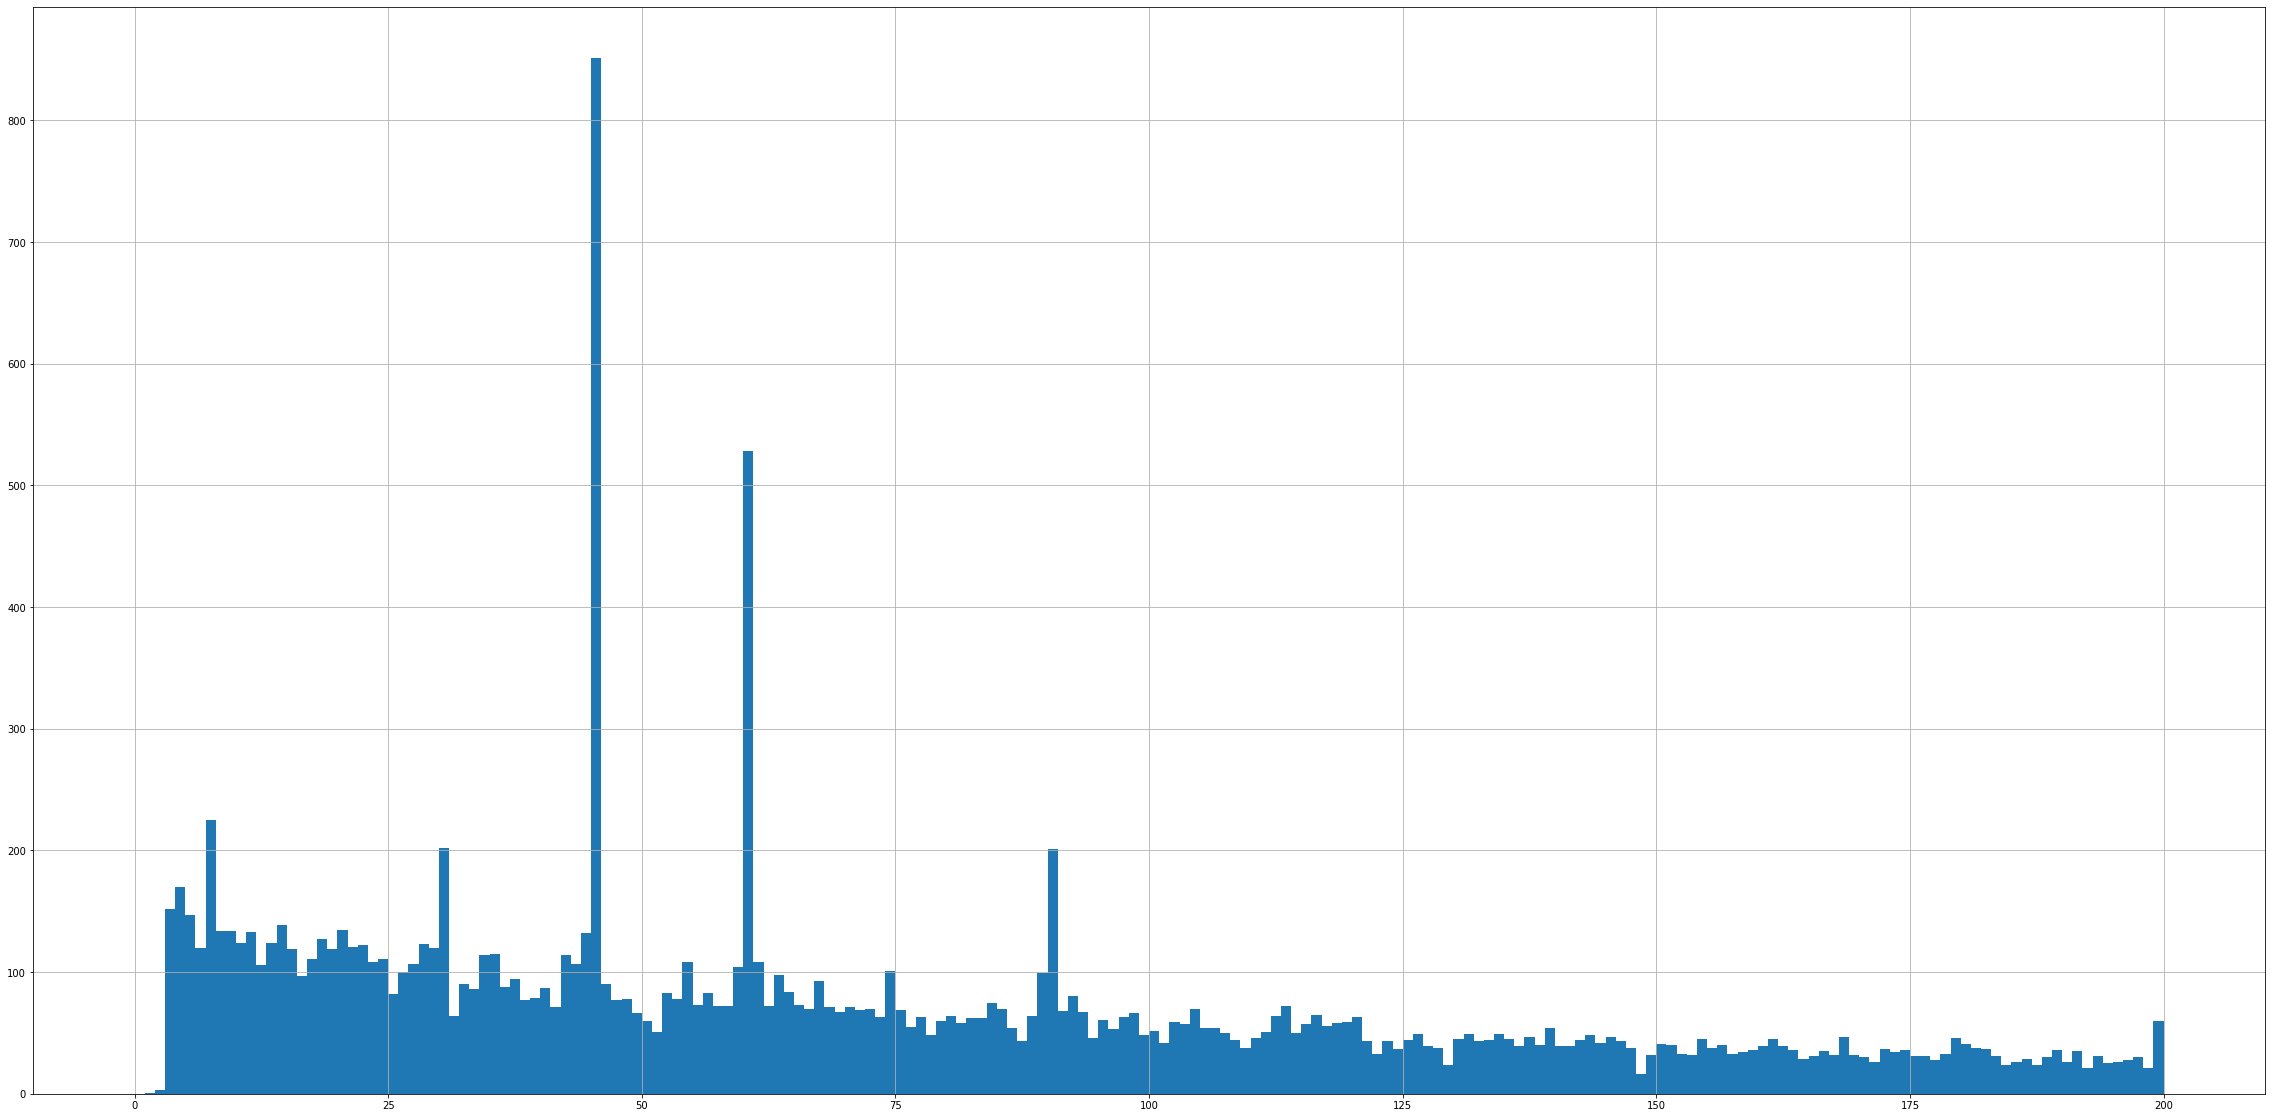

In [ ]:
#Более подробная гистограмма
data['days_exposition'].hist(bins=200, range=(0, 200), figsize=(40, 20))

#### Факторы, влияющие на общую (полную) стоимость

Посмотрим, какие факторы влияют на полную стоимость реализуемых объектов. Для четырех параметров - общей и жилой площади квартиры, площади кухни и кол-ва комнат рассчитаем коэффициент корреляции Пирсона. Заметна очень сильная корреляция (0.91) между общей и жилой площадью, что вполне логично. На общую цену квартиры так сильно не влияет ни один из представленных параметров. Больше всего влияет общая площадь квартиры - коэффициент корреляции между переменными равен 0.69

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.686752     0.593179      0.510257  0.402206
total_area      0.686752    1.000000     0.917490      0.585505  0.775377
living_area     0.593179    0.917490     1.000000      0.406743  0.860746
kitchen_area    0.510257    0.585505     0.406743      1.000000  0.259064
rooms           0.402206    0.775377     0.860746      0.259064  1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

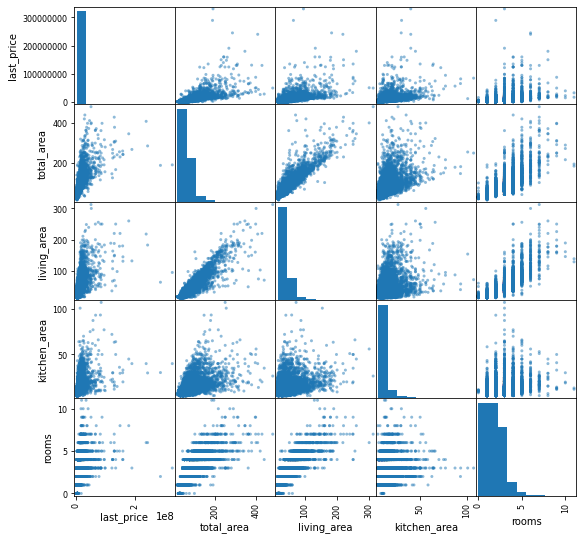

In [ ]:
data_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
print(data_corr.corr()) #строим матрицу корреляции
pd.plotting.scatter_matrix(data_corr, figsize=(9, 9)) #строим матрицу диаграмм рассеяния

Посмотрим,  влияют ли на цену недвижимости такие параметры, как этаж, на котором расположена квартира (первый, последний или другой), и дата размещения объявления (день недели, месяц, год).

                  last_price
floor_category              
другой          6.680267e+06
первый          4.841434e+06
последний       6.488328e+06
AxesSubplot(0.125,0.125;0.775x0.755)


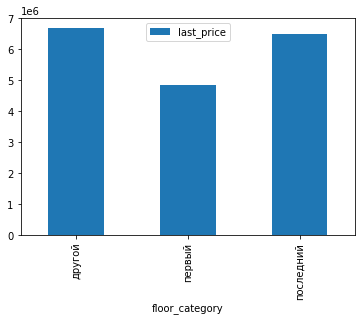

In [ ]:
print(data.pivot_table(index='floor_category', values='last_price', aggfunc='mean'))
print(data.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(kind='bar'))

Заметна разница между средней ценой квартир, расположенных на первом этаже и других этажах. Она ниже - 4.8 млн.руб. против 6.5-6.7 млн.руб. на других этажах.

                   last_price
publication_day              
0                6.431433e+06
1                6.397402e+06
2                6.462063e+06
3                6.638132e+06
4                6.378144e+06
5                6.291815e+06
6                6.154547e+06
AxesSubplot(0.125,0.125;0.775x0.755)


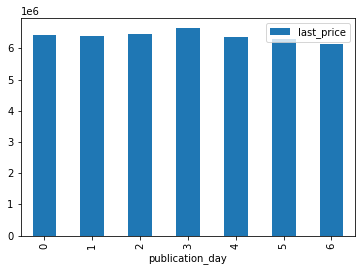

In [ ]:
print(data.pivot_table(index='publication_day', values='last_price', aggfunc='mean'))
print(data.pivot_table(index='publication_day', values='last_price', aggfunc='mean').plot(kind='bar'))

Нет большой разницы в цене квартиры в зависимости от того, в какой день недели было размещено объявление.

                     last_price
publication_month              
1                  6.561138e+06
2                  6.348365e+06
3                  6.316999e+06
4                  6.654715e+06
5                  6.371657e+06
6                  6.271640e+06
7                  6.503237e+06
8                  6.411198e+06
9                  6.526405e+06
10                 6.206300e+06
11                 6.467584e+06
12                 6.537812e+06
AxesSubplot(0.125,0.125;0.775x0.755)


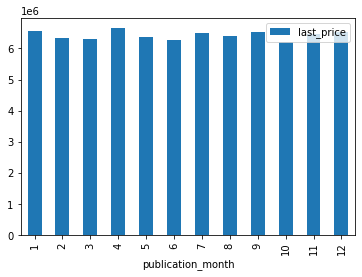

In [ ]:
print(data.pivot_table(index='publication_month', values='last_price', aggfunc='mean'))
print(data.pivot_table(index='publication_month', values='last_price', aggfunc='mean').plot(kind='bar'))

Несмотря на разное количество опубликованных объявлений в разные месяцы года, сам месяц публикации не оказывает существенного влияния на цену объекта.

                          mean      count
                    last_price last_price
publication_year                         
2014              1.185984e+07        136
2015              8.375863e+06       1167
2016              6.667072e+06       2725
2017              6.361564e+06       7967
2018              5.955854e+06       8297
2019              6.703294e+06       2824
AxesSubplot(0.125,0.125;0.775x0.755)


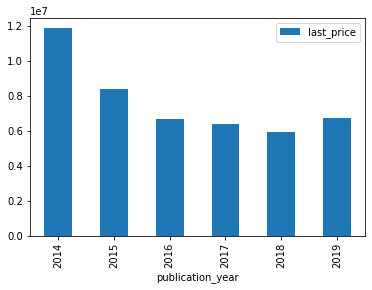

In [ ]:
print(data.pivot_table(index='publication_year', values='last_price', aggfunc=['mean', 'count']))
print(data.pivot_table(index='publication_year', values='last_price', aggfunc='mean').plot(kind='bar'))

В 2014 году средняя стоимость недвижимости в Ленинградской области заметно выше, чем в других годах. Тем не менее, этот год не будем брать во внимание - кол-во проданных квартир очень маленькое - всего 136, что может исказить результаты.
Тем не менее, самая высокая стоимость - в 2015 году (в среднем 8.37 млн.руб.). Далее она снижалась с 6.66 млн.руб. до 5.95 млн.руб., а в 2019 году увеличилась до 6.7 млн.руб.

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Выделим для анализа 10 населенных пунктов с самым большим числом объвлений о продаже квартир. Посчитаем для них среднюю цену квадратного метра жилья (по медиане для точности расчетов).

Самый дорогой квадратный метр жилья - в Санкт-Петербурге (104.5 тыс.руб.). Далее идет Пушкин (99.9 тыс.руб.), деревня Кудрово (95.8  тыс.руб.).
Самый дешевый квадратный метр жилья в самых популярных населенных пунктах - в Выборге (58 тыс.руб.), что почти в 2 раза ниже Санкт-Петербурга. Во Всеволжске (65.7 тыс.руб.) и Гатчине (68 тыс.руб.) немного дороже.

In [ ]:
data_top = data.groupby('locality_name_new') \
.agg({'locality_name_new':'count', 'price_square_meter':'median'})

data_top.columns = ['count', 'median']
data_top10 = data_top.sort_values(by='count', ascending=False).head(10)

Отсортируем таблицу с ТОП-10 населенными пунктами Ленинградской области по цене за м2.

In [ ]:
data_top10.sort_values(by='median', ascending=False)

,count,median
locality_name_new,,
Санкт-Петербург,15385,104500.000000
Пушкин,363,99987.179487
деревня Кудрово,451,95820.189274
поселок Парголово,304,91073.226244
поселок Мурино,555,85657.142857
поселок Шушары,424,76037.183544
Колпино,336,74723.748474
Гатчина,301,67927.170868
Всеволожск,389,65789.473684


<AxesSubplot:xlabel='locality_name_new'>

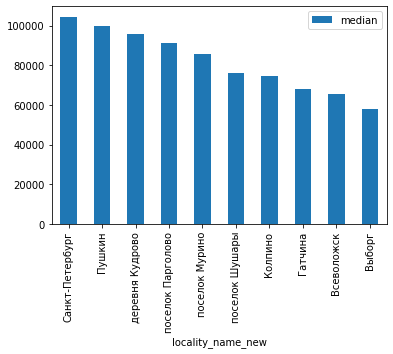

In [ ]:
data_top10.sort_values(by='median', ascending=False).plot(y='median', kind='bar')

#### Средняя цена километра в стоимости жилья в Санкт-Петербурге

Средняя цена объектов в Санкт-Петербурге сильно зависит от удаленности от центра города. Она особенно высокая в пределах первого  и второго  километров. Первый километр добавляет к стоимости почти 21млн.руб., второй - около 8млн.руб. С 3 по 8 км от центра цена постепенно снижается до дополнительных 1160тыс.руб. Дальше 10-15 км от центра города дополнительный километр добавляет примерно одинаковую стоимоть - 160тыс.руб.

                            price_km
cityCenters_nearest_km              
0.0                              inf
1.0                     2.096702e+07
2.0                     8.197783e+06
3.0                     3.744177e+06
4.0                     3.023991e+06
5.0                     2.688920e+06
6.0                     2.420150e+06
7.0                     2.096555e+06
8.0                     1.159705e+06
9.0                     7.762914e+05
10.0                    6.536382e+05
11.0                    5.701433e+05
12.0                    5.191034e+05
13.0                    4.717798e+05
14.0                    4.039409e+05
15.0                    3.916785e+05
16.0                    3.365108e+05
17.0                    3.128611e+05
18.0                    2.851186e+05
19.0                    2.675137e+05
20.0                    3.021106e+05
21.0                    2.613991e+05
22.0                    2.465222e+05
23.0                    2.173208e+05
24.0                    1.621119e+05
2

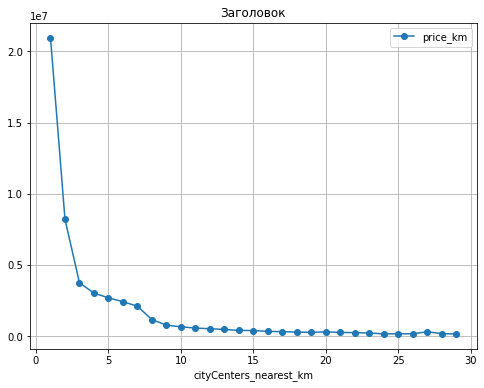

In [ ]:
data_km = data.query('locality_name_new == "Санкт-Петербург"')
data_km['price_km'] = data_km['last_price'] / data_km['cityCenters_nearest_km']
print(data_km.pivot_table(index='cityCenters_nearest_km', values='price_km', aggfunc='mean'))
data_km_plot = data_km.pivot_table(index='cityCenters_nearest_km', values='price_km', aggfunc='mean')\
    .plot(grid=True, style='o-', figsize=(8,6), title = 'Заголовок')

#### Вывод

Большинство продаваемых в Ленинградской области квартир находится в пятиэтажных домах. Поэтому чаще всего они имеют высоту потолков 2.5 метра, хотя встречаются и 2.75м и 3м. Больше всего квартир - квартиры с 1-3 комнатами.

Медианная цена проданной квартиры - это 4 680 000 руб. Такое значение более точное, чем среднее, так как не учитывает слишком большие цены на элетные квартиры, которых не очень много и которые могут исказить результат.

Самая дорогая цена за квадратный метр - в Санкт-Петербурге, г. Пушкине и деревне Кудрово.

Заметна интересная особенность публикации объявлений - больше всего объявлений опубликовано в будние дни со вторника по пятницу. Самые неактивные месяцы публикации - декабрь, январь и май. При этом день недели и месяц публикации объявления не влияет на итоговую стоимость недвижимости. На нее влияет год публикации - стоимость снижалась с 2015 по 2018 года, а 2019 немного выросла.

Также на итоговую стоимость квартиры напрямую влияет ее размер (чем больше площадь, тем выше стоимость) и расположение на первом этаже (такие квартиры стоят дешевле).

### Вывод

Была проанализирована база данных объявлений о продаже квартир в Ленинградской области. Данные проверены на аномальные значения, которые могут повлиять на результаты исследования. Где возможно, были восстановлены пропущенные значения. Были проанализированы существующие переменные, добавлены и рассчитаны новые для более детального анализа.

Основные выводы:

Медианная цена проданной квартиры в Ленинградской области - это 4 680 000 руб. При этом значительно отличается цена квадратного метра в Санкт-Петербурге и других населенных пунктах. Самые дорогие квартиры в Санкт-Петербурге (104.5 тыс.руб.). Далее идет Пушкин (99.9 тыс.руб.), деревня Кудрово (95.8 тыс.руб.). В Выборге - 58 тыс.руб., что почти в 2 раза ниже Санкт-Петербурга, хотя этот город входит в ТОП-10 населенных пунктов Ленинградской области по количеству объявлений.

Заметна высокая корреляция итоговой стоимости квартиры и ее площади - чем больше площадь, тем выше стоимость недвижимости.

Также заметно влияние расположения квартиры на ее стоимость - квартиры, расположенные на первом этаже в среднем продавались дешевле на 1.6-1.8 млн.руб.

Связи между днем недели и месяцем публикации объявления не выявлено, несмотря на то, что публиковались они неравномерно. Самая высокая стоимость - в 2015 году (в среднем 8.37 млн.руб.). Далее она снижалась с 6.66 млн.руб. до 5.95 млн.руб., а в 2019 году увеличилась до 6.7 млн.руб.

Квартира, в среднем, продается около 3-х месяцев (96 дней). При этом большинство квартир, продается в промежуток от 45 до 232 дней. Можно считать, что квартира продается необычно долго, если продается дольше 512 дней. При этом квартир, проданных меньше, чем за 45 дней, достаточно много, поэтому, продажа даже за 1 день будет считаться вполне нормальным результатом, а не аномальным значением.